In [129]:
import json

In [130]:
with open ('tdata.json', 'r') as f:
    tdata = json.load(f)

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
data_path = 'Desktop/ITMGT/ITMGT25/tdata.json'
tdata
type(tdata)

list

In [133]:
tdict = dict(enumerate(tdata))

In [134]:
type(tdict)

dict

In [135]:
df = pd.DataFrame.from_records(tdata)

In [136]:
df

address   birthdate  \
0                              USNS Wagner\nFPO AE 00917  1926/03/11   
1                             USCGC Benson\nFPO AP 48794  2016/07/08   
2                             USCGC Benson\nFPO AP 48794  2016/07/08   
3                             USCGC Benson\nFPO AP 48794  2016/07/08   
4               33911 Hansen Loaf\nWest Sandra, ND 54188  1949/09/27   
...                                                  ...         ...   
83031      96081 Harrison Brooks\nJenniferbury, MA 02124  2019/10/26   
83032  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83033  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83034  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
83035                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                            mail               name sex       username  \
0         watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1            moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2            moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3            moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4            michael78@yahoo.com     Kristen Cooper   F     qhernandez   
...                          ...                ...  ..            ...   
83031    christina55@hotmail.com         Tammy Byrd   F     kmcconnell   
83032  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
83033  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
83034  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
83035         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   

                                       transaction_items  transaction_value  \
0                      Exotic Extras,Beef Chicharon,(x4)               5196   
1      Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...              12056   
2      HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...               5500   
3                    HealthyKid 3+,Yummy Vegetables,(x1)                500   
4      Candy City,Orange Beans,(x3);Candy City,Gummy ...               2697   
...                                                  ...                ...   
83031  Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...               3588   
83032  HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...               2095   
83033  Candy City,Orange Beans,(x4);Candy City,Gummy ...               3396   
83034  HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...               4280   
83035  HealthyKid 3+,Nutrional Milk,(x1);Candy City,G...               2639   

      transaction_date  
0           2022/01/12  
1           2022/01/12  
2           2022/01/08  
3           2022/01/10  
4           2022/01/24  
...                ...  
83031       2022/06/05  
83032       2022/06/12  
83033       2022/06/15  
83034       2022/06/09  
83035       2022/06/03  

[83036 rows x 9 columns]

In [137]:
#Fix the grain of items
split_items_df =(df.set_index(['address','birthdate','mail','name','sex','username','transaction_value','transaction_date'])
.apply(lambda x: x.str.split(';').explode())
.reset_index())

In [138]:
split_items_df

address   birthdate  \
0                               USNS Wagner\nFPO AE 00917  1926/03/11   
1                              USCGC Benson\nFPO AP 48794  2016/07/08   
2                              USCGC Benson\nFPO AP 48794  2016/07/08   
3                              USCGC Benson\nFPO AP 48794  2016/07/08   
4                              USCGC Benson\nFPO AP 48794  2016/07/08   
...                                                   ...         ...   
166114  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166115  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166116                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166117                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166118                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                             mail               name sex       username  \
0          watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
...                           ...                ...  ..            ...   
166114  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166115  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166116         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166117         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166118         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   

        transaction_value transaction_date                  transaction_items  
0                    5196       2022/01/12  Exotic Extras,Beef Chicharon,(x4)  
1                   12056       2022/01/12  Exotic Extras,Beef Chicharon,(x3)  
2                   12056       2022/01/12  HealthyKid 3+,Nutrional Milk,(x4)  
3                   12056       2022/01/12       Candy City,Orange Beans,(x1)  
4                    5500       2022/01/08  HealthyKid 3+,Gummy Vitamins,(x3)  
...                   ...              ...                                ...  
166114               4280       2022/06/09  HealthyKid 3+,Nutrional Milk,(x2)  
166115               4280       2022/06/09        Candy City,Gummy Worms,(x2)  
166116               2639       2022/06/03  HealthyKid 3+,Nutrional Milk,(x1)  
166117               2639       2022/06/03        Candy City,Gummy Worms,(x3)  
166118               2639       2022/06/03       Candy City,Orange Beans,(x1)  

[166119 rows x 9 columns]

In [139]:
split_items_df2=split_items_df.replace("HealthyKid 3+",'THREE',regex=True)

In [140]:
split_items_df2['transaction_quantity']=split_items_df2['transaction_items'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [141]:
splitems_df=split_items_df2.replace('THREE+','HealthyKid 3',regex=True)

In [142]:
splitems_df

address   birthdate  \
0                               USNS Wagner\nFPO AE 00917  1926/03/11   
1                              USCGC Benson\nFPO AP 48794  2016/07/08   
2                              USCGC Benson\nFPO AP 48794  2016/07/08   
3                              USCGC Benson\nFPO AP 48794  2016/07/08   
4                              USCGC Benson\nFPO AP 48794  2016/07/08   
...                                                   ...         ...   
166114  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166115  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166116                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166117                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166118                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                             mail               name sex       username  \
0          watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
...                           ...                ...  ..            ...   
166114  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166115  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166116         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166117         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166118         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   

        transaction_value transaction_date                  transaction_items  \
0                    5196       2022/01/12  Exotic Extras,Beef Chicharon,(x4)   
1                   12056       2022/01/12  Exotic Extras,Beef Chicharon,(x3)   
2                   12056       2022/01/12  HealthyKid 3+,Nutrional Milk,(x4)   
3                   12056       2022/01/12       Candy City,Orange Beans,(x1)   
4                    5500       2022/01/08  HealthyKid 3+,Gummy Vitamins,(x3)   
...                   ...              ...                                ...   
166114               4280       2022/06/09  HealthyKid 3+,Nutrional Milk,(x2)   
166115               4280       2022/06/09        Candy City,Gummy Worms,(x2)   
166116               2639       2022/06/03  HealthyKid 3+,Nutrional Milk,(x1)   
166117               2639       2022/06/03        Candy City,Gummy Worms,(x3)   
166118               2639       2022/06/03       Candy City,Orange Beans,(x1)   

        transaction_quantity  
0                          4  
1                          3  
2                          4  
3                          1  
4                          3  
...                      ...  
166114                     2  
166115                     2  
166116                     1  
166117                     3  
166118                     1  

[166119 rows x 10 columns]

In [143]:
#Extract months from dates
numbered_months = splitems_df["transaction_month"] = [x[7][6] for x in np.array(splitems_df)]

def spell_month(numbered_months):
    if numbered_months == '1':
        return 'January'
    elif numbered_months == '2':
        return 'February'
    elif numbered_months == '3':
        return 'March'
    elif numbered_months == '4':
        return 'April'
    elif numbered_months == '5':
        return 'May'
    else:
        return 'June'
    
splitems_df['transaction_month'] = splitems_df['transaction_month'].apply(spell_month)

In [144]:
itemslist = ['Beef Chicharon', 'Kimchi and Seaweed', 'Nutrional Milk', 'Gummy Vitamins', 'Yummy Vegetables','Orange Beans','Gummy Worms']


In [145]:
#Make a T/F table for each item's transactions
for item in itemslist:
    splitems_df[item] = splitems_df['transaction_items'].str.contains(item)

In [146]:
splitems_df

address   birthdate  \
0                               USNS Wagner\nFPO AE 00917  1926/03/11   
1                              USCGC Benson\nFPO AP 48794  2016/07/08   
2                              USCGC Benson\nFPO AP 48794  2016/07/08   
3                              USCGC Benson\nFPO AP 48794  2016/07/08   
4                              USCGC Benson\nFPO AP 48794  2016/07/08   
...                                                   ...         ...   
166114  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166115  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166116                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166117                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166118                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                             mail               name sex       username  \
0          watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
...                           ...                ...  ..            ...   
166114  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166115  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166116         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166117         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166118         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   

        transaction_value transaction_date                  transaction_items  \
0                    5196       2022/01/12  Exotic Extras,Beef Chicharon,(x4)   
1                   12056       2022/01/12  Exotic Extras,Beef Chicharon,(x3)   
2                   12056       2022/01/12  HealthyKid 3+,Nutrional Milk,(x4)   
3                   12056       2022/01/12       Candy City,Orange Beans,(x1)   
4                    5500       2022/01/08  HealthyKid 3+,Gummy Vitamins,(x3)   
...                   ...              ...                                ...   
166114               4280       2022/06/09  HealthyKid 3+,Nutrional Milk,(x2)   
166115               4280       2022/06/09        Candy City,Gummy Worms,(x2)   
166116               2639       2022/06/03  HealthyKid 3+,Nutrional Milk,(x1)   
166117               2639       2022/06/03        Candy City,Gummy Worms,(x3)   
166118               2639       2022/06/03       Candy City,Orange Beans,(x1)   

        transaction_quantity transaction_month  Beef Chicharon  \
0                          4           January            True   
1                          3           January            True   
2                          4           January           False   
3                          1           January           False   
4                          3           January           False   
...                      ...               ...             ...   
166114                     2              June           False   
166115                     2              June           False   
166116                     1              June           False   
166117                     3              June           False   
166118                     1              June           False   

        Kimchi and Seaweed  Nutrional Milk  Gummy Vitamins  Yummy Vegetables  \
0                    False           False           False             False   
1                    False           False           False             False   
2                    False            True           False             False   
3                    False           False           False             False   
4                    False           False            True             False   
...                    ...

In [147]:
#Get number of transactions for each item per month)
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Beef Chicharon']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Kimchi and Seaweed']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Nutrional Milk']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Vitamins']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Yummy Vegetables']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Orange Beans']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())
print("")
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='January'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='February'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='March'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='April'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='May'),'transaction_quantity'].sum())
print(splitems_df.loc[(splitems_df['Gummy Worms']==True)&(splitems_df['transaction_month']=='June'),'transaction_quantity'].sum())

9665
10001
9816
9890
10028
9902

9676
9949
9967
9921
9773
10104

9727
9691
9876
9786
9881
9767

9681
9980
10145
9842
9948
9980

9959
10256
9896
9861
9735
9722

9774
10037
9611
9914
9964
10106

9559
9996
9986
10043
9801
9934


In [148]:
#Total quantity of transactions per item from January to June
print(splitems_df.loc[splitems_df['Beef Chicharon']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Kimchi and Seaweed']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Nutrional Milk']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Gummy Vitamins']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Yummy Vegetables']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Orange Beans']==True, 'transaction_quantity'].sum())
print(splitems_df.loc[splitems_df['Gummy Worms']==True, 'transaction_quantity'].sum())

59302
59390
58728
59576
59429
59406
59319


In [149]:
EEBC_transactions = [9665,10001,9816,9890,10028,9902,59302]

In [150]:
EEKS_transactions = [9676,9949,9967,9921,9773,10104,59390]

In [151]:
HKNM_transactions = [9727,9691,9876,9786,9881,9767,58728]

In [152]:
HKGV_transactions = [9681,9980,10145,9842,9948,9980,59576]

In [153]:
HKYV_transactions = [9959,10256,9896,9861,9735,9722,59429]

In [154]:
CCOB_transactions = [9774,10037,9611,9914,9964,10106,59406]

In [155]:
CCGW_transactions = [9559,9996,9986,10043,9801,9934,59319]

In [156]:
#Create a monthly transactions df
monthly_transactions_df = pd.DataFrame(
    {'EEBC_SQ':EEBC_transactions,
     'EEKS_SQ':EEKS_transactions,
     'HKNM_SQ':HKNM_transactions,
     'HKGV_SQ':HKGV_transactions,
     'HKYV_SQ':HKYV_transactions,
     'CCOB_SQ':CCOB_transactions,
     'CCGW_SQ':CCGW_transactions
    }, index = pd.Index(['January','February','March','April','May','June','Total']))

In [157]:
monthly_transactions_df

EEBC_SQ  EEKS_SQ  HKNM_SQ  HKGV_SQ  HKYV_SQ  CCOB_SQ  CCGW_SQ
January      9665     9676     9727     9681     9959     9774     9559
February    10001     9949     9691     9980    10256    10037     9996
March        9816     9967     9876    10145     9896     9611     9986
April        9890     9921     9786     9842     9861     9914    10043
May         10028     9773     9881     9948     9735     9964     9801
June         9902    10104     9767     9980     9722    10106     9934
Total       59302    59390    58728    59576    59429    59406    59319

In [158]:
#price of each item (manually retrieved)
EEBCp = 1299
EEKSp = 799
HKNMp = 1990
HKGVp = 1500
HKYVp = 500
CCOBp = 199
CCGWp = 150

In [159]:
monthly_transactions_df.insert(1,'EEBC_SV','')

In [160]:
monthly_transactions_df.insert(3,'EEKS_SV','')

In [161]:
monthly_transactions_df.insert(5,'HKNM_SV','')

In [162]:
monthly_transactions_df.insert(7,'HKGV_SV','')

In [163]:
monthly_transactions_df.insert(9,'HKYV_SV','')

In [164]:
monthly_transactions_df.insert(11,'CCOB_SV','')

In [165]:
monthly_transactions_df.insert(13,'CCGW_SV','')

In [166]:
monthly_transactions_df.insert(14,'Total','')

In [167]:
monthly_transactions_df

EEBC_SQ EEBC_SV  EEKS_SQ EEKS_SV  HKNM_SQ HKNM_SV  HKGV_SQ HKGV_SV  \
January      9665             9676             9727             9681           
February    10001             9949             9691             9980           
March        9816             9967             9876            10145           
April        9890             9921             9786             9842           
May         10028             9773             9881             9948           
June         9902            10104             9767             9980           
Total       59302            59390            58728            59576           

          HKYV_SQ HKYV_SV  CCOB_SQ CCOB_SV  CCGW_SQ CCGW_SV Total  
January      9959             9774             9559                
February    10256            10037             9996                
March        9896             9611             9986                
April        9861             9914            10043                
May          9735             9964             9801                
June         9722            10106             9934                
Total       59429            59406            59319

In [168]:
#Monthly revenue of EEBC
EEBC_SQ = monthly_transactions_df['EEBC_SV'] = [x[0] for x in np.array(monthly_transactions_df)]

def get_EEBC_revenue(EEBC_SQ):
    if EEBC_SQ == 0:
        return 0
    else:
        return EEBCp*EEBC_SQ

monthly_transactions_df['EEBC_SV'] = monthly_transactions_df['EEBC_SV'].apply(get_EEBC_revenue)

In [169]:
#Monthly revenue of EEKS
EEKS_SQ = monthly_transactions_df['EEKS_SV'] = [x[2] for x in np.array(monthly_transactions_df)]

def get_EEKS_revenue(EEKS_SQ):
    if EEKS_SQ == 0:
        return 0
    else:
        return EEKSp*EEKS_SQ 

monthly_transactions_df['EEKS_SV'] = monthly_transactions_df['EEKS_SV'].apply(get_EEKS_revenue)

In [170]:
#Monthly revenue of HKNM
HKNM_SQ = monthly_transactions_df['HKNM_SV'] = [x[4] for x in np.array(monthly_transactions_df)]

def get_HKNM_revenue(HKNM_SQ):
    if HKNM_SQ == 0:
        return 0
    else:
        return HKNMp*HKNM_SQ 

monthly_transactions_df['HKNM_SV'] = monthly_transactions_df['HKNM_SV'].apply(get_HKNM_revenue)

In [171]:
#Monthly revenue of HKGV
HKGV_SQ = monthly_transactions_df['HKGV_SV'] = [x[6] for x in np.array(monthly_transactions_df)]

def get_HKGV_revenue(HKGV_SQ):
    if HKGV_SQ == 0:
        return 0
    else:
        return HKGVp*HKGV_SQ 

monthly_transactions_df['HKGV_SV'] = monthly_transactions_df['HKGV_SV'].apply(get_HKGV_revenue)

In [172]:
#Monthly revenue of HKYV
HKYV_SQ = monthly_transactions_df['HKYV_SV'] = [x[8] for x in np.array(monthly_transactions_df)]

def get_HKYV_revenue(HKYV_SQ):
    if HKYV_SQ == 0:
        return 0
    else:
        return HKYVp*HKYV_SQ 

monthly_transactions_df['HKYV_SV'] = monthly_transactions_df['HKYV_SV'].apply(get_HKYV_revenue)

In [173]:
#Monthly revenue of CCOB
CCOB_SQ = monthly_transactions_df['CCOB_SV'] = [x[10] for x in np.array(monthly_transactions_df)]

def get_CCOB_revenue(CCOB_SQ):
    if CCOB_SQ == 0:
        return 0
    else:
        return CCOBp*CCOB_SQ 

monthly_transactions_df['CCOB_SV'] = monthly_transactions_df['CCOB_SV'].apply(get_CCOB_revenue)

In [174]:
#Monthly revenue of CCGW
CCGW_SQ = monthly_transactions_df['CCGW_SV'] = [x[12] for x in np.array(monthly_transactions_df)]

def get_CCGW_revenue(CCGW_SQ):
    if CCGW_SQ == 0:
        return 0
    else:
        return CCGWp*CCGW_SQ 

monthly_transactions_df['CCGW_SV'] = monthly_transactions_df['CCGW_SV'].apply(get_CCGW_revenue)

In [175]:
monthly_transactions_df

EEBC_SQ   EEBC_SV  EEKS_SQ   EEKS_SV  HKNM_SQ    HKNM_SV  HKGV_SQ  \
January      9665  12554835     9676   7731124     9727   19356730     9681   
February    10001  12991299     9949   7949251     9691   19285090     9980   
March        9816  12750984     9967   7963633     9876   19653240    10145   
April        9890  12847110     9921   7926879     9786   19474140     9842   
May         10028  13026372     9773   7808627     9881   19663190     9948   
June         9902  12862698    10104   8073096     9767   19436330     9980   
Total       59302  77033298    59390  47452610    58728  116868720    59576   

           HKGV_SV  HKYV_SQ   HKYV_SV  CCOB_SQ   CCOB_SV  CCGW_SQ  CCGW_SV  \
January   14521500     9959   4979500     9774   1945026     9559  1433850   
February  14970000    10256   5128000    10037   1997363     9996  1499400   
March     15217500     9896   4948000     9611   1912589     9986  1497900   
April     14763000     9861   4930500     9914   1972886    10043  1506450   
May       14922000     9735   4867500     9964   1982836     9801  1470150   
June      14970000     9722   4861000    10106   2011094     9934  1490100   
Total     89364000    59429  29714500    59406  11821794    59319  8897850   

         Total  
January         
February        
March           
April           
May             
June            
Total

In [176]:
monthly_transactions_df["Total"] = monthly_transactions_df.sum(axis=1, numeric_only=True)

In [177]:
monthly_transactions_df

EEBC_SQ   EEBC_SV  EEKS_SQ   EEKS_SV  HKNM_SQ    HKNM_SV  HKGV_SQ  \
January      9665  12554835     9676   7731124     9727   19356730     9681   
February    10001  12991299     9949   7949251     9691   19285090     9980   
March        9816  12750984     9967   7963633     9876   19653240    10145   
April        9890  12847110     9921   7926879     9786   19474140     9842   
May         10028  13026372     9773   7808627     9881   19663190     9948   
June         9902  12862698    10104   8073096     9767   19436330     9980   
Total       59302  77033298    59390  47452610    58728  116868720    59576   

           HKGV_SV  HKYV_SQ   HKYV_SV  CCOB_SQ   CCOB_SV  CCGW_SQ  CCGW_SV  \
January   14521500     9959   4979500     9774   1945026     9559  1433850   
February  14970000    10256   5128000    10037   1997363     9996  1499400   
March     15217500     9896   4948000     9611   1912589     9986  1497900   
April     14763000     9861   4930500     9914   1972886    10043  1506450   
May       14922000     9735   4867500     9964   1982836     9801  1470150   
June      14970000     9722   4861000    10106   2011094     9934  1490100   
Total     89364000    59429  29714500    59406  11821794    59319  8897850   

              Total  
January    62590606  
February   63890313  
March      64013143  
April      63490222  
May        63809805  
June       63773833  
Total     381567922

In [178]:
monthly_transactions_df.drop(['Total'],inplace=True,axis=1)

In [179]:
monthly_transactions_df

EEBC_SQ   EEBC_SV  EEKS_SQ   EEKS_SV  HKNM_SQ    HKNM_SV  HKGV_SQ  \
January      9665  12554835     9676   7731124     9727   19356730     9681   
February    10001  12991299     9949   7949251     9691   19285090     9980   
March        9816  12750984     9967   7963633     9876   19653240    10145   
April        9890  12847110     9921   7926879     9786   19474140     9842   
May         10028  13026372     9773   7808627     9881   19663190     9948   
June         9902  12862698    10104   8073096     9767   19436330     9980   
Total       59302  77033298    59390  47452610    58728  116868720    59576   

           HKGV_SV  HKYV_SQ   HKYV_SV  CCOB_SQ   CCOB_SV  CCGW_SQ  CCGW_SV  
January   14521500     9959   4979500     9774   1945026     9559  1433850  
February  14970000    10256   5128000    10037   1997363     9996  1499400  
March     15217500     9896   4948000     9611   1912589     9986  1497900  
April     14763000     9861   4930500     9914   1972886    10043  1506450  
May       14922000     9735   4867500     9964   1982836     9801  1470150  
June      14970000     9722   4861000    10106   2011094     9934  1490100  
Total     89364000    59429  29714500    59406  11821794    59319  8897850

In [180]:
monthslist = ['January','February','March','April','May','June']

In [181]:
splitems_df

address   birthdate  \
0                               USNS Wagner\nFPO AE 00917  1926/03/11   
1                              USCGC Benson\nFPO AP 48794  2016/07/08   
2                              USCGC Benson\nFPO AP 48794  2016/07/08   
3                              USCGC Benson\nFPO AP 48794  2016/07/08   
4                              USCGC Benson\nFPO AP 48794  2016/07/08   
...                                                   ...         ...   
166114  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166115  428 Kristopher Curve Apt. 206\nMcculloughville...  1913/11/04   
166116                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166117                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   
166118                   PSC 1089, Box 3720\nAPO AE 08973  2012/04/30   

                             mail               name sex       username  \
0          watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4             moorelisa@gmail.com        Melissa Kim   F       cgilbert   
...                           ...                ...  ..            ...   
166114  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166115  melvinschmidt@hotmail.com    Donald Andersen   M          llowe   
166116         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166117         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   
166118         xjones@hotmail.com  Stephanie Russell   F      cmcdowell   

        transaction_value transaction_date                  transaction_items  \
0                    5196       2022/01/12  Exotic Extras,Beef Chicharon,(x4)   
1                   12056       2022/01/12  Exotic Extras,Beef Chicharon,(x3)   
2                   12056       2022/01/12  HealthyKid 3+,Nutrional Milk,(x4)   
3                   12056       2022/01/12       Candy City,Orange Beans,(x1)   
4                    5500       2022/01/08  HealthyKid 3+,Gummy Vitamins,(x3)   
...                   ...              ...                                ...   
166114               4280       2022/06/09  HealthyKid 3+,Nutrional Milk,(x2)   
166115               4280       2022/06/09        Candy City,Gummy Worms,(x2)   
166116               2639       2022/06/03  HealthyKid 3+,Nutrional Milk,(x1)   
166117               2639       2022/06/03        Candy City,Gummy Worms,(x3)   
166118               2639       2022/06/03       Candy City,Orange Beans,(x1)   

        transaction_quantity transaction_month  Beef Chicharon  \
0                          4           January            True   
1                          3           January            True   
2                          4           January           False   
3                          1           January           False   
4                          3           January           False   
...                      ...               ...             ...   
166114                     2              June           False   
166115                     2              June           False   
166116                     1              June           False   
166117                     3              June           False   
166118                     1              June           False   

        Kimchi and Seaweed  Nutrional Milk  Gummy Vitamins  Yummy Vegetables  \
0                    False           False           False             False   
1                    False           False           False             False   
2                    False            True           False             False   
3                    False           False           False             False   
4                    False           False            True             False   
...                    ...

In [182]:
#Obtain a df with just the customers' names and months they transacted
customer_df = splitems_df.groupby(['name','transaction_month'],as_index=False).first()

In [183]:
customer_df.drop(['address','birthdate','mail','sex','username','transaction_value','transaction_date','transaction_items','transaction_quantity','Beef Chicharon','Kimchi and Seaweed','Nutrional Milk','Gummy Vitamins','Yummy Vegetables','Orange Beans','Gummy Worms'], inplace=True, axis=1)

In [184]:
customer_df

name transaction_month
0      Aaron Beasley             April
1      Aaron Beasley              June
2      Aaron Beasley               May
3       Aaron Brewer             April
4       Aaron Brewer          February
...              ...               ...
39612   Zachary York          February
39613   Zachary York           January
39614   Zachary York              June
39615   Zachary York             March
39616   Zachary York               May

[39617 rows x 2 columns]

In [185]:
#Get all the months a single customer made a purchase
array_agg = lambda x: '/'.join(x.astype(str))
new_customer_df = customer_df.groupby(['name'], as_index=False).agg({'transaction_month':array_agg})

In [186]:
new_customer_df

name                      transaction_month
0         Aaron Beasley                         April/June/May
1          Aaron Brewer      April/February/January/June/March
2           Aaron Brown                   April/June/March/May
3          Aaron Coffey       April/February/January/March/May
4           Aaron Davis        April/February/January/June/May
...                 ...                                    ...
8482  Zachary Valentine  April/February/January/June/March/May
8483       Zachary Ware  April/February/January/June/March/May
8484   Zachary Williams           April/February/January/March
8485     Zachary Wilson                         April/June/May
8486       Zachary York  April/February/January/June/March/May

[8487 rows x 2 columns]

In [187]:
#Make a true/false columns for transacted months
for month in monthslist:
    new_customer_df[month]=new_customer_df['transaction_month'].str.contains(month)

In [188]:
new_customer_df

name                      transaction_month  January  \
0         Aaron Beasley                         April/June/May    False   
1          Aaron Brewer      April/February/January/June/March     True   
2           Aaron Brown                   April/June/March/May    False   
3          Aaron Coffey       April/February/January/March/May     True   
4           Aaron Davis        April/February/January/June/May     True   
...                 ...                                    ...      ...   
8482  Zachary Valentine  April/February/January/June/March/May     True   
8483       Zachary Ware  April/February/January/June/March/May     True   
8484   Zachary Williams           April/February/January/March     True   
8485     Zachary Wilson                         April/June/May    False   
8486       Zachary York  April/February/January/June/March/May     True   

      February  March  April    May   June  
0        False  False   True   True   True  
1         True   True   True  False   True  
2        False   True   True   True   True  
3         True   True   True   True  False  
4         True  False   True   True   True  
...        ...    ...    ...    ...    ...  
8482      True   True   True   True   True  
8483      True   True   True   True   True  
8484      True   True   True  False  False  
8485     False  False   True   True   True  
8486      True   True   True   True   True  

[8487 rows x 8 columns]

In [189]:
#Convert to 0 and 1 T/F table
user_types_df = new_customer_df.loc[:,monthslist[0]:monthslist[len(monthslist)-1]]
user_types_df = user_types_df*1

In [190]:
#Add names back
Extracted_Names = new_customer_df['name']
user_types_df = user_types_df.join(Extracted_Names)

In [191]:
user_types_df

January  February  March  April  May  June               name
0           0         0      0      1    1     1      Aaron Beasley
1           1         1      1      1    0     1       Aaron Brewer
2           0         0      1      1    1     1        Aaron Brown
3           1         1      1      1    1     0       Aaron Coffey
4           1         1      0      1    1     1        Aaron Davis
...       ...       ...    ...    ...  ...   ...                ...
8482        1         1      1      1    1     1  Zachary Valentine
8483        1         1      1      1    1     1       Zachary Ware
8484        1         1      1      1    0     0   Zachary Williams
8485        0         0      0      1    1     1     Zachary Wilson
8486        1         1      1      1    1     1       Zachary York

[8487 rows x 7 columns]

In [192]:
#Re-order columns
user_types_df[['name','January','February','March','April','May','June']]

name  January  February  March  April  May  June
0         Aaron Beasley        0         0      0      1    1     1
1          Aaron Brewer        1         1      1      1    0     1
2           Aaron Brown        0         0      1      1    1     1
3          Aaron Coffey        1         1      1      1    1     0
4           Aaron Davis        1         1      0      1    1     1
...                 ...      ...       ...    ...    ...  ...   ...
8482  Zachary Valentine        1         1      1      1    1     1
8483       Zachary Ware        1         1      1      1    1     1
8484   Zachary Williams        1         1      1      1    0     0
8485     Zachary Wilson        0         0      0      1    1     1
8486       Zachary York        1         1      1      1    1     1

[8487 rows x 7 columns]

In [193]:
#Solve for repeaters, inactive, and engaged users
for x, month in enumerate(monthslist):
    if x == 0:
        repeaters = 0
        inactive = 0
    else:
        #Repeaters
        user_repeaters = user_types_df[(user_types_df[monthslist[x-1]] == 1) & (user_types_df[monthslist[x]] == 1)]
        repeaters = len(user_repeaters.index)
        
        #Inactive
        user_inactive = user_types_df.loc[:,monthslist[0]:month]
        user_inactive = user_inactive[(user_inactive[monthslist[x]] == 0)]
        
        user_inactive2 = user_inactive.sum(axis=1)
        user_inactive2 = user_inactive2.tolist()
        inactive = np.count_nonzero(user_inactive2)
        
    #Engaged    
    user_engaged = user_types_df.loc[:, monthslist[0]:month]
    user_engaged2 = user_engaged.sum(axis=1)
    user_engaged2 = user_engaged2.tolist()
    engaged = user_engaged2.count(x+1)
    print(month, ":\t", repeaters, "repeaters\t", inactive, "inactive\t", engaged, "engaged")    

January :	 0 repeaters	 0 inactive	 6588 engaged
February :	 5172 repeaters	 1416 inactive	 5172 engaged
March :	 5216 repeaters	 1747 inactive	 4126 engaged
April :	 5154 repeaters	 1909 inactive	 3289 engaged
May :	 5110 repeaters	 1917 inactive	 2667 engaged
June :	 5193 repeaters	 1835 inactive	 2190 engaged


In [194]:
#Creating RIE DF
user_data = [[0,5172,5216,5154,5110,5193],[0,1416,1747,1909,1917,1835],[6588,5172,4126,3289,2667,2190]]
RIE_users_df = pd.DataFrame(user_data,columns = ['January','February','March','April','May','June'], index = pd.Index(['Repeaters',"Inactive",'Engaged']))


In [195]:
RIE_users_df

January  February  March  April   May  June
Repeaters        0      5172   5216   5154  5110  5193
Inactive         0      1416   1747   1909  1917  1835
Engaged       6588      5172   4126   3289  2667  2190

In [196]:
new_customer_df

name                      transaction_month  January  \
0         Aaron Beasley                         April/June/May    False   
1          Aaron Brewer      April/February/January/June/March     True   
2           Aaron Brown                   April/June/March/May    False   
3          Aaron Coffey       April/February/January/March/May     True   
4           Aaron Davis        April/February/January/June/May     True   
...                 ...                                    ...      ...   
8482  Zachary Valentine  April/February/January/June/March/May     True   
8483       Zachary Ware  April/February/January/June/March/May     True   
8484   Zachary Williams           April/February/January/March     True   
8485     Zachary Wilson                         April/June/May    False   
8486       Zachary York  April/February/January/June/March/May     True   

      February  March  April    May   June  
0        False  False   True   True   True  
1         True   True   True  False   True  
2        False   True   True   True   True  
3         True   True   True   True  False  
4         True  False   True   True   True  
...        ...    ...    ...    ...    ...  
8482      True   True   True   True   True  
8483      True   True   True   True   True  
8484      True   True   True  False  False  
8485     False  False   True   True   True  
8486      True   True   True   True   True  

[8487 rows x 8 columns]

In [197]:
#Getting sum of total customers for each month
new_customer_df['January'].values.sum()
new_customer_df['February'].values.sum()
new_customer_df['March'].values.sum()
new_customer_df['April'].values.sum()
new_customer_df['May'].values.sum()
new_customer_df['June'].values.sum()

6652

In [198]:
monthlycustomers = [6588,6631,6622,6556,6568,6652]

In [199]:
monthly_customers_df = pd.DataFrame(monthlycustomers, index = pd.Index(monthslist))

In [200]:
monthly_customers_df.columns = ['Total Customers']

In [201]:
monthly_customers_df

Total Customers
January              6588
February             6631
March                6622
April                6556
May                  6568
June                 6652

In [202]:
monthly_transactions_df

EEBC_SQ   EEBC_SV  EEKS_SQ   EEKS_SV  HKNM_SQ    HKNM_SV  HKGV_SQ  \
January      9665  12554835     9676   7731124     9727   19356730     9681   
February    10001  12991299     9949   7949251     9691   19285090     9980   
March        9816  12750984     9967   7963633     9876   19653240    10145   
April        9890  12847110     9921   7926879     9786   19474140     9842   
May         10028  13026372     9773   7808627     9881   19663190     9948   
June         9902  12862698    10104   8073096     9767   19436330     9980   
Total       59302  77033298    59390  47452610    58728  116868720    59576   

           HKGV_SV  HKYV_SQ   HKYV_SV  CCOB_SQ   CCOB_SV  CCGW_SQ  CCGW_SV  
January   14521500     9959   4979500     9774   1945026     9559  1433850  
February  14970000    10256   5128000    10037   1997363     9996  1499400  
March     15217500     9896   4948000     9611   1912589     9986  1497900  
April     14763000     9861   4930500     9914   1972886    10043  1506450  
May       14922000     9735   4867500     9964   1982836     9801  1470150  
June      14970000     9722   4861000    10106   2011094     9934  1490100  
Total     89364000    59429  29714500    59406  11821794    59319  8897850

In [203]:
#DF of sales quantity
sales_quantity = ['EEBC_SQ','EEKS_SQ','HKNM_SQ','HKGV_SQ','HKYV_SQ','CCOB_SQ','CCGW_SQ']
sales_quantity_df = monthly_transactions_df[sales_quantity]
sales_quantity_df

EEBC_SQ  EEKS_SQ  HKNM_SQ  HKGV_SQ  HKYV_SQ  CCOB_SQ  CCGW_SQ
January      9665     9676     9727     9681     9959     9774     9559
February    10001     9949     9691     9980    10256    10037     9996
March        9816     9967     9876    10145     9896     9611     9986
April        9890     9921     9786     9842     9861     9914    10043
May         10028     9773     9881     9948     9735     9964     9801
June         9902    10104     9767     9980     9722    10106     9934
Total       59302    59390    58728    59576    59429    59406    59319

In [204]:
#Setting defaults for matplotlib graphs/tables
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

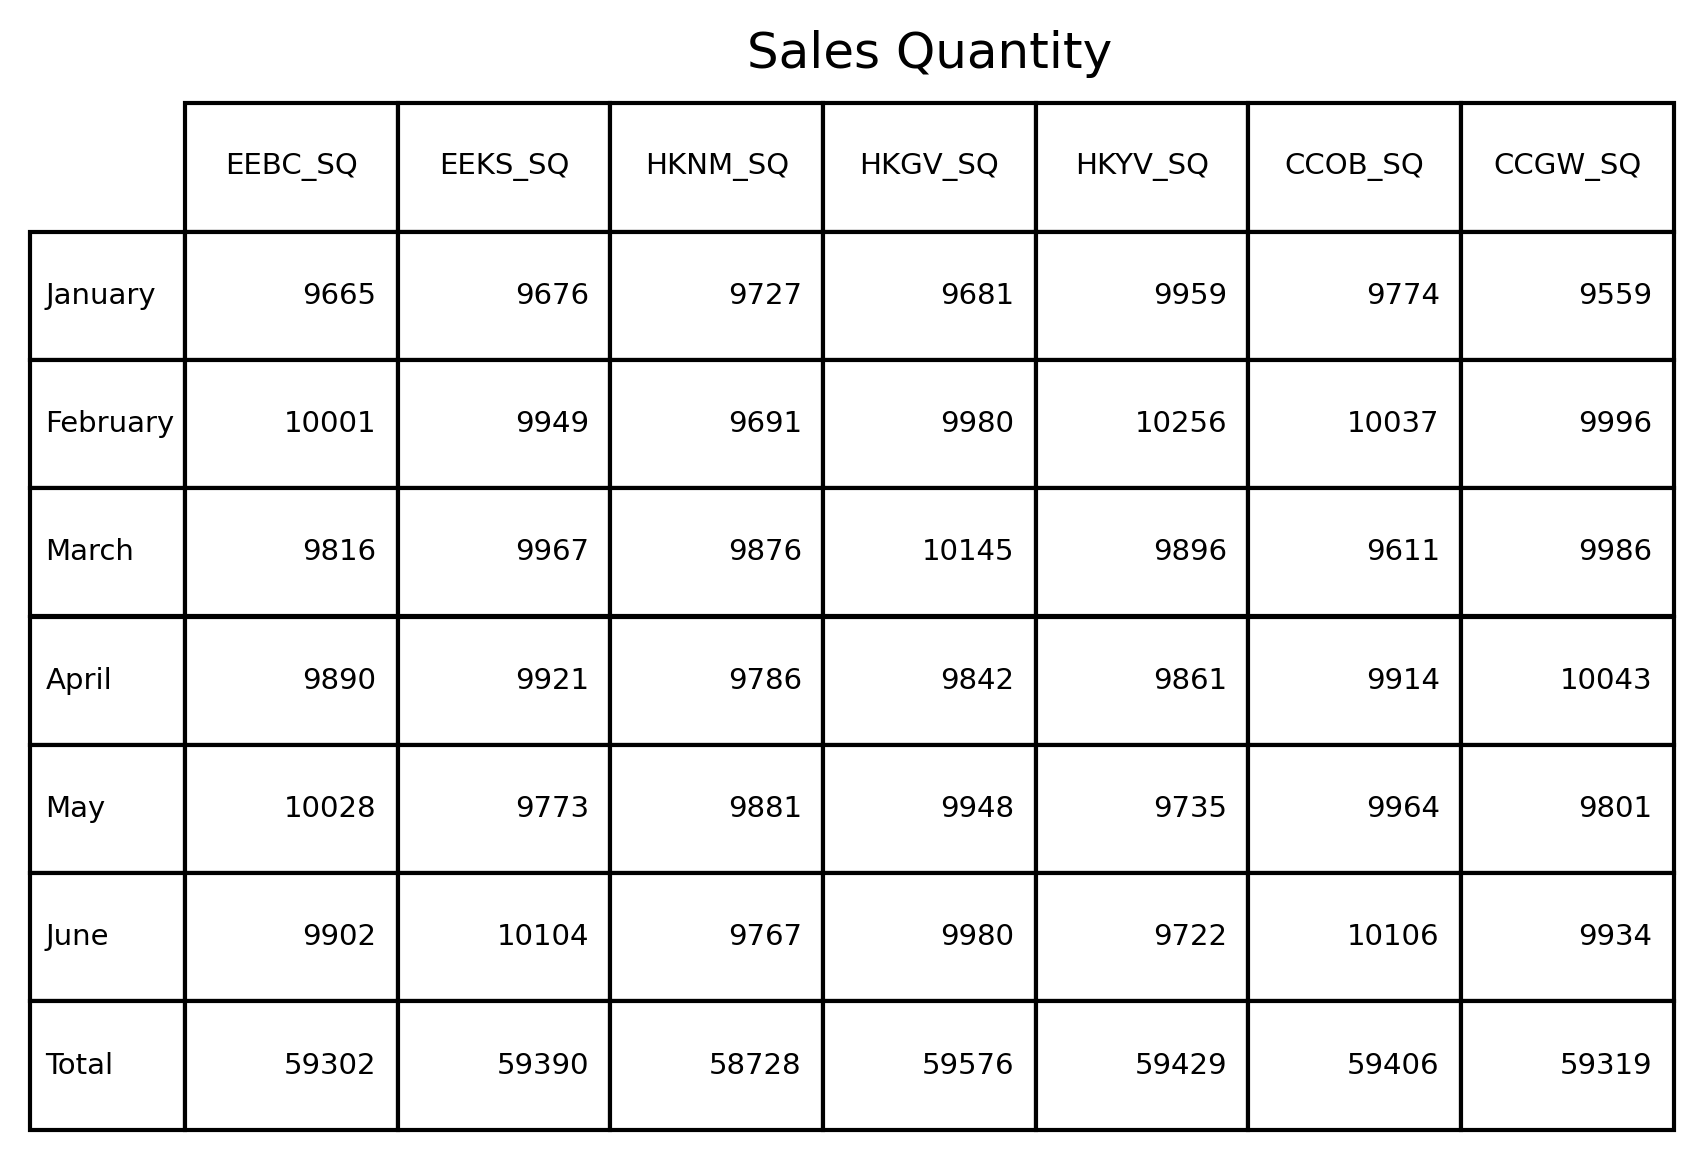

In [205]:
#Graph the df in matplotlib table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Sales Quantity')
plt.subplots_adjust(bottom=0.54)
table = ax.table(cellText=sales_quantity_df.values, colLabels=sales_quantity_df.columns,rowLabels=sales_quantity_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('sales_quantity_df.png', dpi=300)

In [206]:
#DF of sales quantity without Total
quantity_df = sales_quantity_df.drop(sales_quantity_df.index[6])
quantity_df 

EEBC_SQ  EEKS_SQ  HKNM_SQ  HKGV_SQ  HKYV_SQ  CCOB_SQ  CCGW_SQ
January      9665     9676     9727     9681     9959     9774     9559
February    10001     9949     9691     9980    10256    10037     9996
March        9816     9967     9876    10145     9896     9611     9986
April        9890     9921     9786     9842     9861     9914    10043
May         10028     9773     9881     9948     9735     9964     9801
June         9902    10104     9767     9980     9722    10106     9934

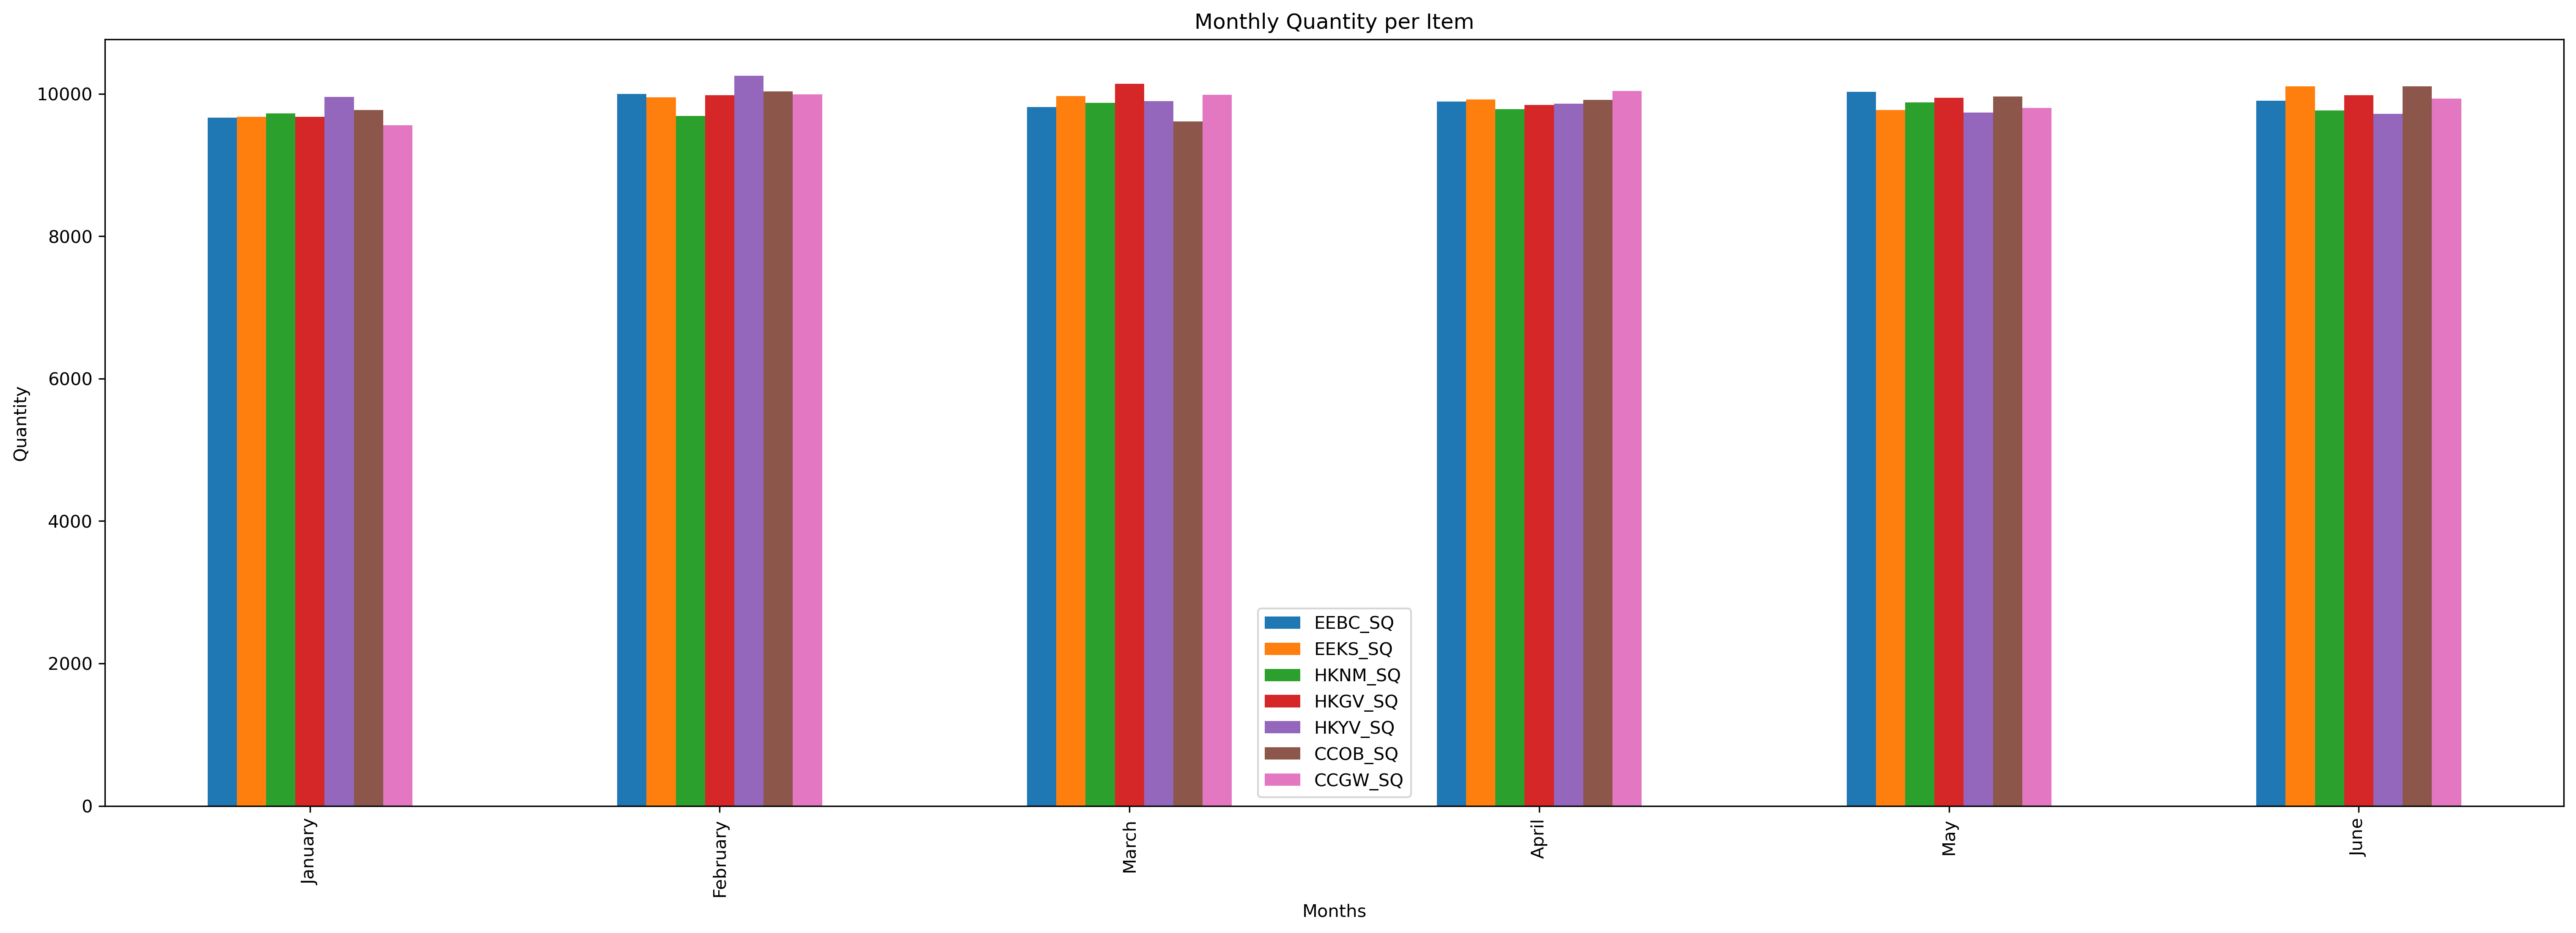

In [207]:
#Getting bar graph of total quantity of items sold per month
monthly_quantity_graph = quantity_df.plot(kind='bar',figsize=(25,8)).legend(loc='best')
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.title("Monthly Quantity per Item")
monthly_quantity_graph.figure.savefig('monthly_quantity_graph.png',dpi=300)

In [208]:
#DF of the total quantity of items sold from January to June
totalquantity_df = sales_quantity_df.drop(sales_quantity_df.index[0:6])
totalquantity_df 

EEBC_SQ  EEKS_SQ  HKNM_SQ  HKGV_SQ  HKYV_SQ  CCOB_SQ  CCGW_SQ
Total    59302    59390    58728    59576    59429    59406    59319

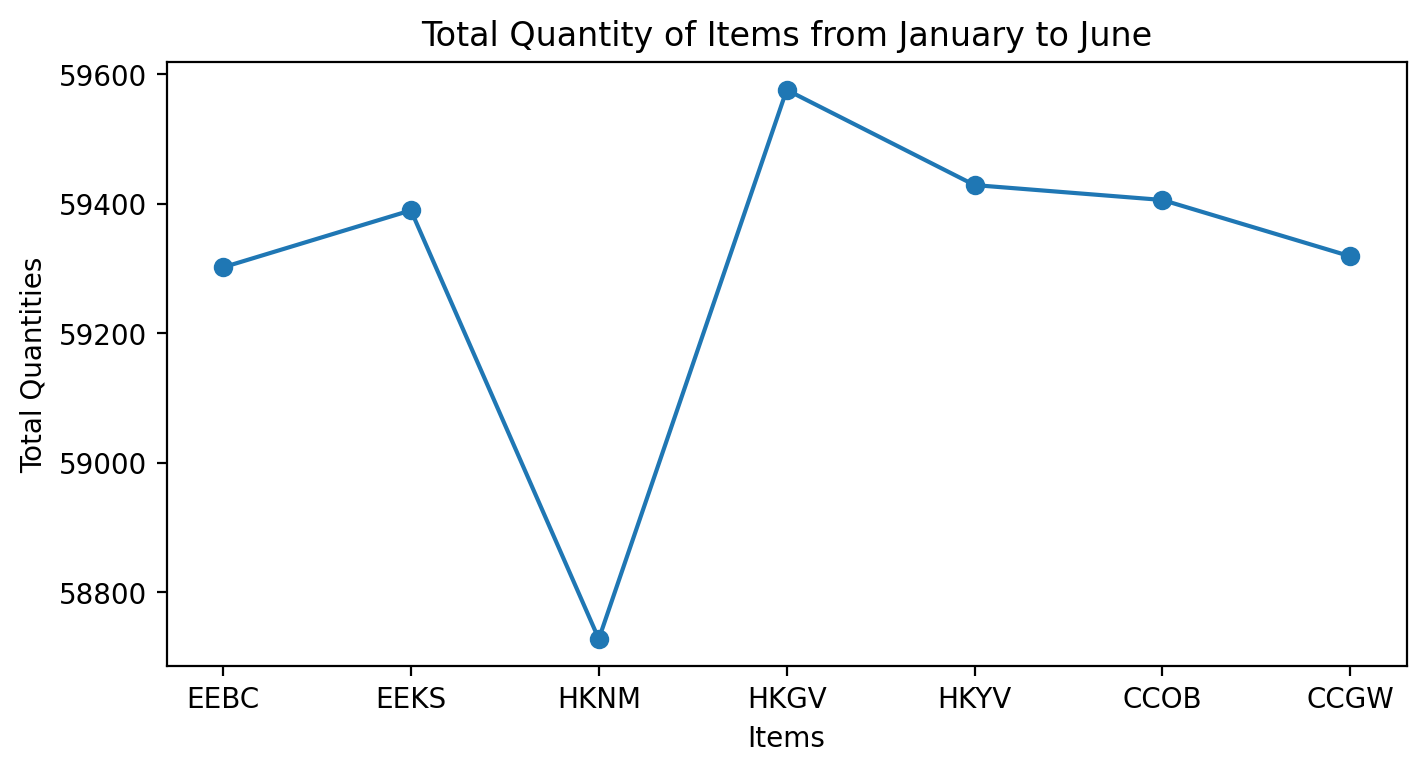

In [209]:
#Total quantity for all products during the period of January to June
total_quantities = [59302,59390,58728,59576,59429,59406,59319]
items = ['EEBC','EEKS','HKNM','HKGV','HKYV','CCOB','CCGW']

fig = plt.figure(figsize=(8,4),dpi=200)
plt.plot(items, total_quantities,marker='o')
plt.title('Total Quantity of Items from January to June')
plt.xlabel('Items')
plt.ylabel('Total Quantities')
plt.show()
fig.savefig('TotalQuantity_line.png', dpi=300)

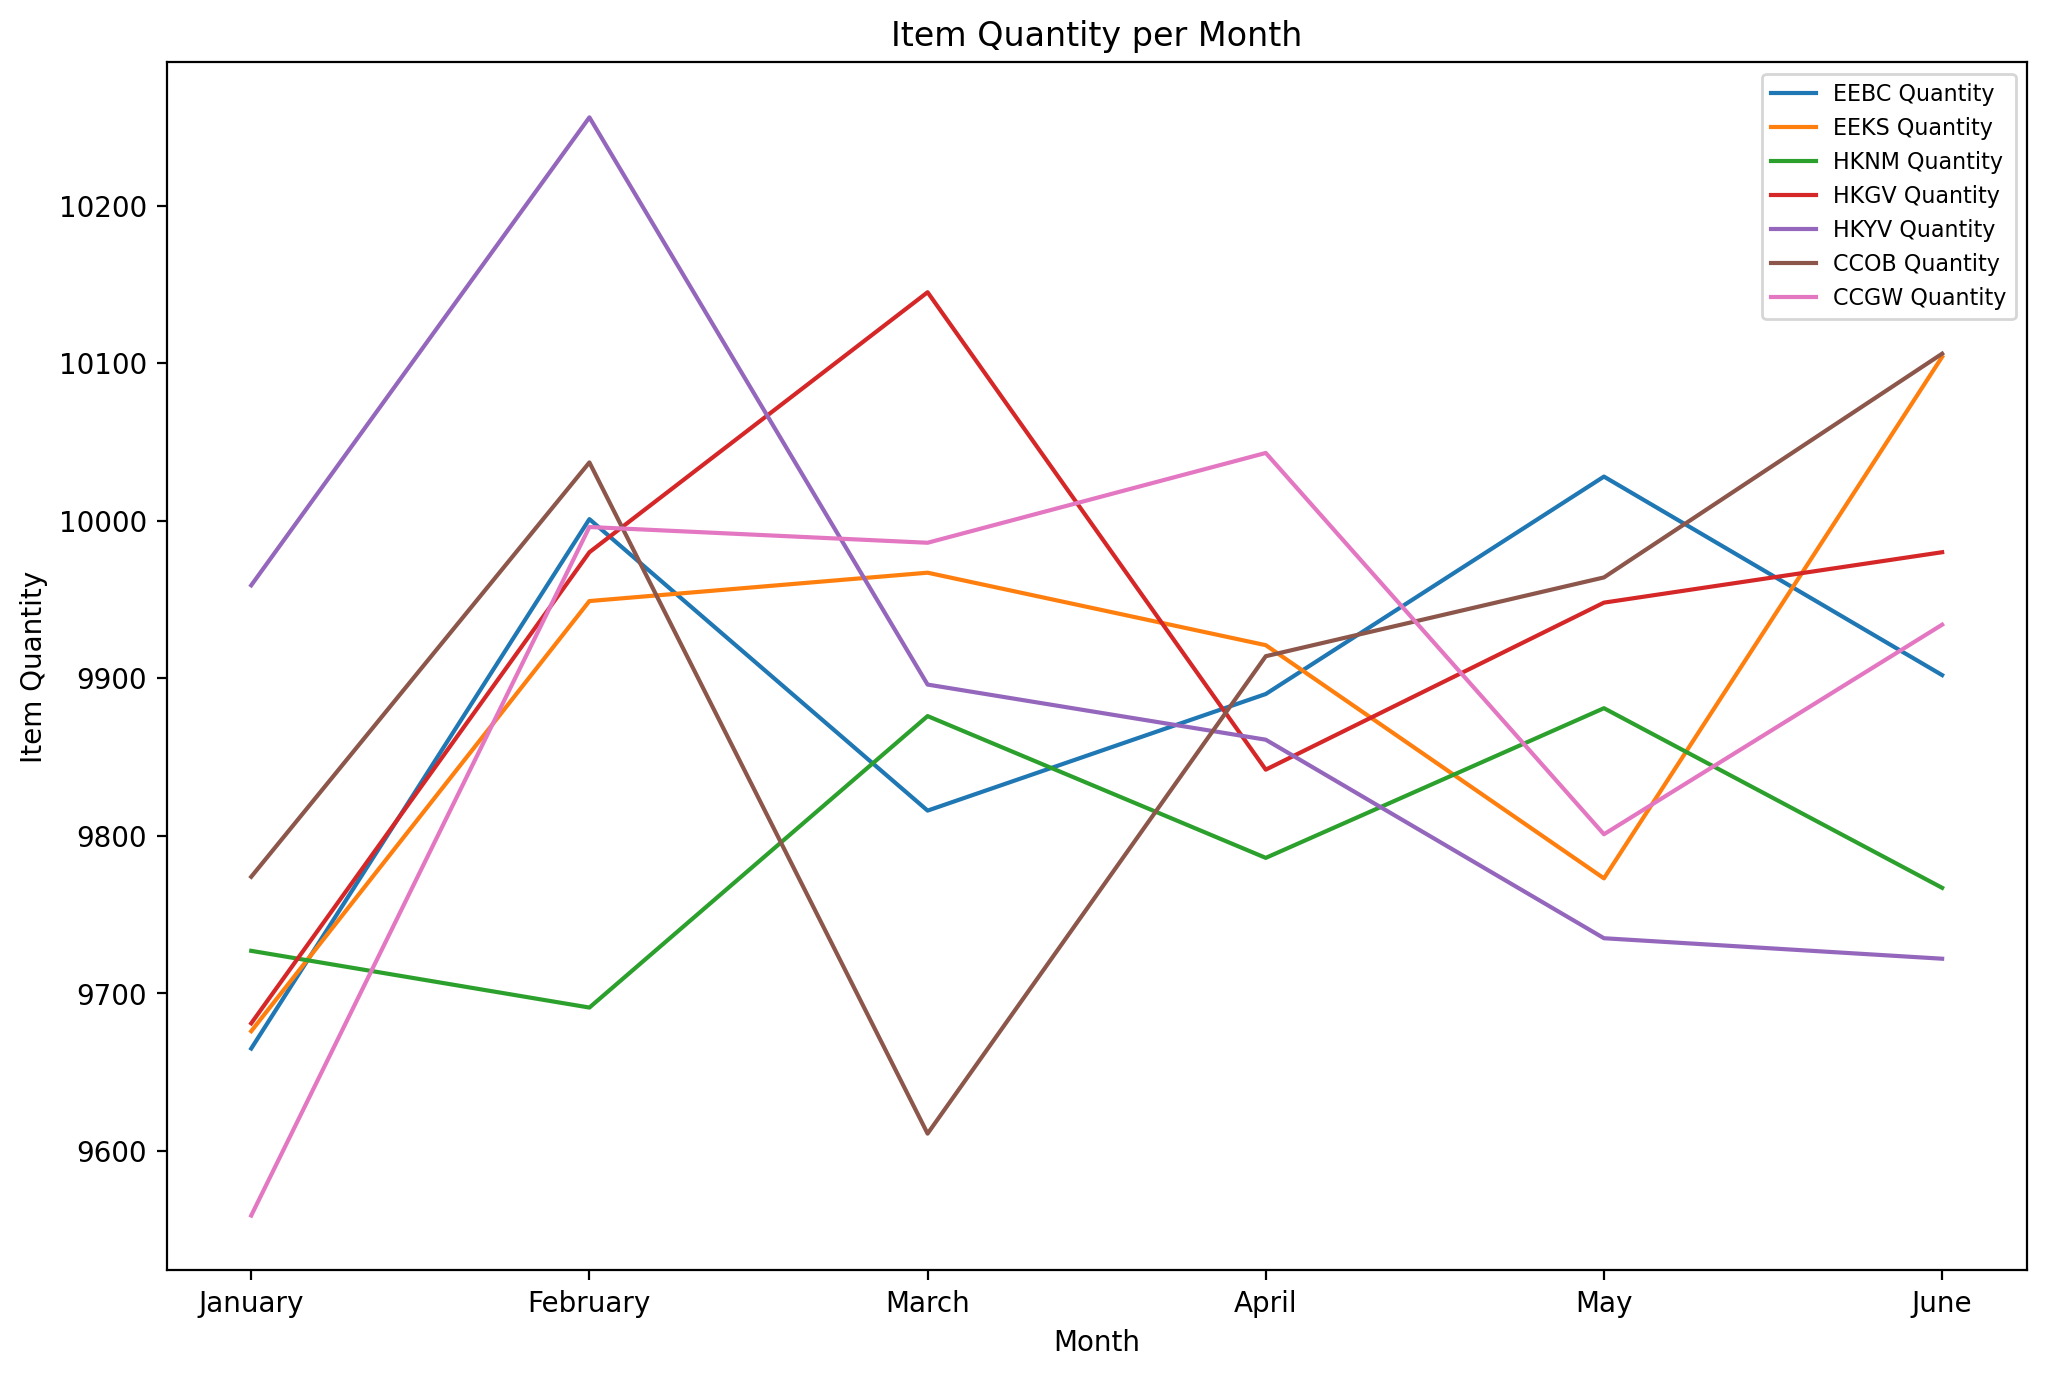

In [210]:
#Each item's quantity per month
EEBC_quantity = [9665,10001,9816,9890,10028,9902]
EEKS_quantity = [9676,9949,9967,9921,9773,10104]
HKNM_quantity = [9727,9691,9876,9786,9881,9767]
HKGV_quantity = [9681,9980,10145,9842,9948,9980]
HKYV_quantity = [9959,10256,9896,9861,9735,9722]
CCOB_quantity = [9774,10037,9611,9914,9964,10106]
CCGW_quantity = [9559,9996,9986,10043,9801,9934]

fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(monthslist,EEBC_quantity, label = 'EEBC Quantity')
plt.plot(monthslist,EEKS_quantity, label = 'EEKS Quantity')
plt.plot(monthslist,HKNM_quantity, label = 'HKNM Quantity')
plt.plot(monthslist,HKGV_quantity, label = 'HKGV Quantity')
plt.plot(monthslist,HKYV_quantity, label = 'HKYV Quantity')
plt.plot(monthslist,CCOB_quantity, label = 'CCOB Quantity')
plt.plot(monthslist,CCGW_quantity, label = 'CCGW Quantity')
plt.legend(loc=1, prop={'size':8})
plt.title('Item Quantity per Month')
plt.xlabel('Month')
plt.ylabel('Item Quantity')
plt.show()
fig.savefig('ItemQuantityPerMonth.png', dpi=300)


In [211]:
#DF of sale values
sales_value = ['EEBC_SV','EEKS_SV','HKNM_SV','HKGV_SV','HKYV_SV','CCOB_SV','CCGW_SV']
sales_value_df = monthly_transactions_df[sales_value]
sales_value_df

EEBC_SV   EEKS_SV    HKNM_SV   HKGV_SV   HKYV_SV   CCOB_SV  CCGW_SV
January   12554835   7731124   19356730  14521500   4979500   1945026  1433850
February  12991299   7949251   19285090  14970000   5128000   1997363  1499400
March     12750984   7963633   19653240  15217500   4948000   1912589  1497900
April     12847110   7926879   19474140  14763000   4930500   1972886  1506450
May       13026372   7808627   19663190  14922000   4867500   1982836  1470150
June      12862698   8073096   19436330  14970000   4861000   2011094  1490100
Total     77033298  47452610  116868720  89364000  29714500  11821794  8897850

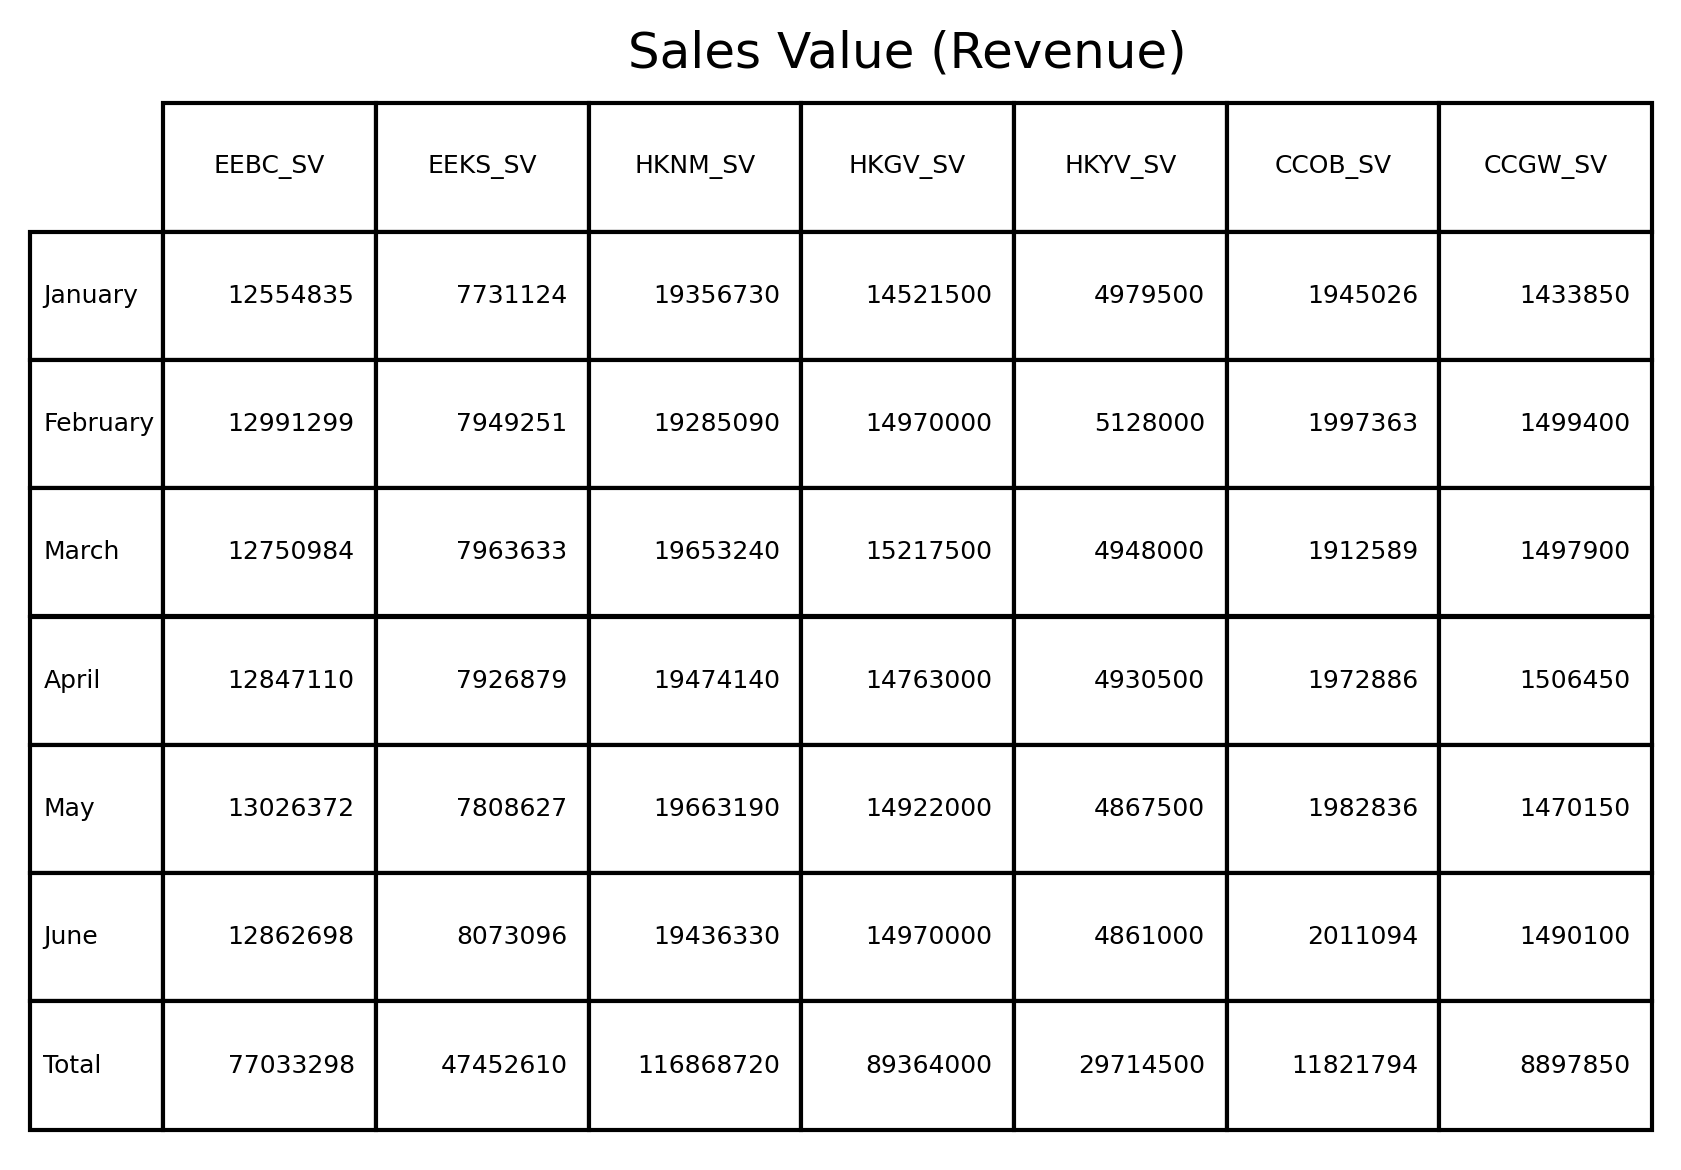

In [212]:
#Making the sales value DF into a matplotlib table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Sales Value (Revenue)')
plt.subplots_adjust(bottom=0.54)
table = ax.table(cellText=sales_value_df.values, colLabels=sales_value_df.columns,rowLabels=sales_value_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('sales_value_table.png', dpi=300)

In [213]:
#DF of sales values without the total
value_df = sales_value_df.drop(sales_value_df.index[6])
value_df

EEBC_SV  EEKS_SV   HKNM_SV   HKGV_SV  HKYV_SV  CCOB_SV  CCGW_SV
January   12554835  7731124  19356730  14521500  4979500  1945026  1433850
February  12991299  7949251  19285090  14970000  5128000  1997363  1499400
March     12750984  7963633  19653240  15217500  4948000  1912589  1497900
April     12847110  7926879  19474140  14763000  4930500  1972886  1506450
May       13026372  7808627  19663190  14922000  4867500  1982836  1470150
June      12862698  8073096  19436330  14970000  4861000  2011094  1490100

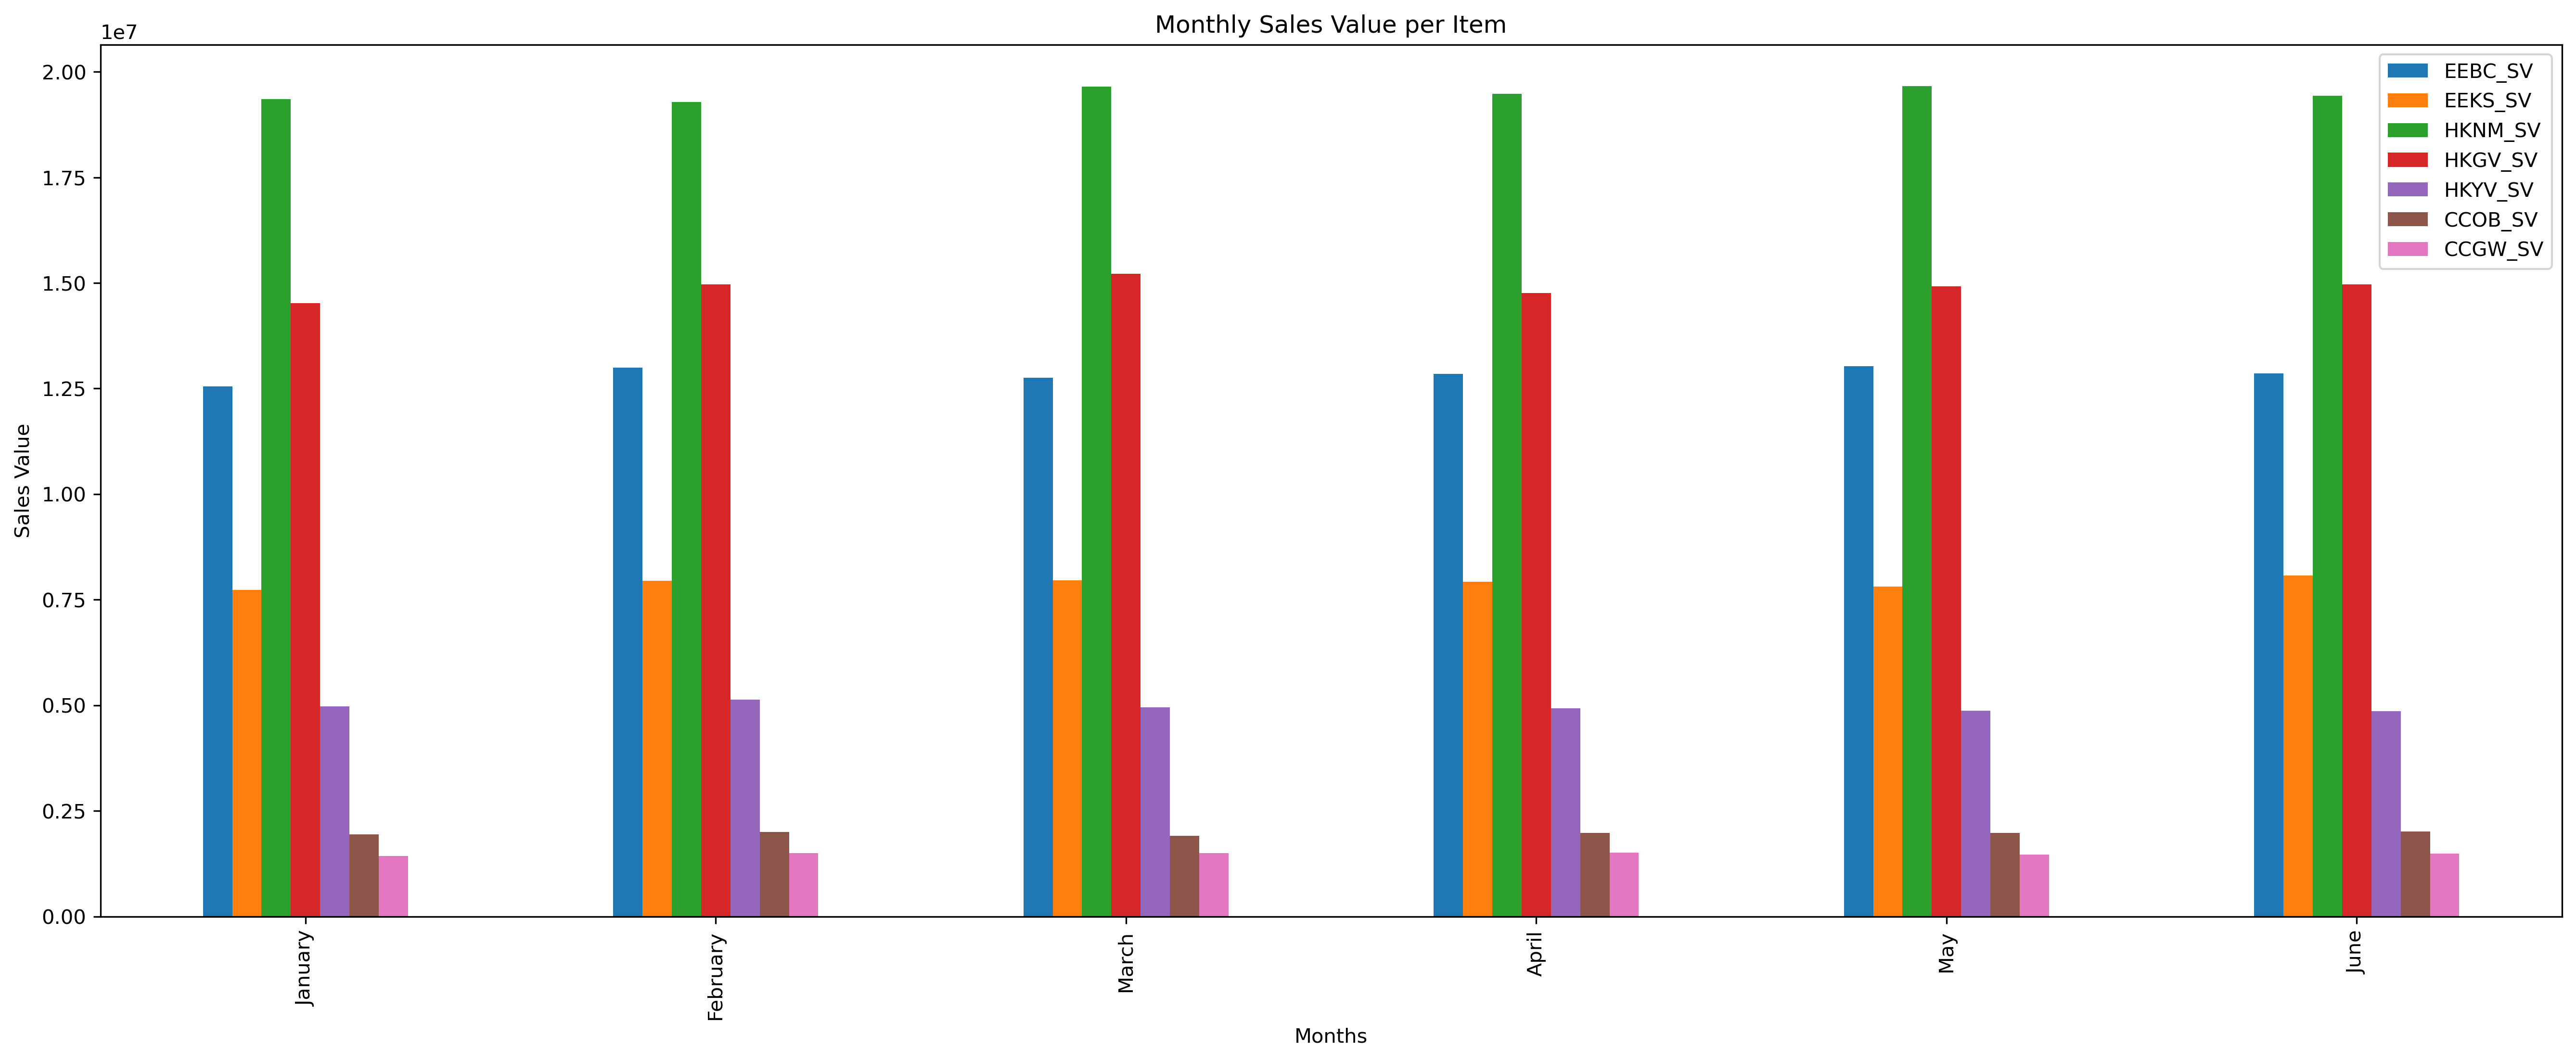

In [214]:
#Getting bar graph of total sales value (revenue) of items sold per month
monthly_value_graph = value_df.plot(kind='bar',figsize=(22,8)).legend(loc='best')
plt.xlabel("Months")
plt.ylabel("Sales Value")
plt.title("Monthly Sales Value per Item")
monthly_value_graph.figure.savefig('monthly_value_graph.png',dpi=300)

In [215]:
#DF of the total sales value (revenue) of items sold from January to June
totalvalue_df = sales_value_df.drop(sales_quantity_df.index[0:6])
totalvalue_df

EEBC_SV   EEKS_SV    HKNM_SV   HKGV_SV   HKYV_SV   CCOB_SV  CCGW_SV
Total  77033298  47452610  116868720  89364000  29714500  11821794  8897850

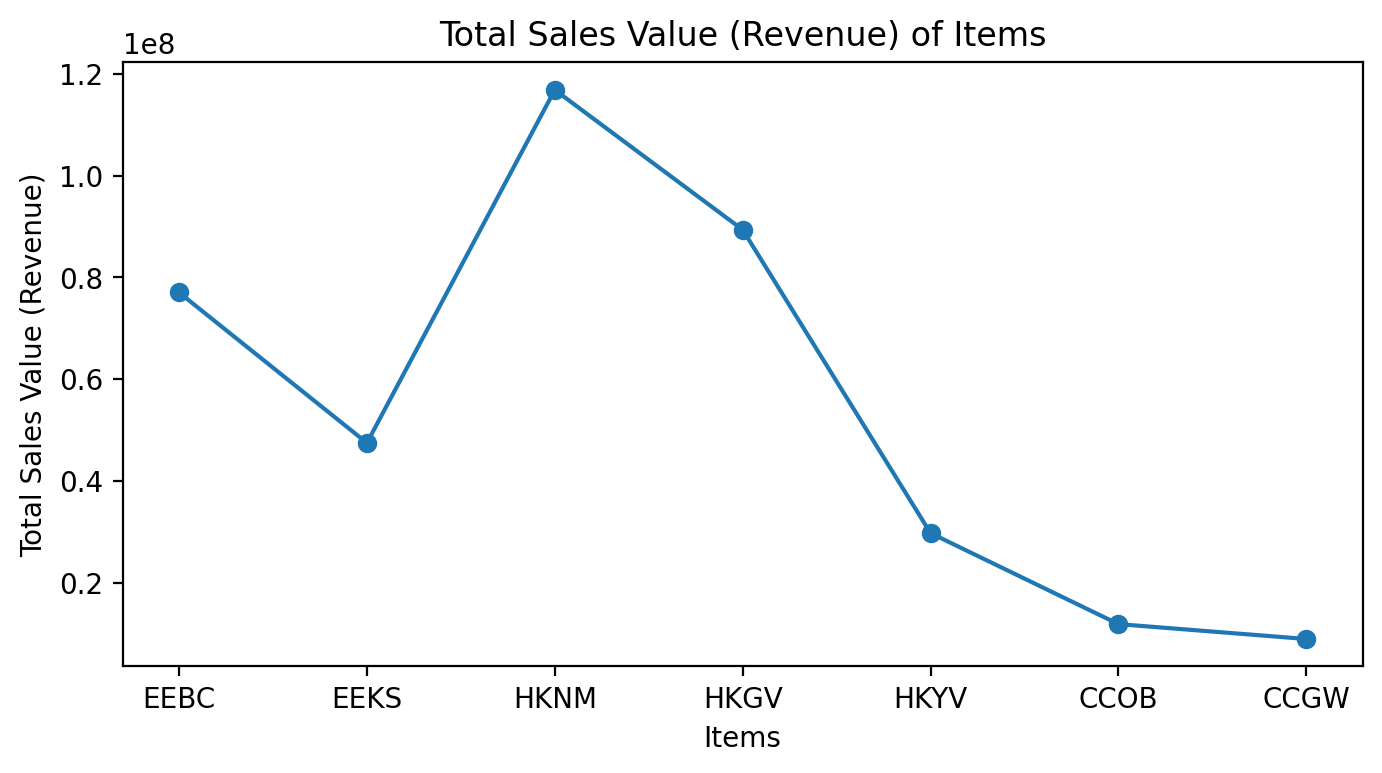

In [216]:
#Total sales value (revenue) for all products during the period of January to June
total_salesvalue = [77033298,47452610,116868720,89364000,29714500,11821794,8897850]
items = ['EEBC','EEKS','HKNM','HKGV','HKYV','CCOB','CCGW']

fig = plt.figure(figsize=(8,4),dpi=200)
plt.plot(items, total_salesvalue,marker='o')
plt.title('Total Sales Value (Revenue) of Items')
plt.xlabel('Items')
plt.ylabel('Total Sales Value (Revenue)')
plt.show()
fig.savefig('TotalSalesValue_line.png', dpi=300)

In [217]:
value_df

EEBC_SV  EEKS_SV   HKNM_SV   HKGV_SV  HKYV_SV  CCOB_SV  CCGW_SV
January   12554835  7731124  19356730  14521500  4979500  1945026  1433850
February  12991299  7949251  19285090  14970000  5128000  1997363  1499400
March     12750984  7963633  19653240  15217500  4948000  1912589  1497900
April     12847110  7926879  19474140  14763000  4930500  1972886  1506450
May       13026372  7808627  19663190  14922000  4867500  1982836  1470150
June      12862698  8073096  19436330  14970000  4861000  2011094  1490100

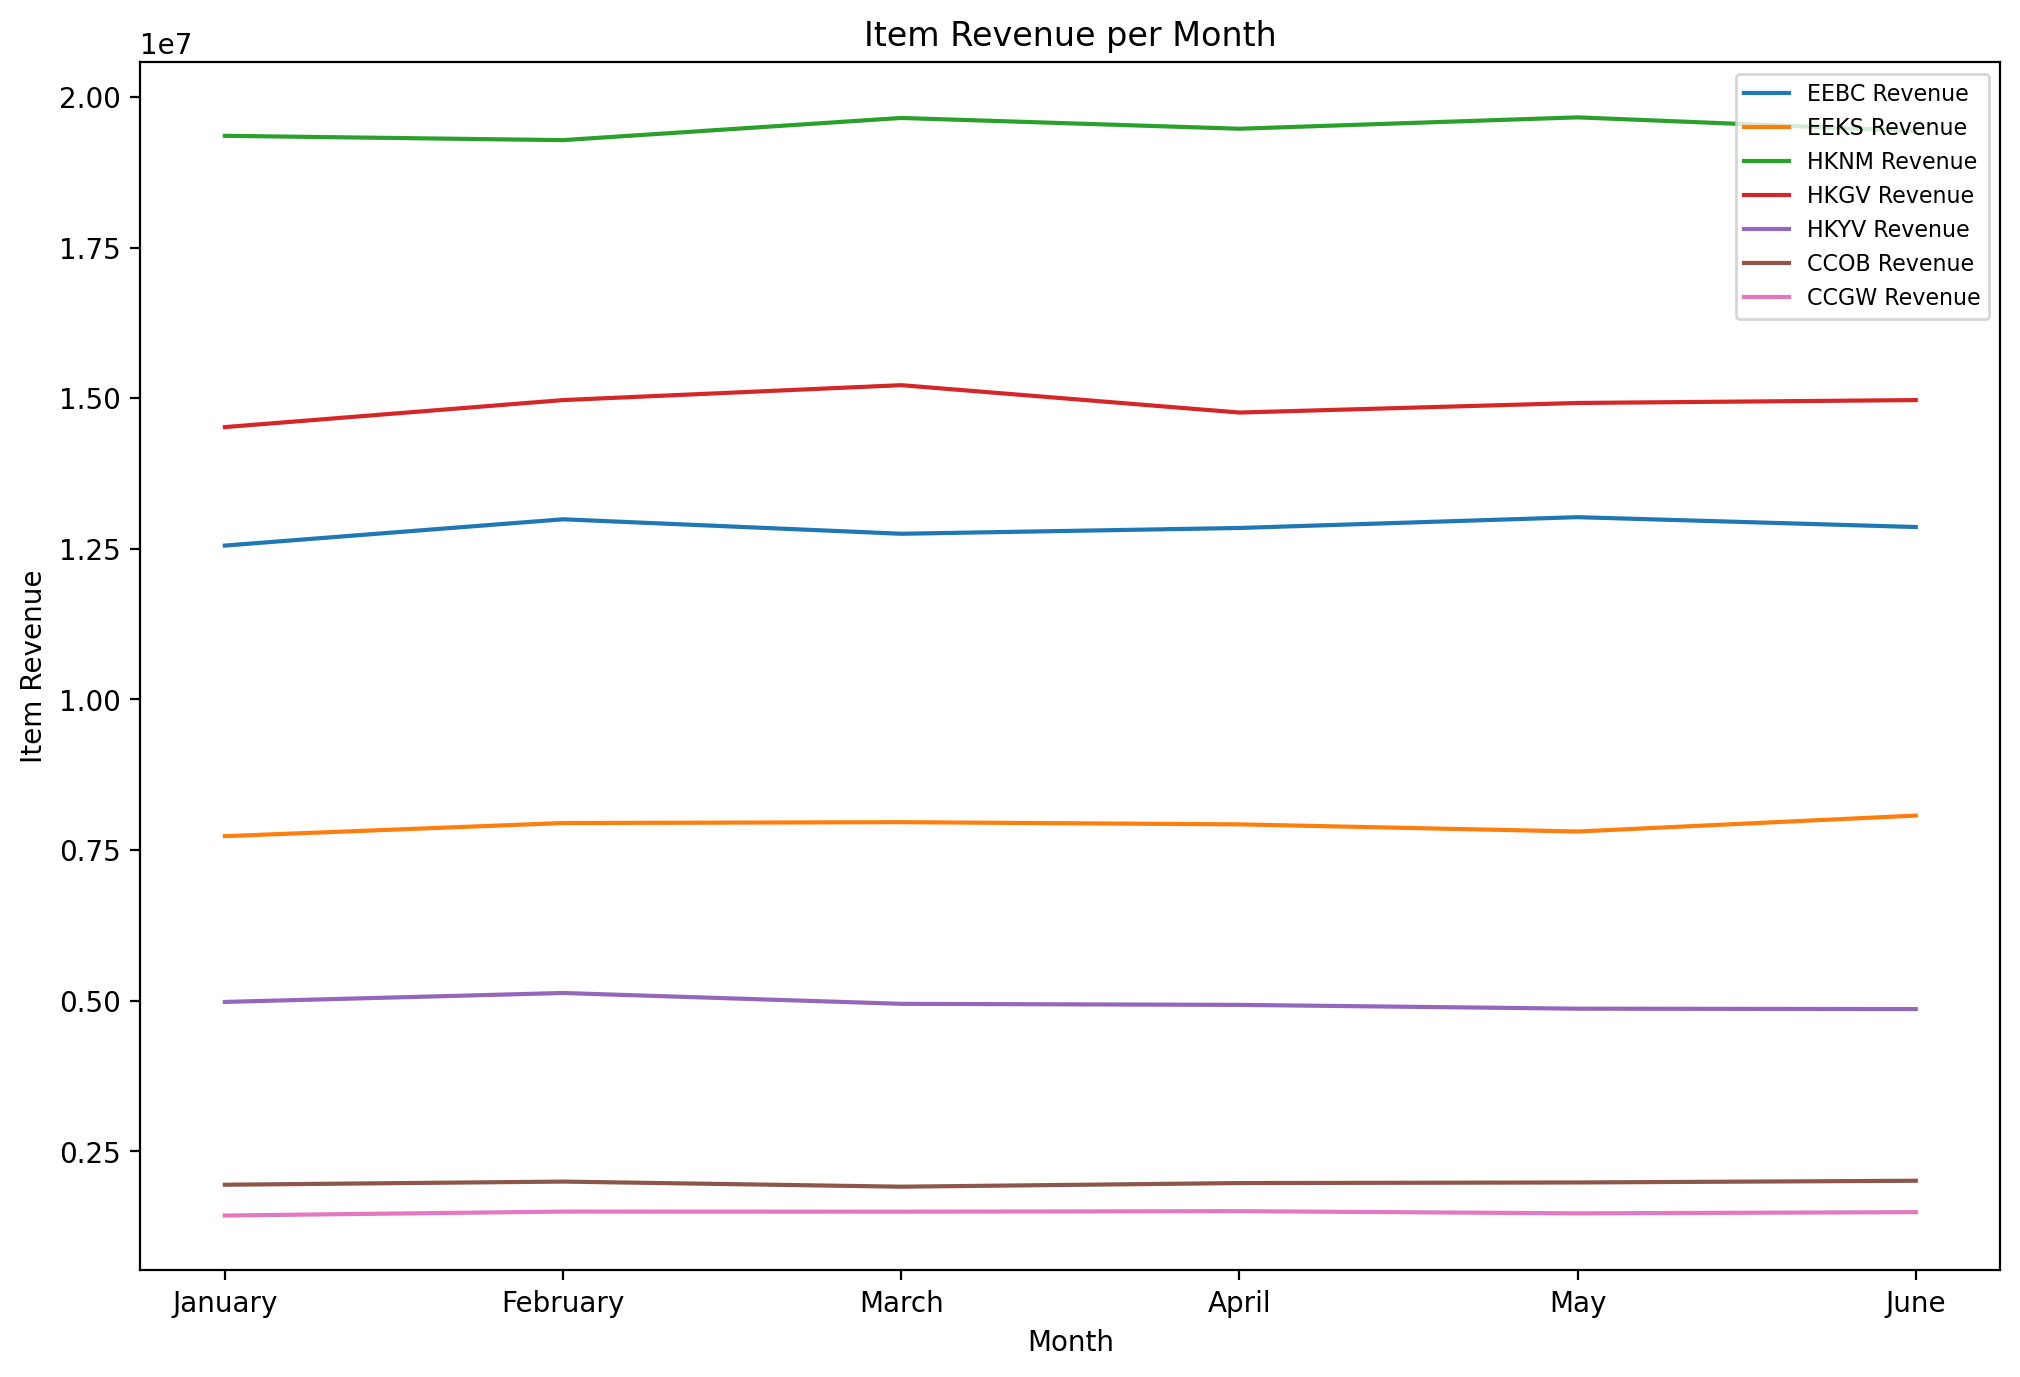

In [218]:
#Each item's sales value (revenue) per month
EEBC_salesvalue = [12554825,12991299,12750984,12847110,13026372,12862698]
EEKS_salesvalue = [7731124,7949251,7963633,7926879,7808627,8073096]
HKNM_salesvalue = [19356730,19285090,19653240,19474140,19663190,19436330]
HKGV_salesvalue = [14521500,14970000,15217500,14763000,14922000,14970000]
HKYV_salesvalue = [4979500,5128000,4948000,4930500,4867500,4861000]
CCOB_salesvalue = [1945026,1997363,1912589,1972886,1982836,2011094]
CCGW_salesvalue = [1433850,1499400,1497900,1506450,1470150,1490100]

fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(monthslist,EEBC_salesvalue, label = 'EEBC Revenue')
plt.plot(monthslist,EEKS_salesvalue, label = 'EEKS Revenue')
plt.plot(monthslist,HKNM_salesvalue, label = 'HKNM Revenue')
plt.plot(monthslist,HKGV_salesvalue, label = 'HKGV Revenue')
plt.plot(monthslist,HKYV_salesvalue, label = 'HKYV Revenue')
plt.plot(monthslist,CCOB_salesvalue, label = 'CCOB Revenue')
plt.plot(monthslist,CCGW_salesvalue, label = 'CCGW Revenue')
plt.legend(loc=1, prop={'size':8})
plt.title('Item Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Item Revenue')
plt.show()
fig.savefig('ItemRevenuePerMonth.png', dpi=300)


In [219]:
monthly_customers_df

Total Customers
January              6588
February             6631
March                6622
April                6556
May                  6568
June                 6652

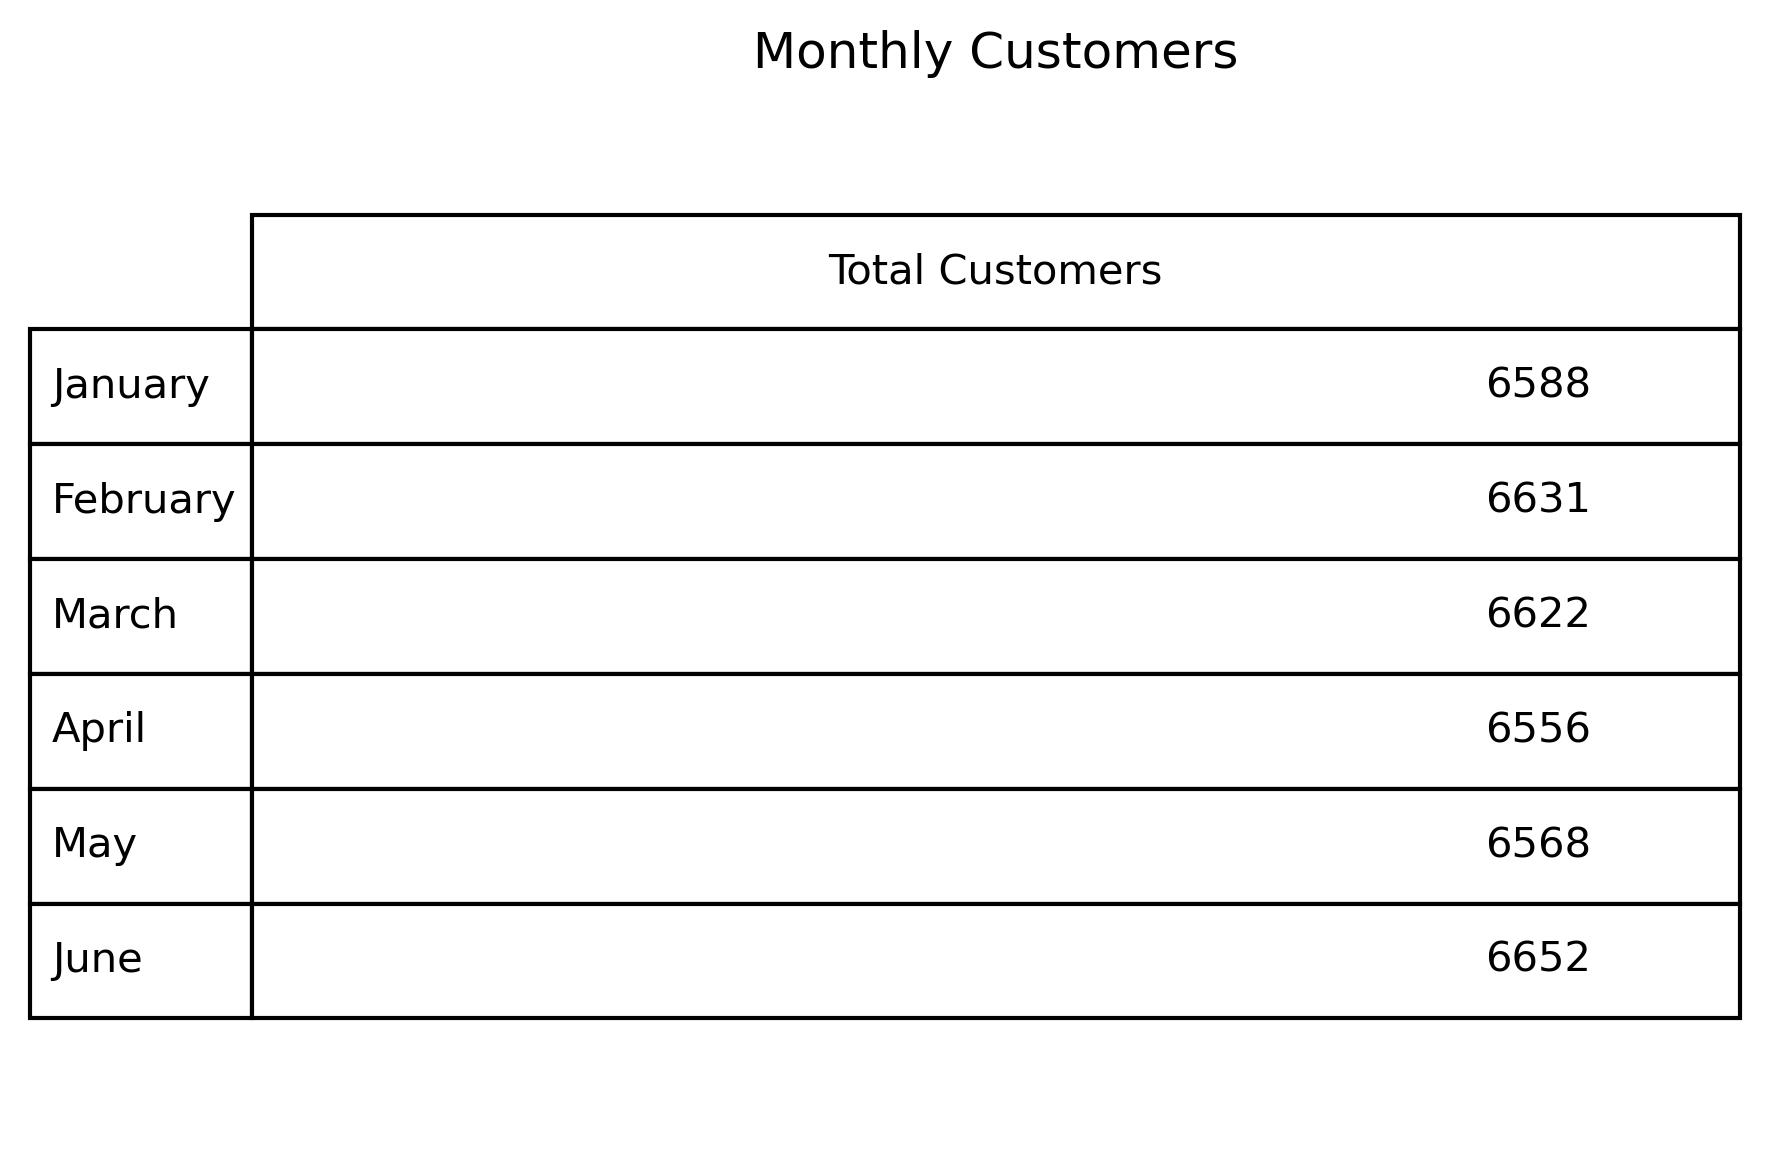

In [220]:
#Monthly customers matplotlib table
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Monthly Customers')
plt.subplots_adjust(bottom=0.5)
table = ax.table(cellText=monthly_customers_df.values, colLabels=monthly_customers_df.columns,rowLabels=monthly_customers_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('monthly_customers_table.png', dpi=300)

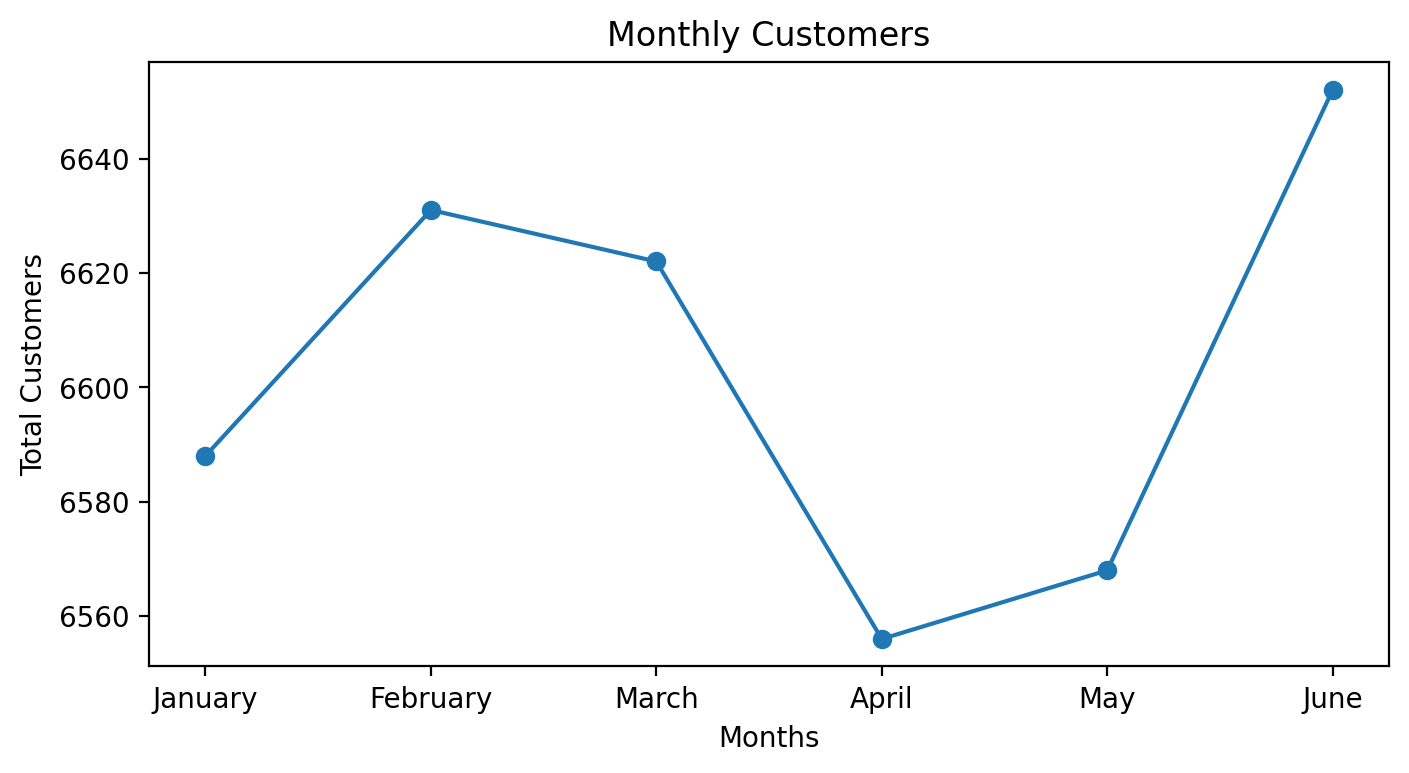

In [221]:
#Graph of total customers during each month from January to June
total_customers = [6588,6631,6622,6556,6568,6652]

fig = plt.figure(figsize=(8,4),dpi=200)
plt.plot(monthslist, total_customers,marker='o')
plt.title('Monthly Customers')
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.show()
fig.savefig('TotalCustomers_line.png', dpi=300)

In [222]:
RIE_users_df

January  February  March  April   May  June
Repeaters        0      5172   5216   5154  5110  5193
Inactive         0      1416   1747   1909  1917  1835
Engaged       6588      5172   4126   3289  2667  2190

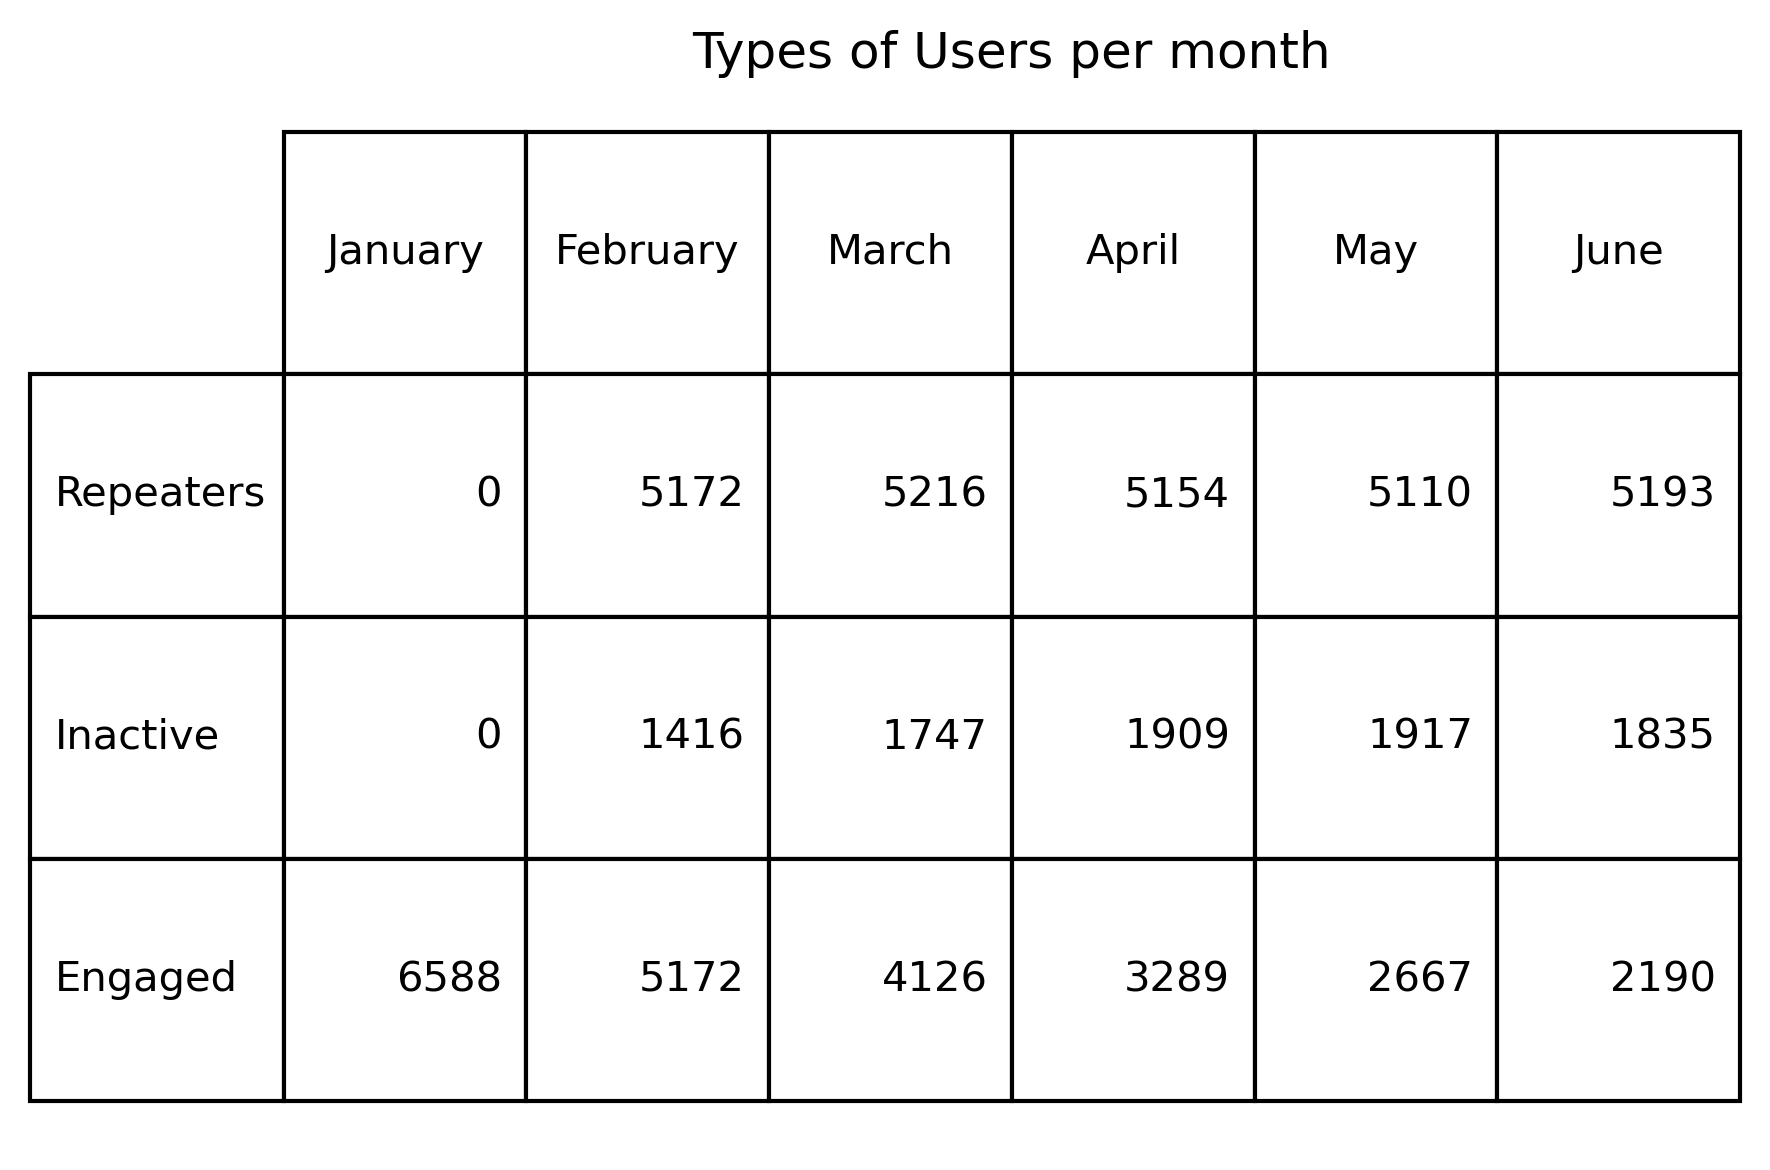

In [223]:
#Testing table of RIE_users_data
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Types of Users per month')
plt.subplots_adjust(bottom=0.7)
table = ax.table(cellText=RIE_users_df.values, colLabels=RIE_users_df.columns,rowLabels=RIE_users_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('RIE_users_table.png', dpi=300)

/var/folders/bd/f3lr6rtn6gd2lq1hgvvvfm5m0000gn/T/ipykernel_35745/971123701.py:31: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


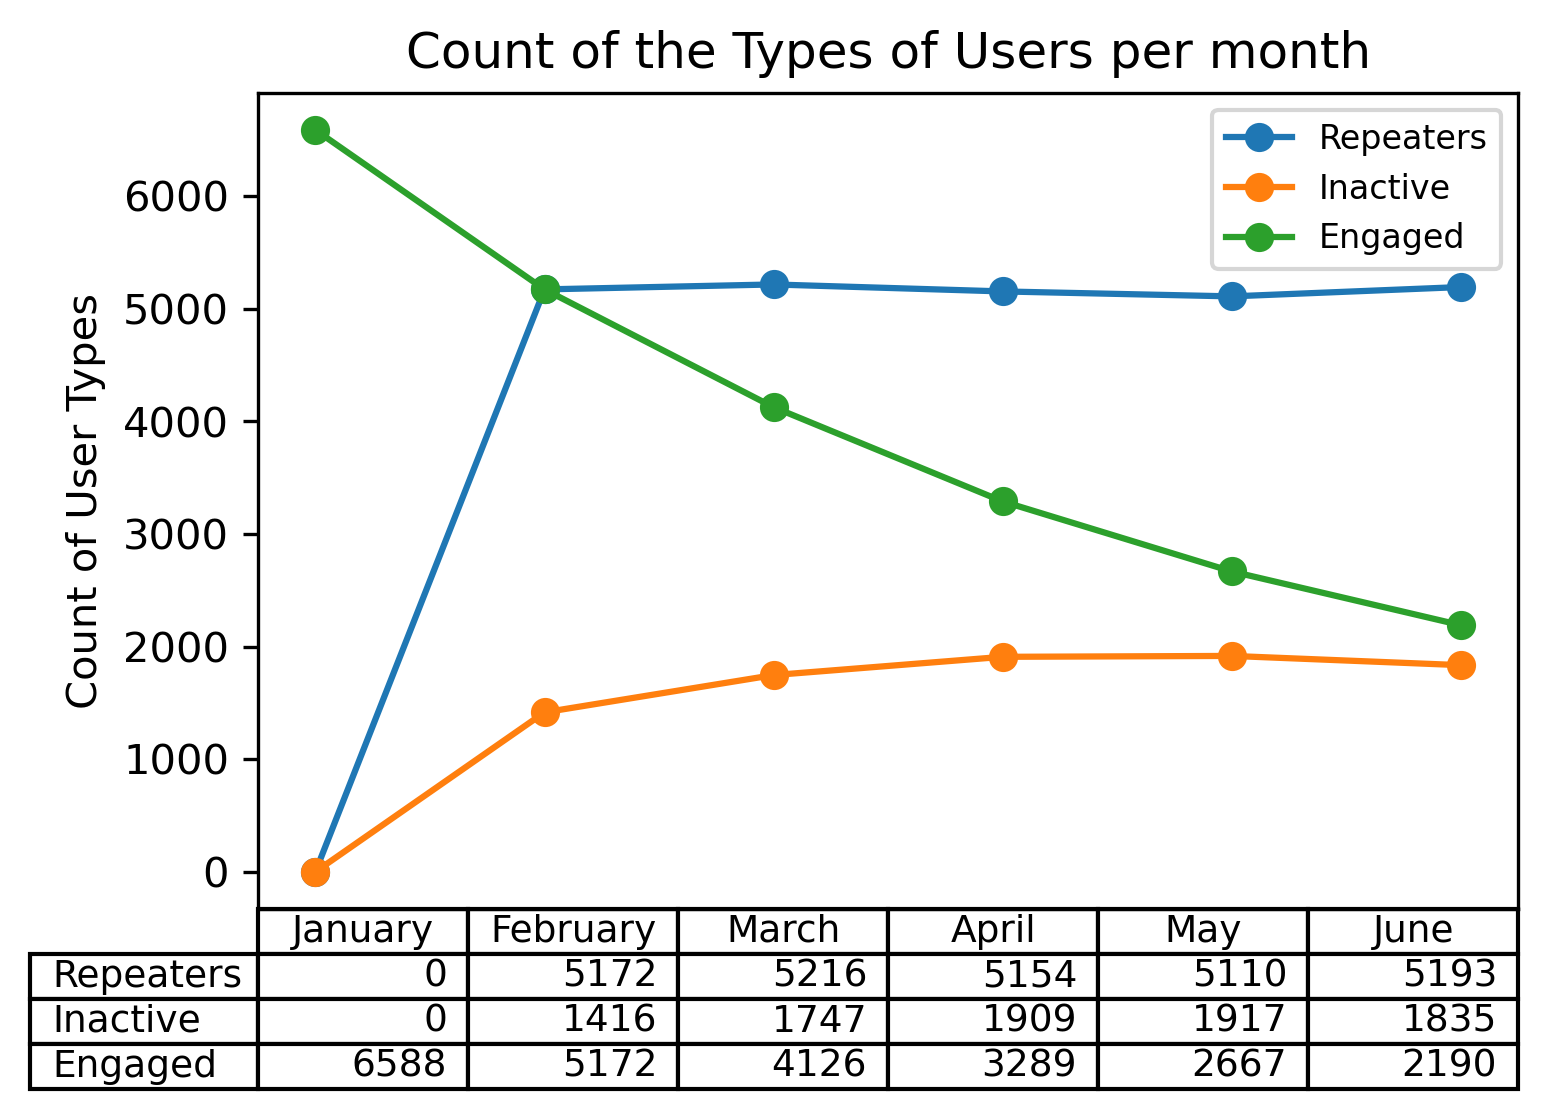

In [258]:
#Creating a line chart and table for RIE_users_data
repeaters = [0,5172,5216,5154,5110,5193]
inactive = [0,1416,1747,1909,1917,1835]
engaged = [6588,5172,4126,3289,2667,2190]

columns = monthslist
rows = ['Repeaters','Inactive','Engaged']

n_rows = len(RIE_data)

index = np.arange(len(columns))+0.3
bar_width = 0.6

y_offset = np.zeros(len(columns))

plt.plot(monthslist,repeaters, label = 'Repeaters',marker='o')
plt.plot(monthslist,inactive, label = 'Inactive',marker='o')
plt.plot(monthslist,engaged, label = 'Engaged',marker='o')




RIE_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='bottom')

plt.subplots_adjust(left=0.2,bottom=0.2)
plt.legend(loc=1, prop={'size':8})
plt.ylabel('Count of User Types')
plt.xticks([])
plt.title('Count of the Types of Users per month')
plt.show()

In [225]:
customer_sex_df = pd.DataFrame(columns=['F','M'])

In [226]:
#T/F column of customers' sex
customer_sex_df['F']=df['sex'].str.contains('F')
customer_sex_df['M']=df['sex'].str.contains('M')
customer_sex_df

F      M
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
83031   True  False
83032  False   True
83033  False   True
83034  False   True
83035   True  False

[83036 rows x 2 columns]

In [259]:
#Sum of F/M customers
customer_sex_df['F'].values.sum()
customer_sex_df['M'].values.sum()

41863

In [228]:
#Sorting DF with sex
customer_sex_per_month_df = splitems_df.groupby(['sex','transaction_month','Beef Chicharon','Kimchi and Seaweed','Nutrional Milk', 'Gummy Vitamins', 'Yummy Vegetables', 'Orange Beans', 'Gummy Worms'], as_index=False).first()
customer_sex_per_month_df.drop(['address','birthdate','mail','username','transaction_value','transaction_date','transaction_items','transaction_quantity'],inplace=True,axis=1)
customer_sex_per_month_df

sex transaction_month  Beef Chicharon  Kimchi and Seaweed  Nutrional Milk  \
0    F             April           False               False           False   
1    F             April           False               False           False   
2    F             April           False               False           False   
3    F             April           False               False           False   
4    F             April           False               False            True   
..  ..               ...             ...                 ...             ...   
79   M               May           False               False           False   
80   M               May           False               False           False   
81   M               May           False               False            True   
82   M               May           False                True           False   
83   M               May            True               False           False   

    Gummy Vitamins  Yummy Vegetables  Orange Beans  Gummy Worms  \
0            False             False         False         True   
1            False             False          True        False   
2            False              True         False        False   
3             True             False         False        False   
4            False             False         False        False   
..             ...               ...           ...          ...   
79           False              True         False        False   
80            True             False         False        False   
81           False             False         False        False   
82           False             False         False        False   
83           False             False         False        False   

                 name  
0   Jennifer Figueroa  
1         Melissa Kim  
2   Jennifer Figueroa  
3         Melissa Kim  
4      Kristen Cooper  
..                ...  
79       Steven Woods  
80    Alexander Davis  
81       Steven Woods  
82    Alexander Davis  
83    Alexander Davis  

[84 rows x 10 columns]

In [260]:
#Number of Male and Female Customers per month
print("F per month:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June'),'name'].count())
print("")
print("Total F:")
print(splitems_df.loc[(splitems_df['sex']=='F'),'name'].count())
print("")
print("M per month:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May'),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June'),'name'].count())
print("")
print("Total M:")
print(splitems_df.loc[(splitems_df['sex']=='M'),'name'].count())

F per month:
13449
13989
13727
13797
13688
13750

Total F:
82400

M per month:
13679
13986
14123
13965
14015
13951

Total M:
83719


In [230]:
#Number of Male and Female Customers Lists
F_customers = [13449,13989,13727,13797,13688,13750,82400]
M_customers = [13679,13986,14123,13965,14015,13951,83719]
monthslistotal = ['January','February','March','April','May','June','Total']
total_FM_df= pd.DataFrame([F_customers,M_customers], columns=monthslistotal, index=['F_customers','M_customers'])
total_FM_df

January  February  March  April    May   June  Total
F_customers    13449     13989  13727  13797  13688  13750  82400
M_customers    13679     13986  14123  13965  14015  13951  83719

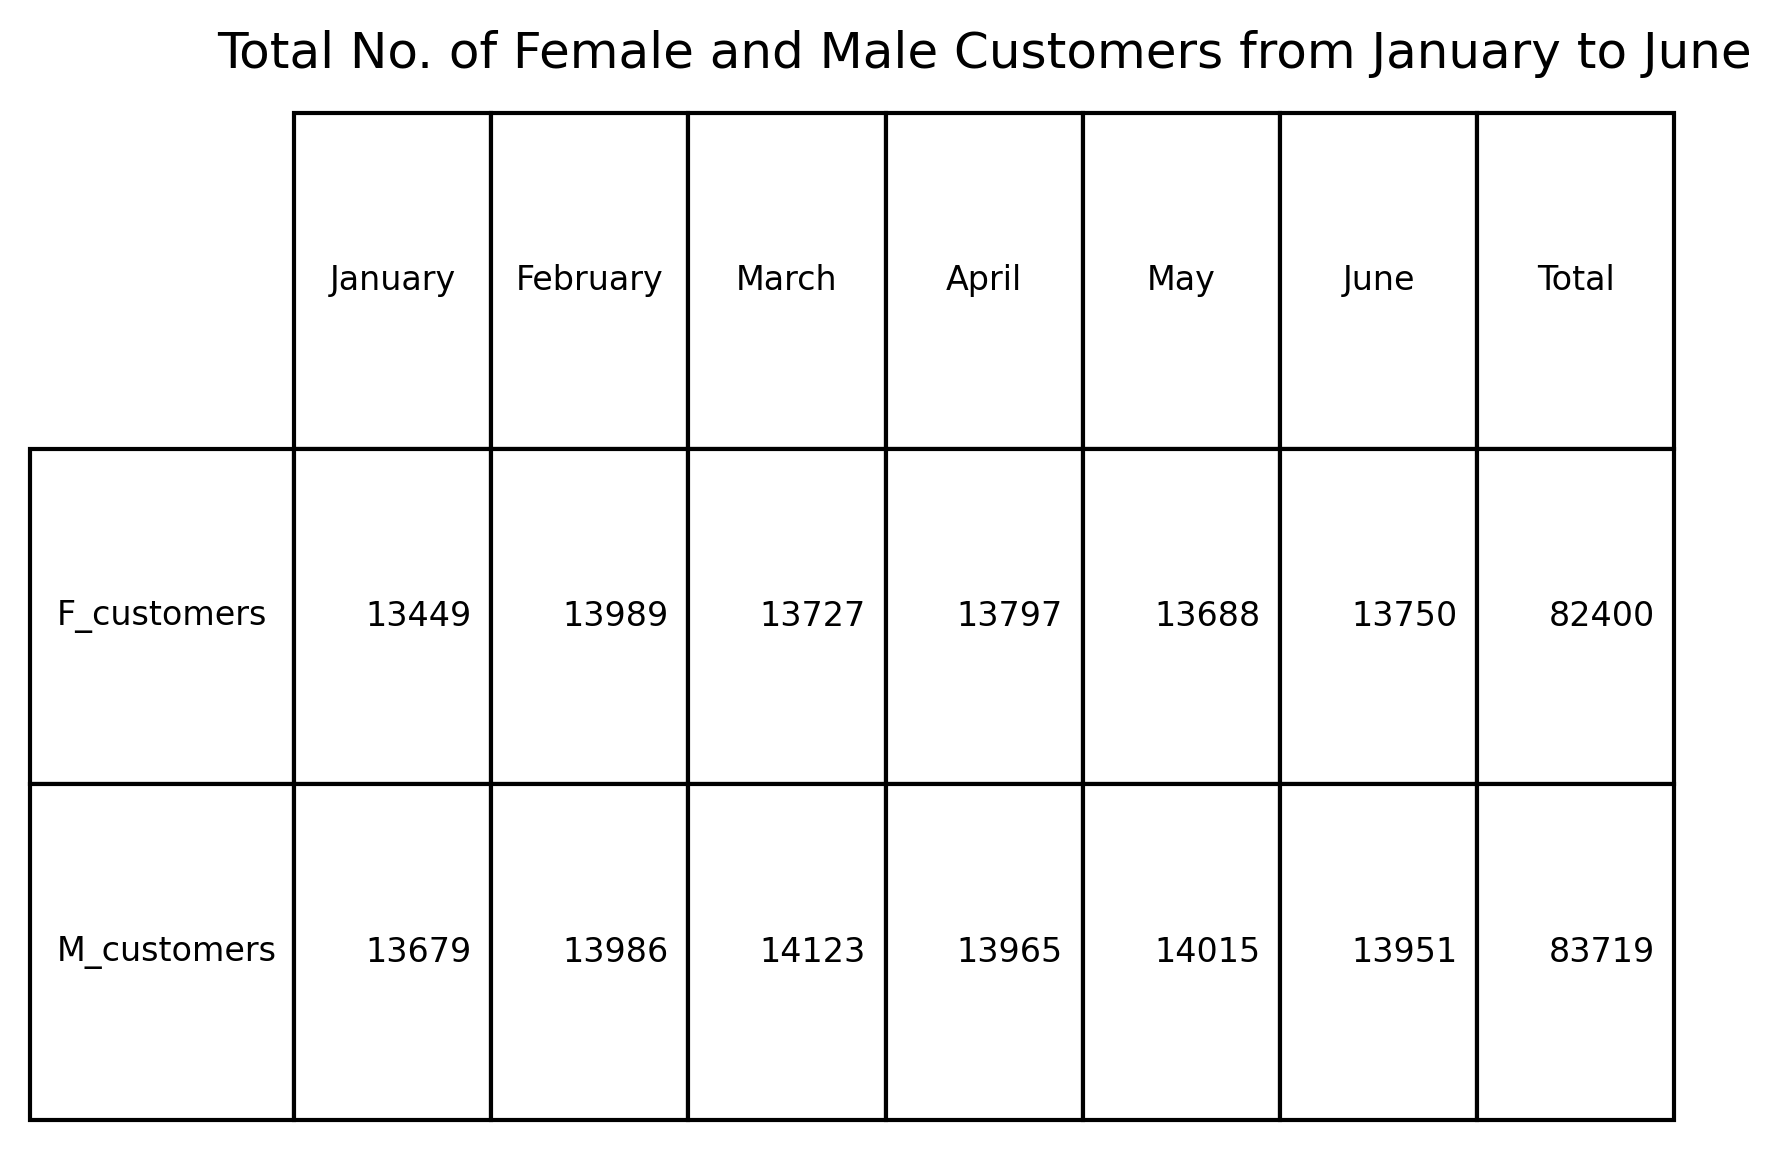

In [231]:
#Table of total_FM_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Female and Male Customers from January to June')
plt.subplots_adjust(bottom=0.75)
table = ax.table(cellText=total_FM_df.values, colLabels=total_FM_df.columns,rowLabels=total_FM_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('total_FM_df_table', dpi=300)

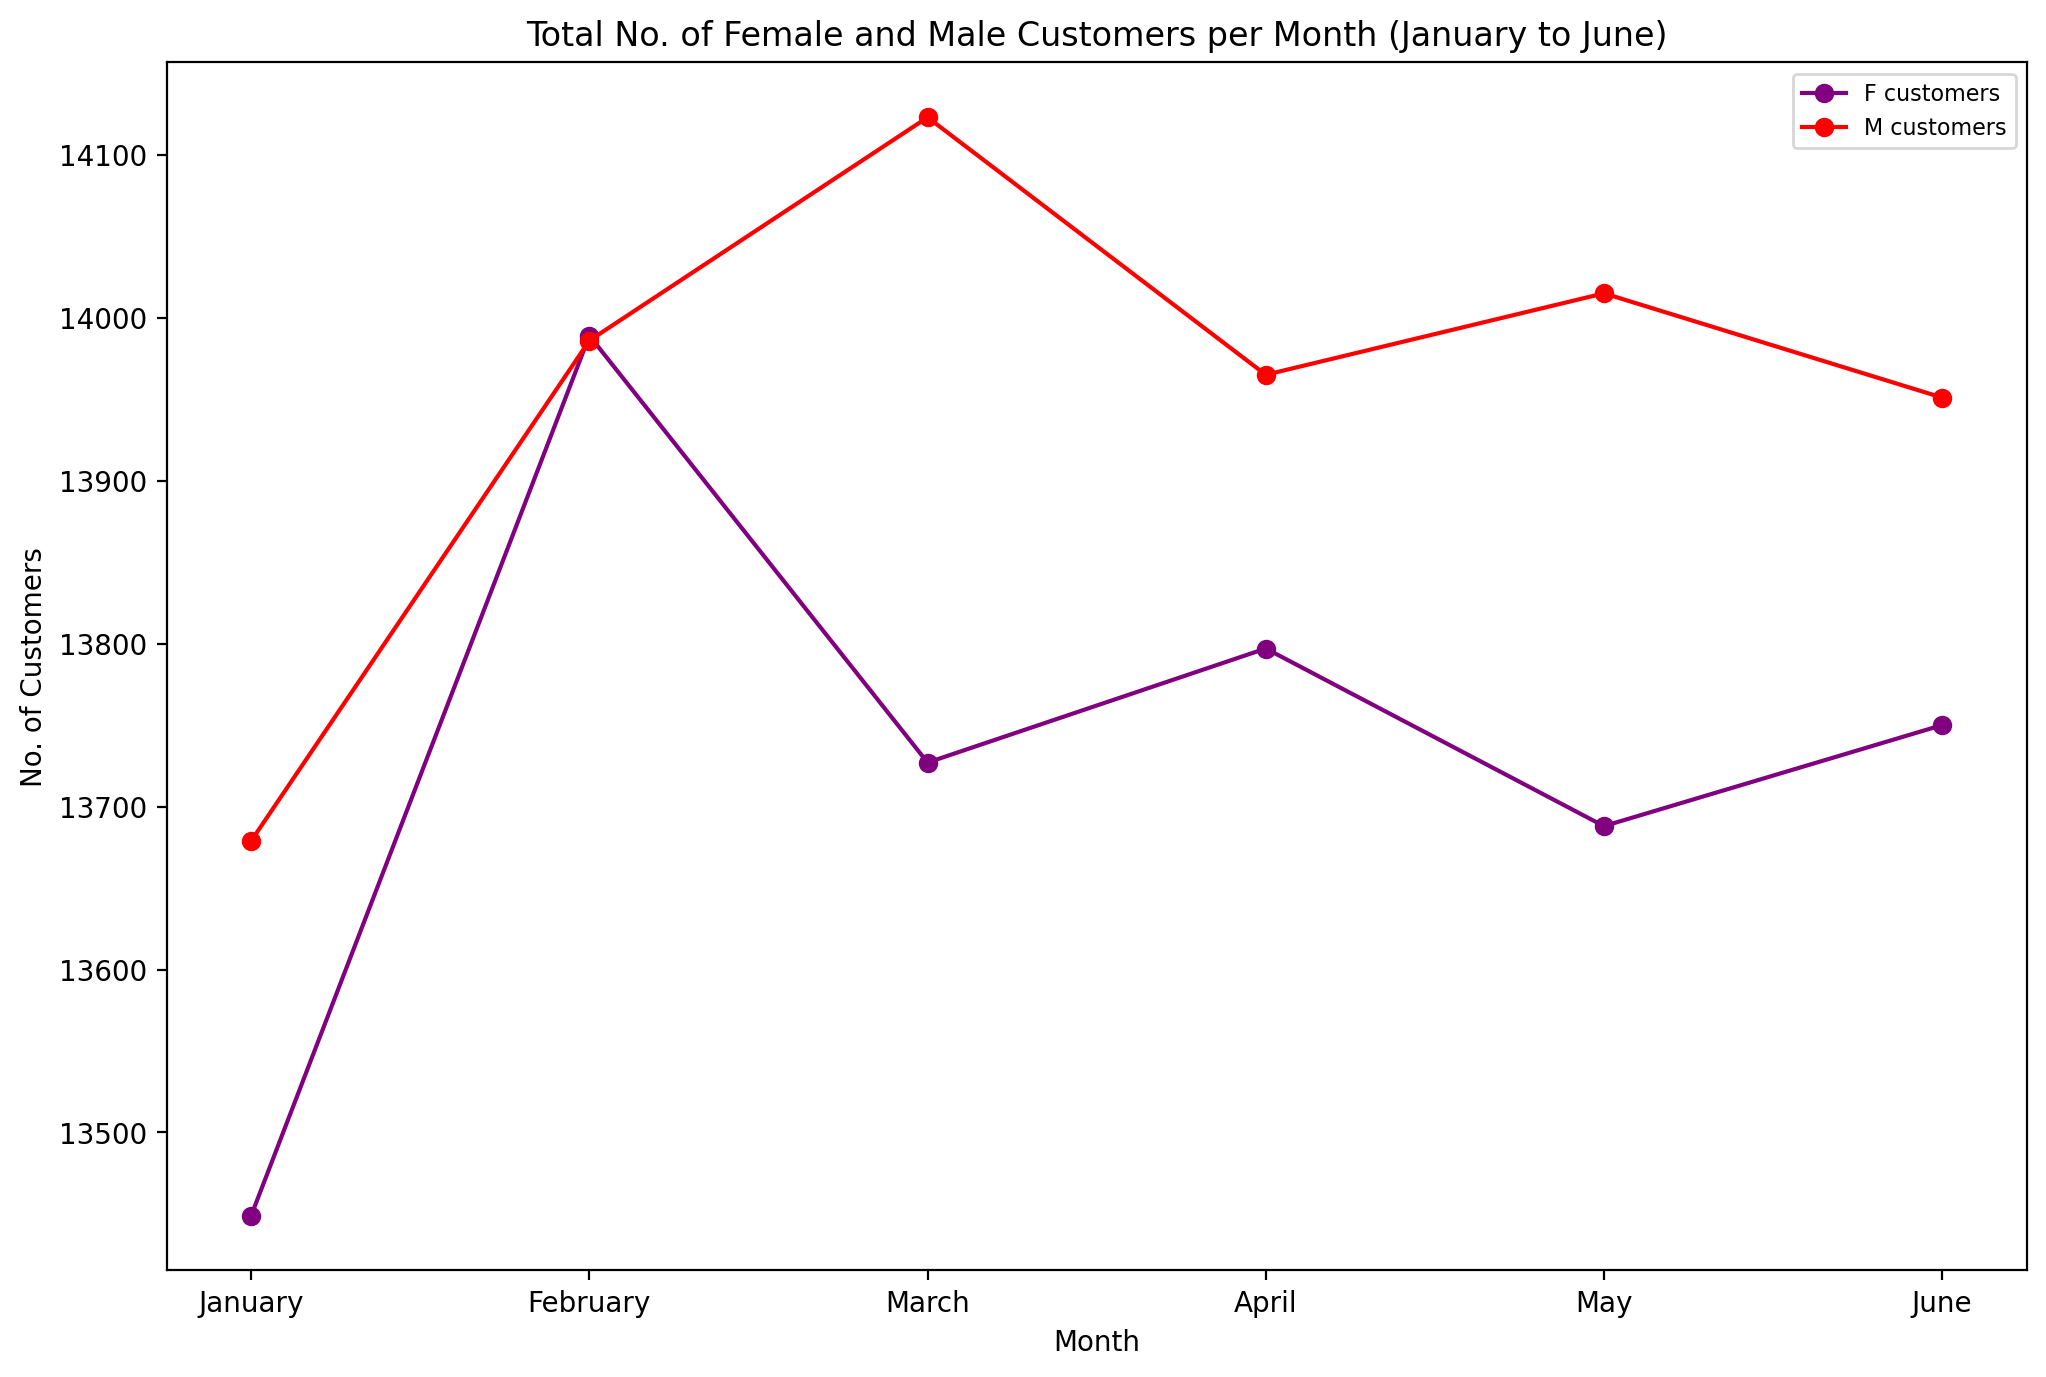

In [232]:
#Total Female/Male customers per month
F_customers_mon =[13449,13989,13727,13797,13688,13750]
M_customers_mon = [13679,13986,14123,13965,14015,13951]

fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(monthslist,F_customers_mon, label = 'F customers',marker = "o", color = 'purple')
plt.plot(monthslist,M_customers_mon, label = 'M customers',marker = "o", color = 'red')
plt.legend(loc=1, prop={'size':8})

plt.title('Total No. of Female and Male Customers per Month (January to June)')
plt.xlabel('Month')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_FM_line',dpi=300)


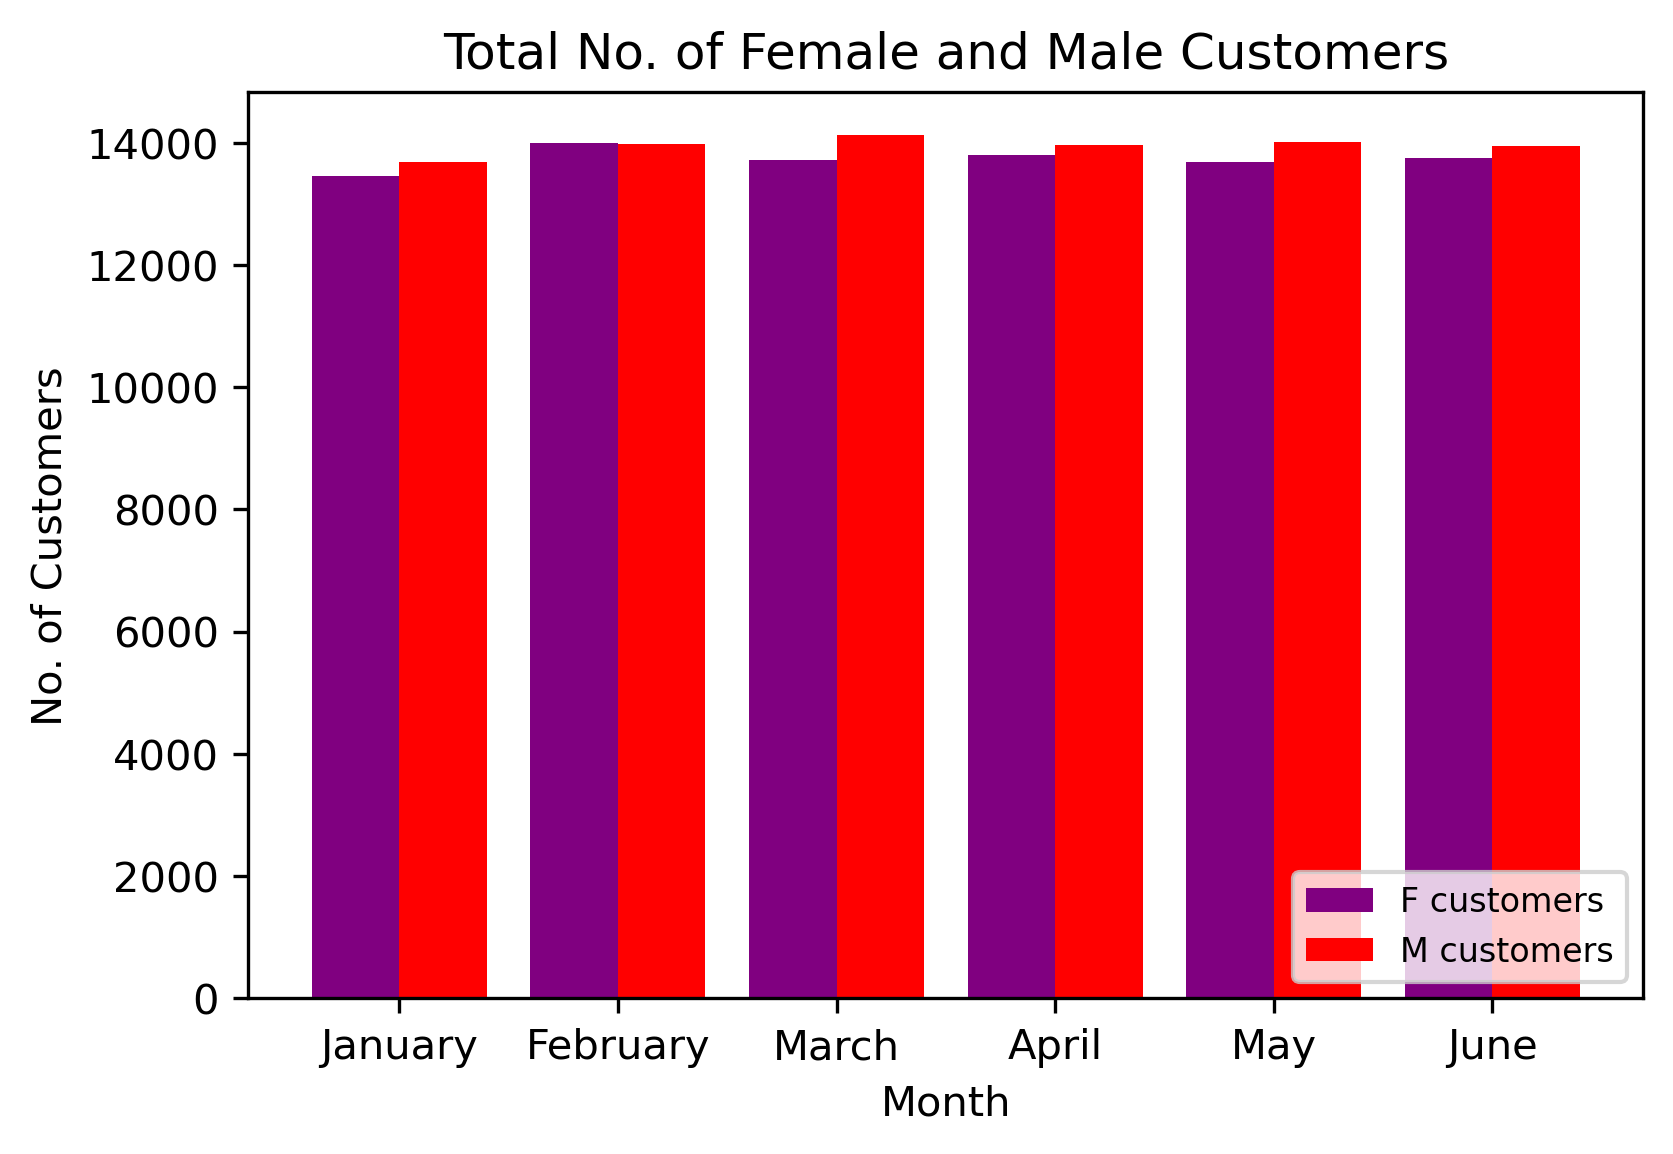

In [233]:
#Total Female/Male customers per month
F_customers_mon =[13449,13989,13727,13797,13688,13750]
M_customers_mon = [13679,13986,14123,13965,14015,13951]

X = monthslist
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, F_customers_mon, 0.4, label = 'F customers', color = 'purple')
plt.bar(X_axis + 0.2, M_customers_mon, 0.4, label = 'M customers', color = 'red')
plt.xticks(X_axis,X)
plt.legend(loc=4, prop={'size':8})
plt.title('Total No. of Female and Male Customers')
plt.xlabel('Month')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_FM_bar', dpi=200)


In [234]:
#Number of Female Customers per Item per Month
print("EEBC F:")
print("")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Beef Chicharon']==True),'name'].count())
print("")
print("Total EEBC F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Beef Chicharon']==True),'name'].count())
print("")
print("EEKS F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Total EEKS F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("HKNM F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Nutrional Milk']==True),'name'].count())
print("")
print("Total HKNM F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Nutrional Milk']==True),'name'].count())
print("")
print("HKGV F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Total HKGV F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print("")
print("HKYV F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Total HKYV F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print("")
print("CCOB F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Orange Beans']==True),'name'].count())
print("")
print("Total CCOB F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Orange Beans']==True),'name'].count())
print("")
print("CCGW F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='January')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='February')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='March')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='April')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='May')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['transaction_month']=='June')&(splitems_df['Gummy Worms']==True),'name'].count())
print("")
print("Total CCGW F:")
print(splitems_df.loc[(splitems_df['sex']=='F')&(splitems_df['Gummy Worms']==True),'name'].count())
print("")

EEBC F:

1938
2015
1959
1968
1935
1981

Total EEBC F:
11796

EEKS F:
1897
2036
1927
2009
1984
2004

Total EEKS F:
11857

HKNM F:
1933
1935
1945
1914
1970
1882

Total HKNM F:
11579

HKGV F:
1921
1970
1970
1906
1964
1981

Total HKGV F:
11712

HKYV F:
1964
2008
2027
2022
1961
1904

Total HKYV F:
11886

CCOB F:
1900
1996
1929
1966
1969
2050

Total CCOB F:
11810

CCGW F:
1896
2029
1970
2012
1905
1948

Total CCGW F:
11760



In [235]:
#Number of Male Customers per Item per Month
print("")
print("EEBC M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Beef Chicharon']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Beef Chicharon']==True),'name'].count())
print("")
print("Total EEBC M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Beef Chicharon']==True),'name'].count())
print("")
print("EEKS M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Total EEKS M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("HKNM M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Nutrional Milk']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Nutrional Milk']==True),'name'].count())
print("")
print("Total HKNM M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Nutrional Milk']==True),'name'].count())
print("")
print("HKGV M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Total HKGV M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Gummy Vitamins']==True),'name'].count())
print("")
print("HKYV M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Total HKYV M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Yummy Vegetables']==True),'name'].count())
print("")
print("CCOB M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Orange Beans']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Orange Beans']==True),'name'].count())
print("")
print("Total CCOB M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Orange Beans']==True),'name'].count())
print("")
print("CCGW M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='January')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='February')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='March')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='April')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='May')&(splitems_df['Gummy Worms']==True),'name'].count())
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['transaction_month']=='June')&(splitems_df['Gummy Worms']==True),'name'].count())
print("")
print("Total CCGW M:")
print(splitems_df.loc[(splitems_df['sex']=='M')&(splitems_df['Gummy Worms']==True),'name'].count())


EEBC M:
1919
1989
2012
2024
2053
1992

Total EEBC M:
11989

EEKS M:
2016
1978
2062
1940
1953
2015

Total EEKS M:
11964

HKNM M:
1939
1964
2017
2038
2027
1968

Total HKNM M:
11953

HKGV M:
1939
2020
2082
2020
2005
2016

Total HKGV M:
12082

HKYV M:
2012
2064
1961
1953
1954
2002

Total HKYV M:
11946

CCOB M:
1948
1972
1979
2003
2006
1979

Total CCOB M:
11887

CCGW M:
1906
1999
2010
1987
2017
1979

Total CCGW M:
11898


In [236]:
#Number of Female/Male customers per item per month
F_items_jan = [1938,1897,1933,1921,1964,1900,1896]
F_items_feb = [2015,2036,1935,1970,2008,1996,2029]
F_items_mar = [1959,1927,1945,1970,2027,1929,1970]
F_items_apr = [1968,2009,1914,1906,2022,1966,2012]
F_items_may = [1935,1984,1970,1964,1961,1969,1905]
F_items_jun = [1981,2004,1882,1981,1904,2050,1948]
F_items_tot = [11796,11857,11579,11712,11886,11810,11760]

M_items_jan = [1919,2016,1939,1939,2012,1948,1906]
M_items_feb = [1989,1978,1964,2020,2064,1972,1999]
M_items_mar = [2012,2062,2017,2082,1961,1979,2010]
M_items_apr = [2024,1940,2038,2020,1953,2004,1987]
M_items_may = [2053,1953,2027,2005,1954,2006,2017]
M_items_jun = [1992,2015,1968,2016,2002,1979,1979]
M_items_tot = [11989,11964,11953,12082,11946,11887,11898]

F_items_month_df = pd.DataFrame([F_items_jan,F_items_feb,F_items_mar,F_items_apr,F_items_may,F_items_jun],columns=['EEBC_F','EEKS_F','HKNM_F','HKGV_F','HKYV_F','CCOB_F','CCGW_F'],index=monthslist)
F_items_month_df  
F_items_montht_df = pd.DataFrame([F_items_jan,F_items_feb,F_items_mar,F_items_apr,F_items_may,F_items_jun,F_items_tot],columns=['EEBC_F','EEKS_F','HKNM_F','HKGV_F','HKYV_F','CCOB_F','CCGW_F'],index=monthslistotal)
F_items_montht_df  
M_items_month_df = pd.DataFrame([M_items_jan,M_items_feb,M_items_mar,M_items_apr,M_items_may,M_items_jun],columns=['EEBC_M','EEKS_M','HKNM_M','HKGV_M','HKYV_M','CCOB_M','CCGW_M'],index=monthslist)
M_items_month_df
M_items_montht_df = pd.DataFrame([M_items_jan,M_items_feb,M_items_mar,M_items_apr,M_items_may,M_items_jun,M_items_tot],columns=['EEBC_M','EEKS_M','HKNM_M','HKGV_M','HKYV_M','CCOB_M','CCGW_M'],index=monthslistotal)
M_items_montht_df 

EEBC_M  EEKS_M  HKNM_M  HKGV_M  HKYV_M  CCOB_M  CCGW_M
January     1919    2016    1939    1939    2012    1948    1906
February    1989    1978    1964    2020    2064    1972    1999
March       2012    2062    2017    2082    1961    1979    2010
April       2024    1940    2038    2020    1953    2004    1987
May         2053    1953    2027    2005    1954    2006    2017
June        1992    2015    1968    2016    2002    1979    1979
Total      11989   11964   11953   12082   11946   11887   11898

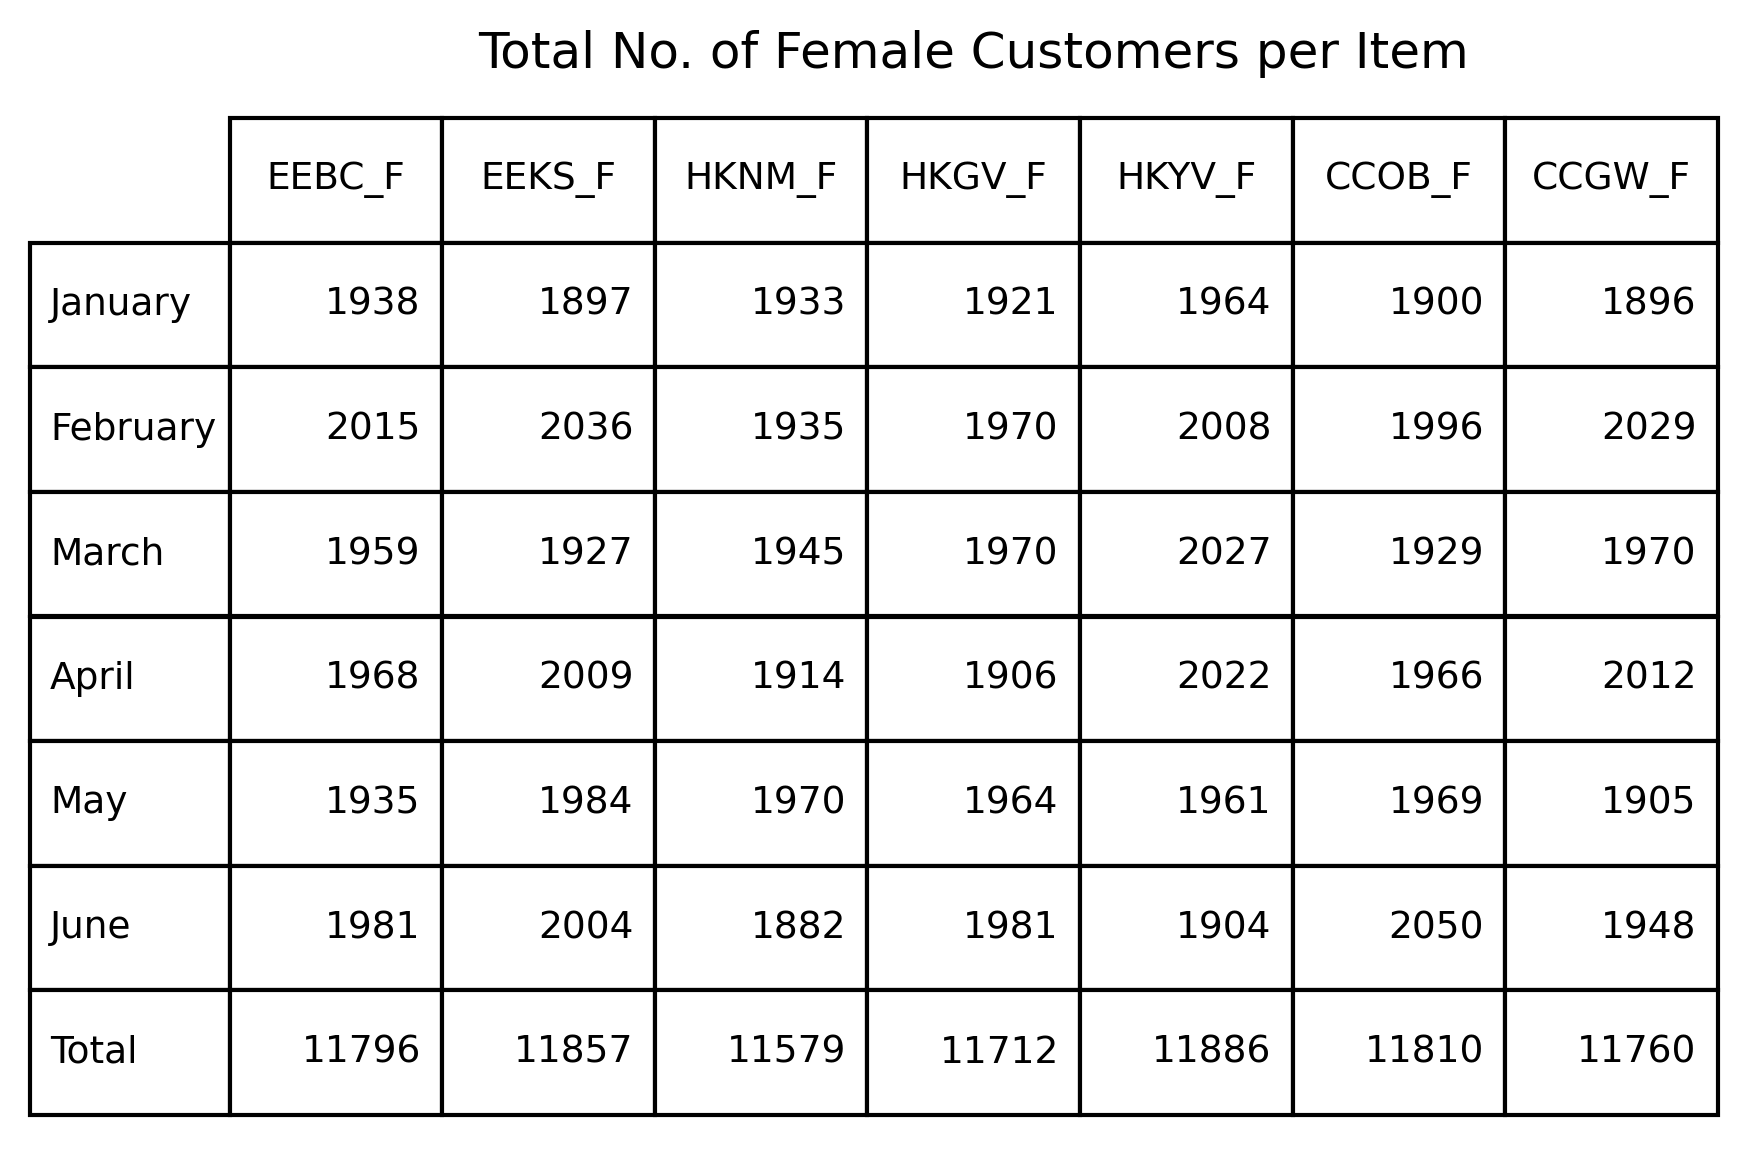

In [237]:
#Table of F_items_montht_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Female Customers per Item')
plt.subplots_adjust(bottom=0.53)
table = ax.table(cellText=F_items_montht_df.values, colLabels=F_items_montht_df.columns,rowLabels=F_items_montht_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('F_items_montht_df_table', dpi=200)

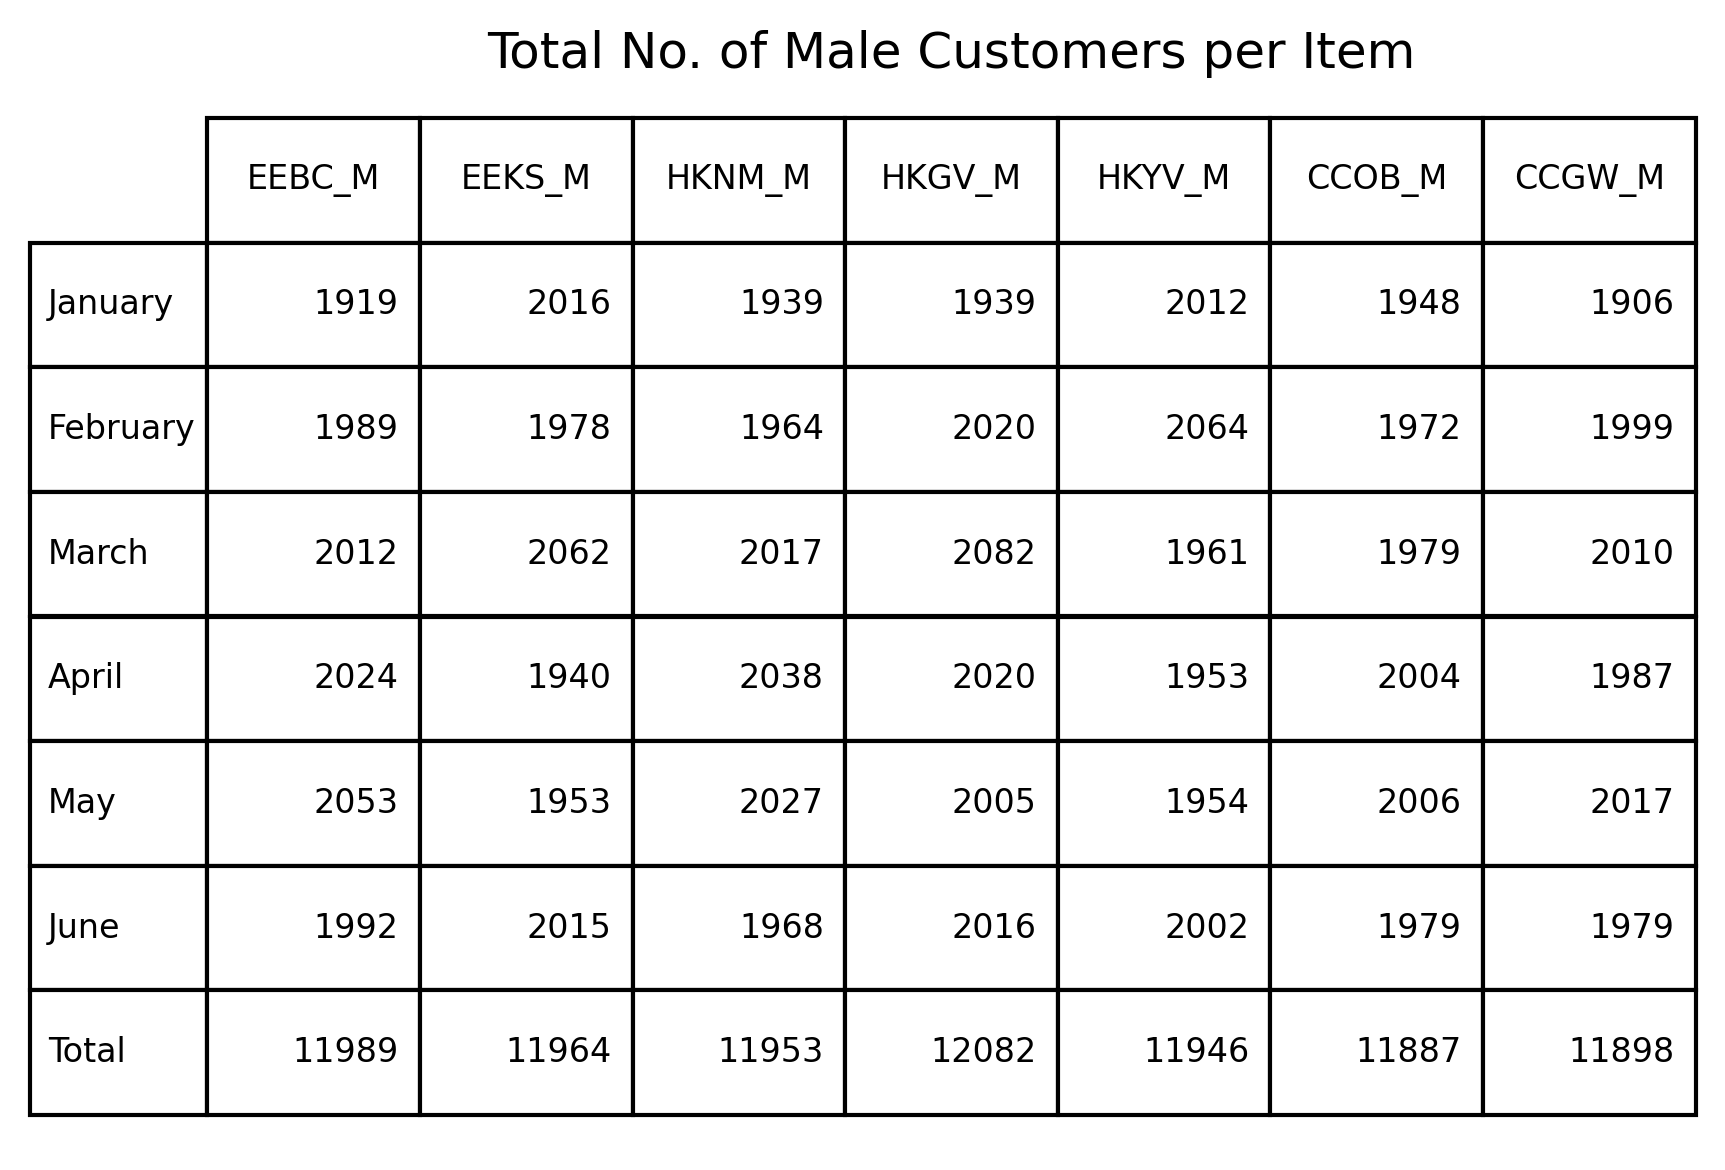

In [238]:
#Table of M_items_montht_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Male Customers per Item')
plt.subplots_adjust(bottom=0.53)
table = ax.table(cellText=M_items_montht_df.values, colLabels=M_items_montht_df.columns,rowLabels=M_items_montht_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('M_items_montht_df_table', dpi=200)

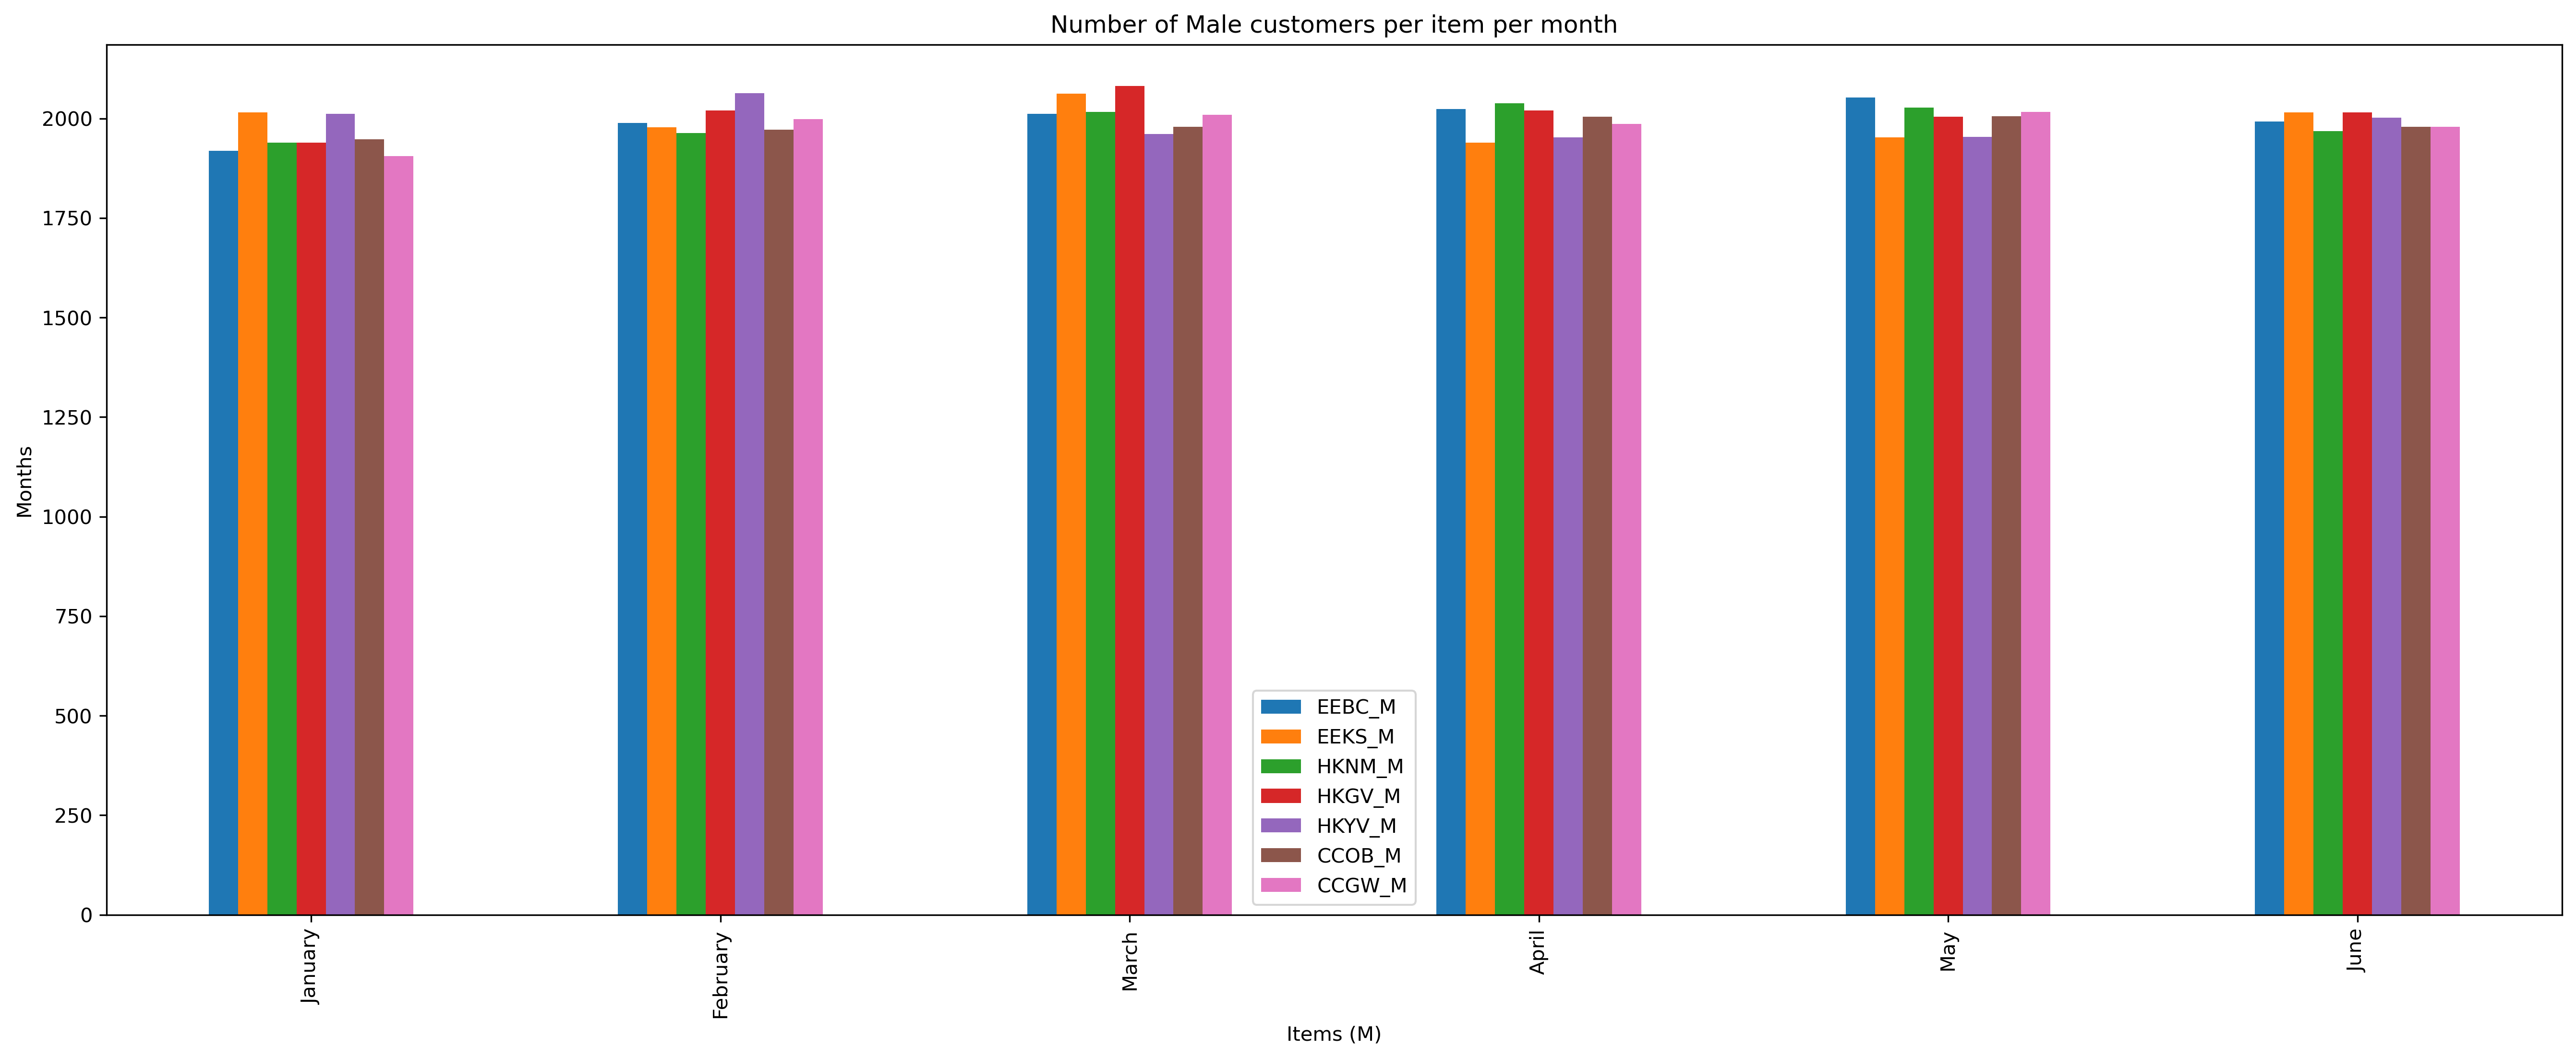

In [239]:
M_mitems_graph = M_items_month_df.plot(kind='bar',figsize=(22,8)).legend(loc='best')
plt.ylabel('Months')
plt.xlabel('Items (M)')
plt.title('Number of Male customers per item per month')
M_mitems_graph.figure.savefig('M_mitems_bar.png')

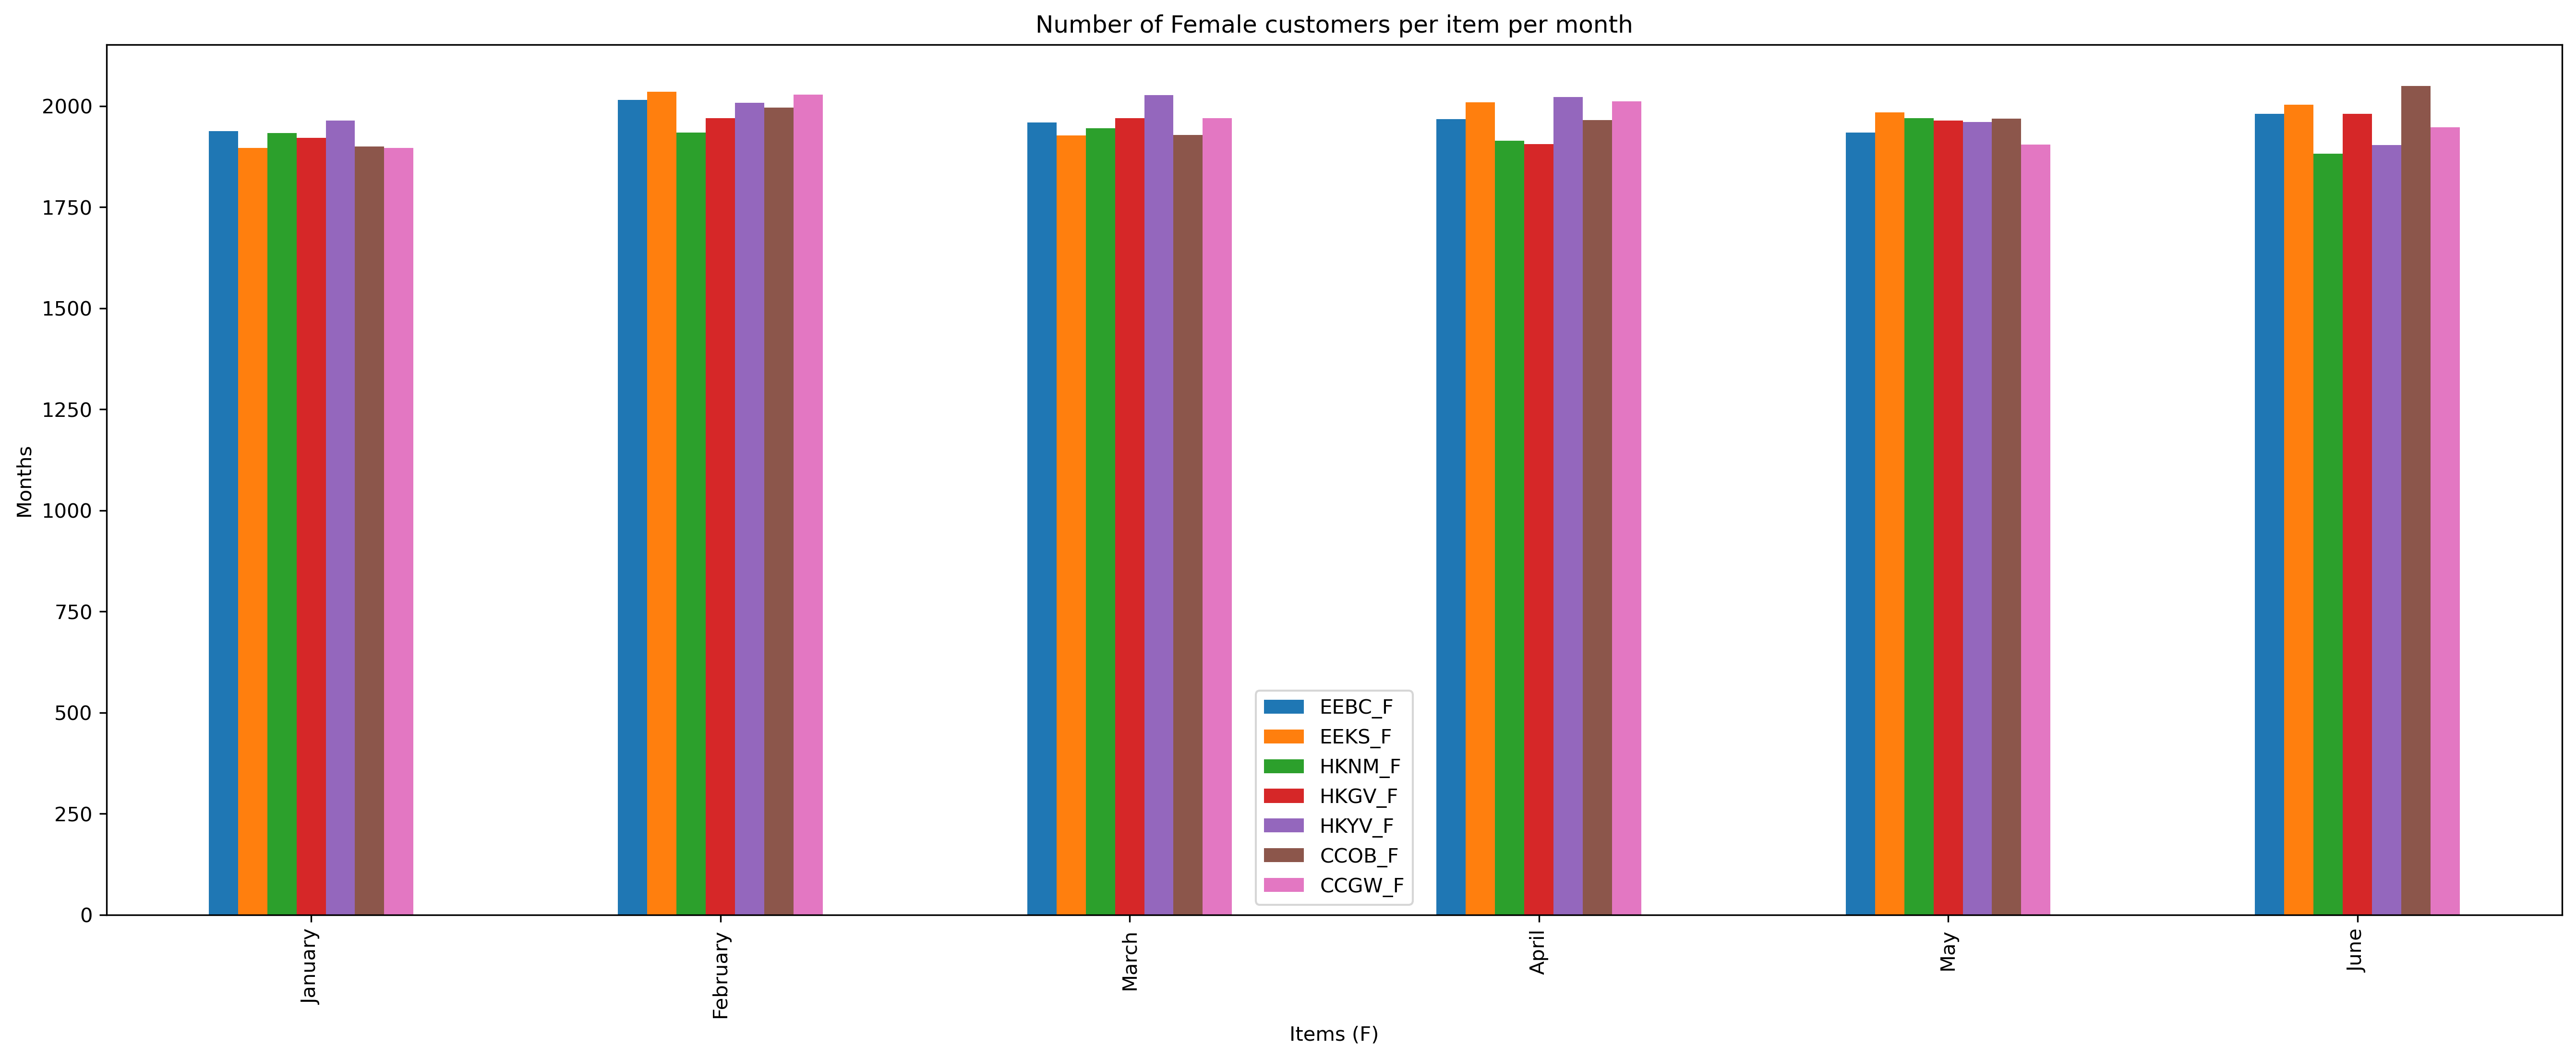

In [240]:
F_mitems_graph = F_items_month_df.plot(kind='bar',figsize=(22,8)).legend(loc='best')
plt.ylabel('Months')
plt.xlabel('Items (F)')
plt.title('Number of Female customers per item per month')
F_mitems_graph.figure.savefig('F_mitems_bar.png')

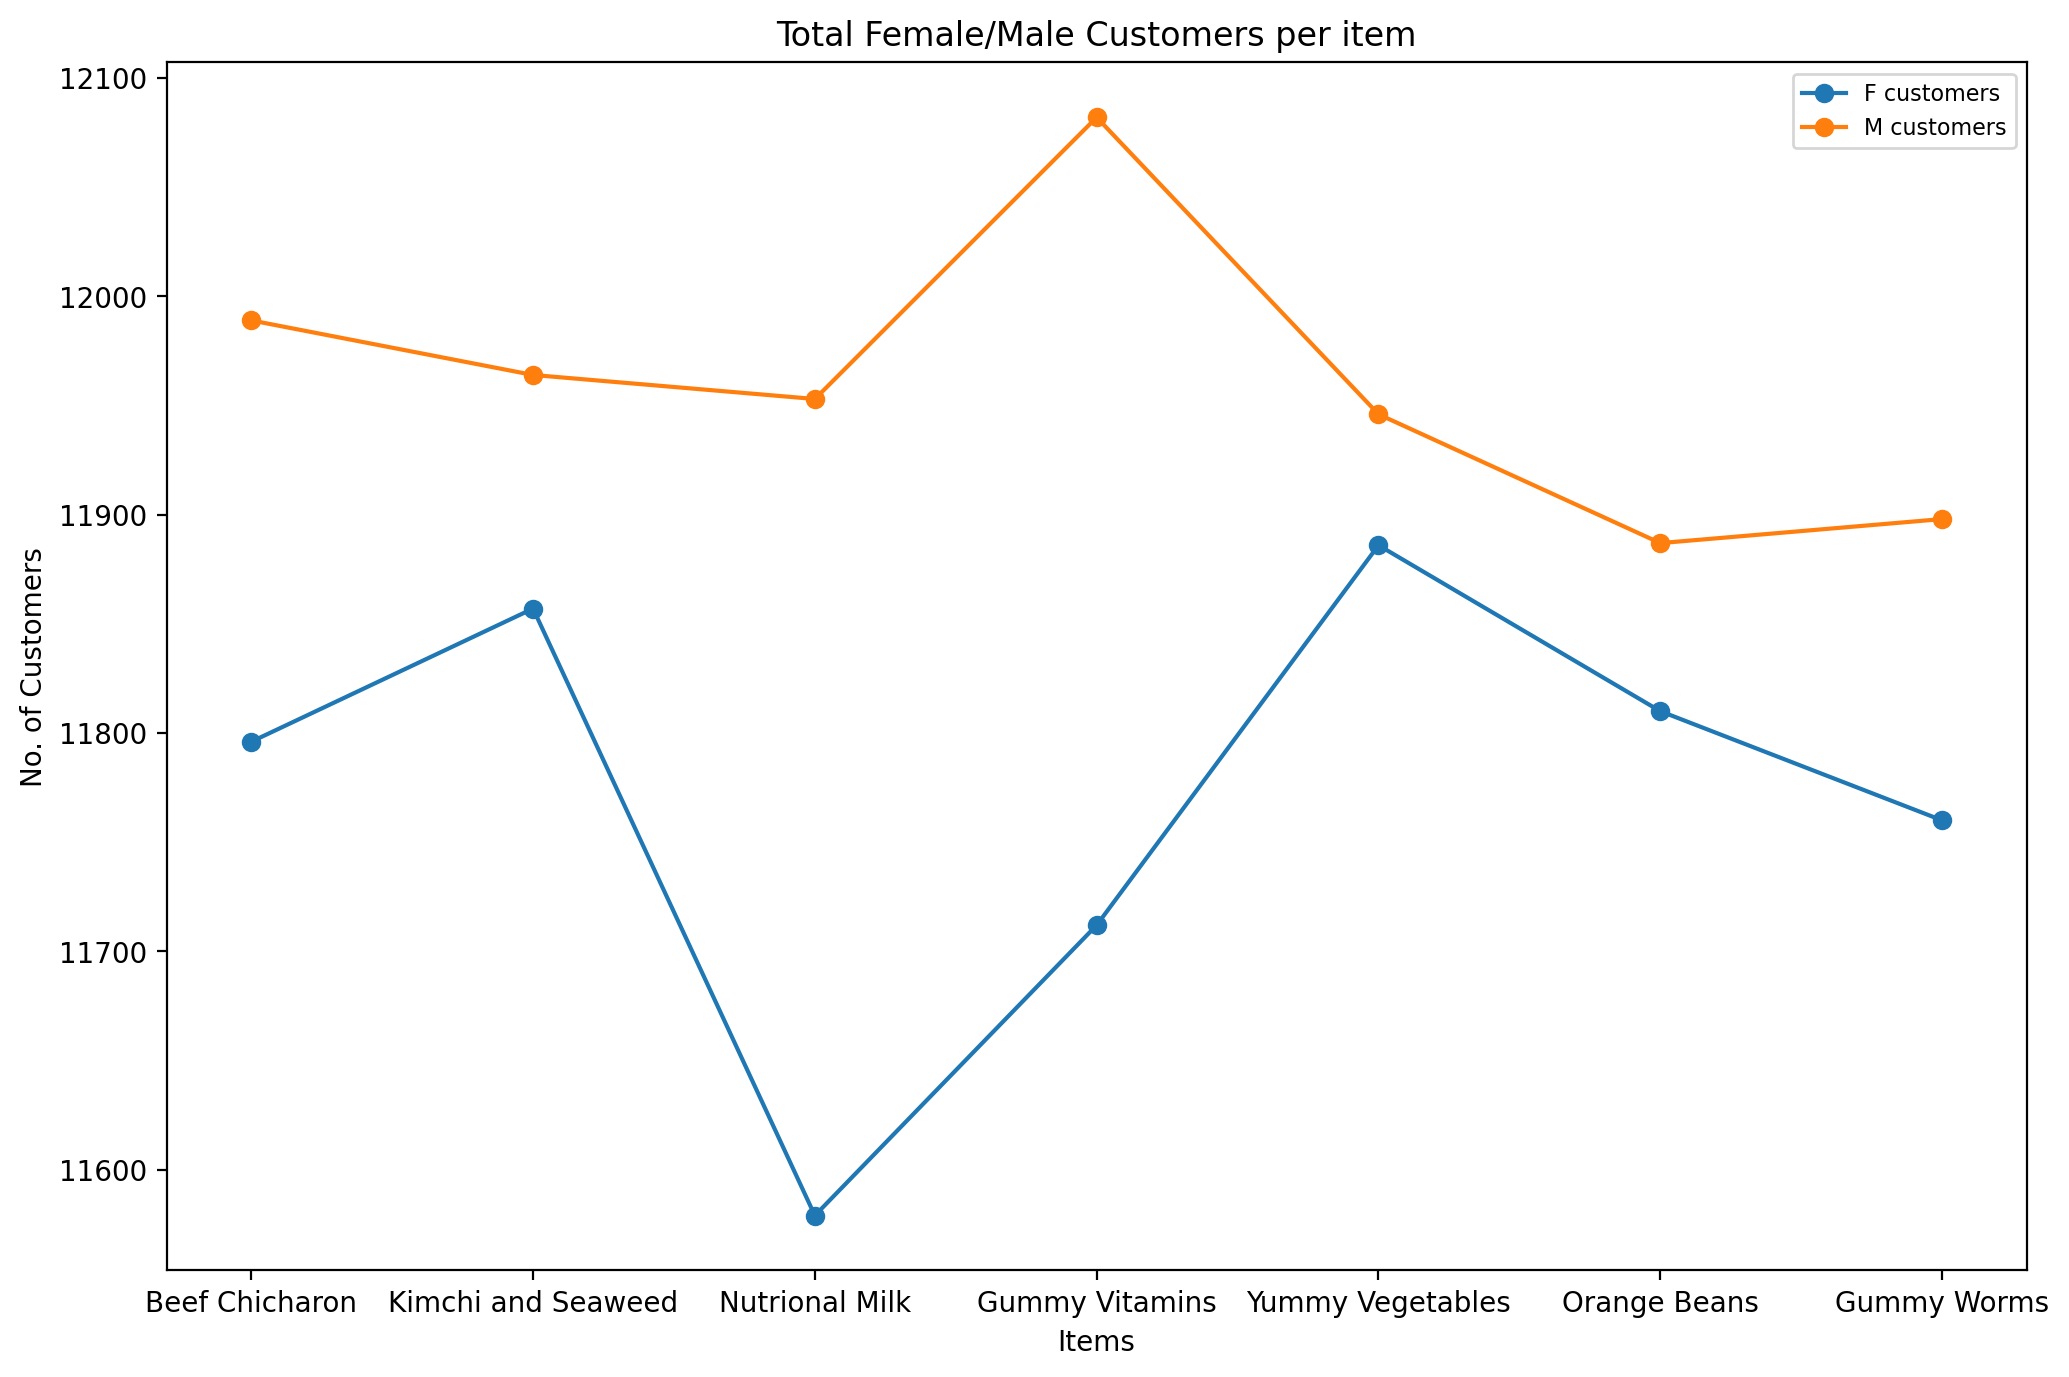

In [241]:
#Total Female/Male customers per item
F_per_item = [11796,11857,11579,11712,11886,11810,11760]
M_per_item = [11989,11964,11953,12082,11946,11887,11898]

fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(itemslist,F_per_item, label = 'F customers', marker = "o")
plt.plot(itemslist,M_per_item, label = 'M customers', marker = "o")
plt.legend(loc=1, prop={'size':8})

plt.title('Total Female/Male Customers per item')
plt.xlabel('Items')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_FM_item_line',dpi=200)


In [242]:
#Unqiue Customers DF
unique_customers_df = splitems_df.groupby(['name'],as_index=False).first()
unique_customers_df

name                                            address  \
0         Aaron Beasley     1464 Ian Squares Apt. 351\nJasonberg, ND 95840   
1          Aaron Brewer            31499 Donna Locks\nTaylorfurt, MO 98699   
2           Aaron Brown          532 Sexton Overpass\nFloresview, TN 53240   
3          Aaron Coffey           9332 Edward Court\nRamirezland, NC 80112   
4           Aaron Davis       2729 Jessica Landing\nSanchezburgh, PA 22575   
...                 ...                                                ...   
8482  Zachary Valentine  6594 Barnes Ramp Apt. 134\nNorth Toddmouth, WY...   
8483       Zachary Ware       67639 Jorge Isle\nWest Stephenfurt, KS 06856   
8484   Zachary Williams         008 Mcdaniel Plaza\nMccartyhaven, DE 07143   
8485     Zachary Wilson                   PSC 0371, Box 7472\nAPO AP 53894   
8486       Zachary York  46641 Williams Bypass Suite 868\nGalvanfurt, N...   

       birthdate                          mail sex      username  \
0     1999/02/07             lvaldez@yahoo.com   M  hermanjustin   
1     1938/02/25  allisonkatherine@hotmail.com   M     kathryn58   
2     2013/12/21     charlesthompson@yahoo.com   M  coxjohnathan   
3     2006/09/18            cstevens@yahoo.com   M     monique70   
4     2010/01/25            wjames@hotmail.com   M          tcox   
...          ...                           ...  ..           ...   
8482  2018/07/30              ihurst@gmail.com   M        jsmith   
8483  2004/09/24       suzanneholmes@yahoo.com   M        bsloan   
8484  1909/09/30          danielle98@gmail.com   M      bcollins   
8485  1968/04/03   haaschristopher@hotmail.com   M        hpratt   
8486  1920/07/11          ronald36@hotmail.com   M   jesusdaniel   

      transaction_value transaction_date                    transaction_items  \
0                  4588       2022/04/24    HealthyKid 3+,Nutrional Milk,(x1)   
1                  6490       2022/01/08    HealthyKid 3+,Gummy Vitamins,(x3)   
2                  5992       2022/03/27         Candy City,Orange Beans,(x4)   
3                   500       2022/01/19  HealthyKid 3+,Yummy Vegetables,(x1)   
4                  8260       2022/01/18          Candy City,Gummy Worms,(x2)   
...                 ...              ...                                  ...   
8482               4450       2022/01/27          Candy City,Gummy Worms,(x3)   
8483               4996       2022/01/28         Candy City,Orange Beans,(x2)   
8484                796       2022/01/30         Candy City,Orange Beans,(x4)   
8485               5196       2022/04/04    Exotic Extras,Beef Chicharon,(x4)   
8486               7960       2022/01/03    HealthyKid 3+,Nutrional Milk,(x4)   

      transaction_quantity transaction_month  Beef Chicharon  \
0                        1             April           False   
1                        3           January           False   
2                        4             March           False   
3                        1           January           False   
4                        2           January           False   
...                    ...               ...             ...   
8482                     3           January           False   
8483                     2           January           False   
8484                     4           January           False   
8485                     4             April            True   
8486                     4           January           False   

      Kimchi and Seaweed  Nutrional Milk  Gummy Vitamins  Yummy Vegetables  \
0                  False            True           False             False   
1                  False           False            True             False   
2                  False           False           False             False   
3                  False           False           False              True   
4                  False           False           False             False   
...                  ...             ...             ..

In [243]:
#Number of Unique Male and Female Customers per month
print("Unique F per Month:")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June'),'name'].count())
print("")
print("Total Unique F:")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F'),'name'].count())
print("")
print("Unique M per Month:")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May'),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June'),'name'].count())
print("")
print("Total Unique M:")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M'),'name'].count())

Unique F per Month:
3301
752
163
50
10
2

Total Unique F:
4278

Unique M per Month:
3287
707
159
46
10
0

Total Unique M:
4209


In [244]:
#Number of Unique Male and Female Customers
F_customers_unique = [3301,752,163,50,10,2,4278]
M_customers_unique = [3287,707,159,46,10,0,4209]
FM_Totals_unique = [4278,4209]
total_UFM_df = pd.DataFrame([F_customers_unique,M_customers_unique],columns=monthslistotal,index=['F_customers_unique','M_customers_unique'])
total_UFM_df

January  February  March  April  May  June  Total
F_customers_unique     3301       752    163     50   10     2   4278
M_customers_unique     3287       707    159     46   10     0   4209

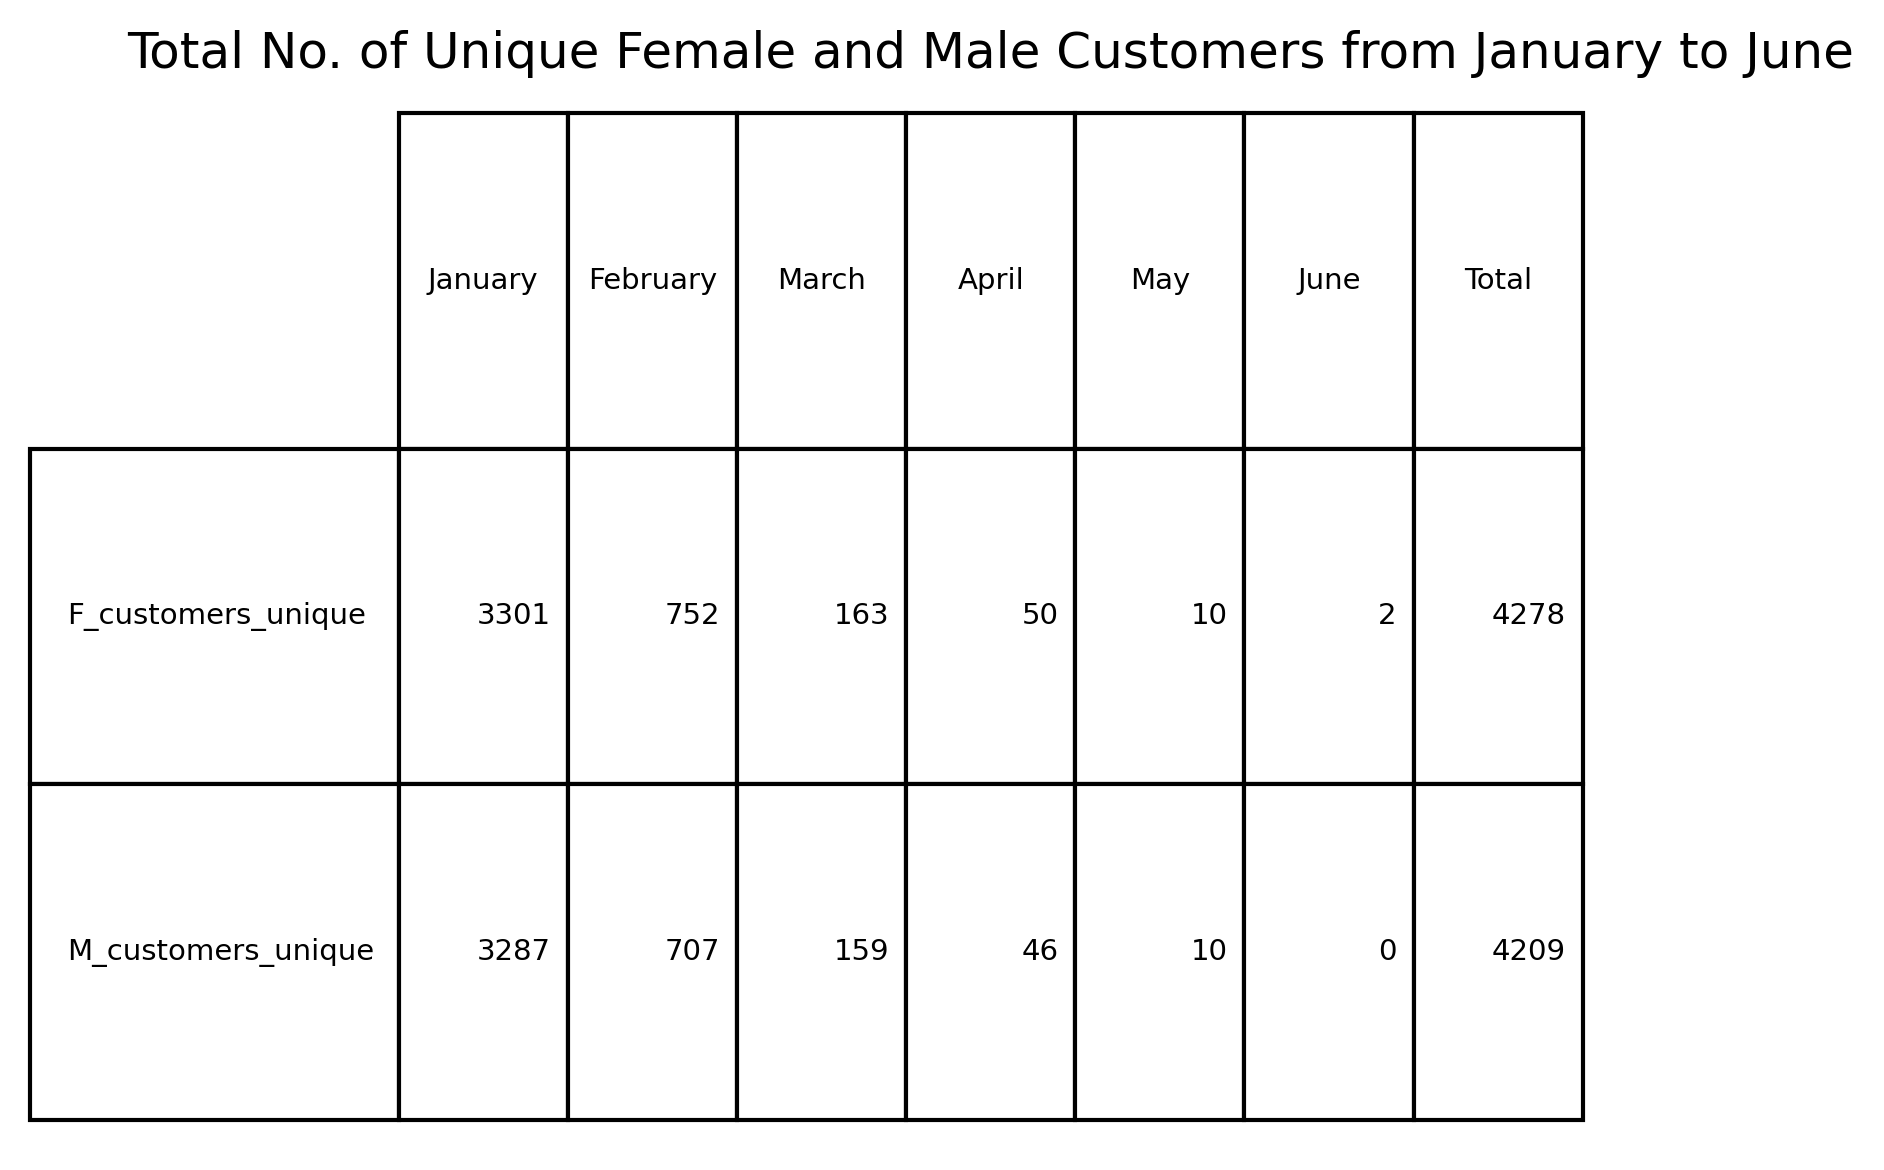

In [245]:
#Table of total_UFM_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Unique Female and Male Customers from January to June')
plt.subplots_adjust(bottom=0.75)
table = ax.table(cellText=total_UFM_df.values, colLabels=total_UFM_df.columns,rowLabels=total_UFM_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('total_UFM_df_table', dpi=200)

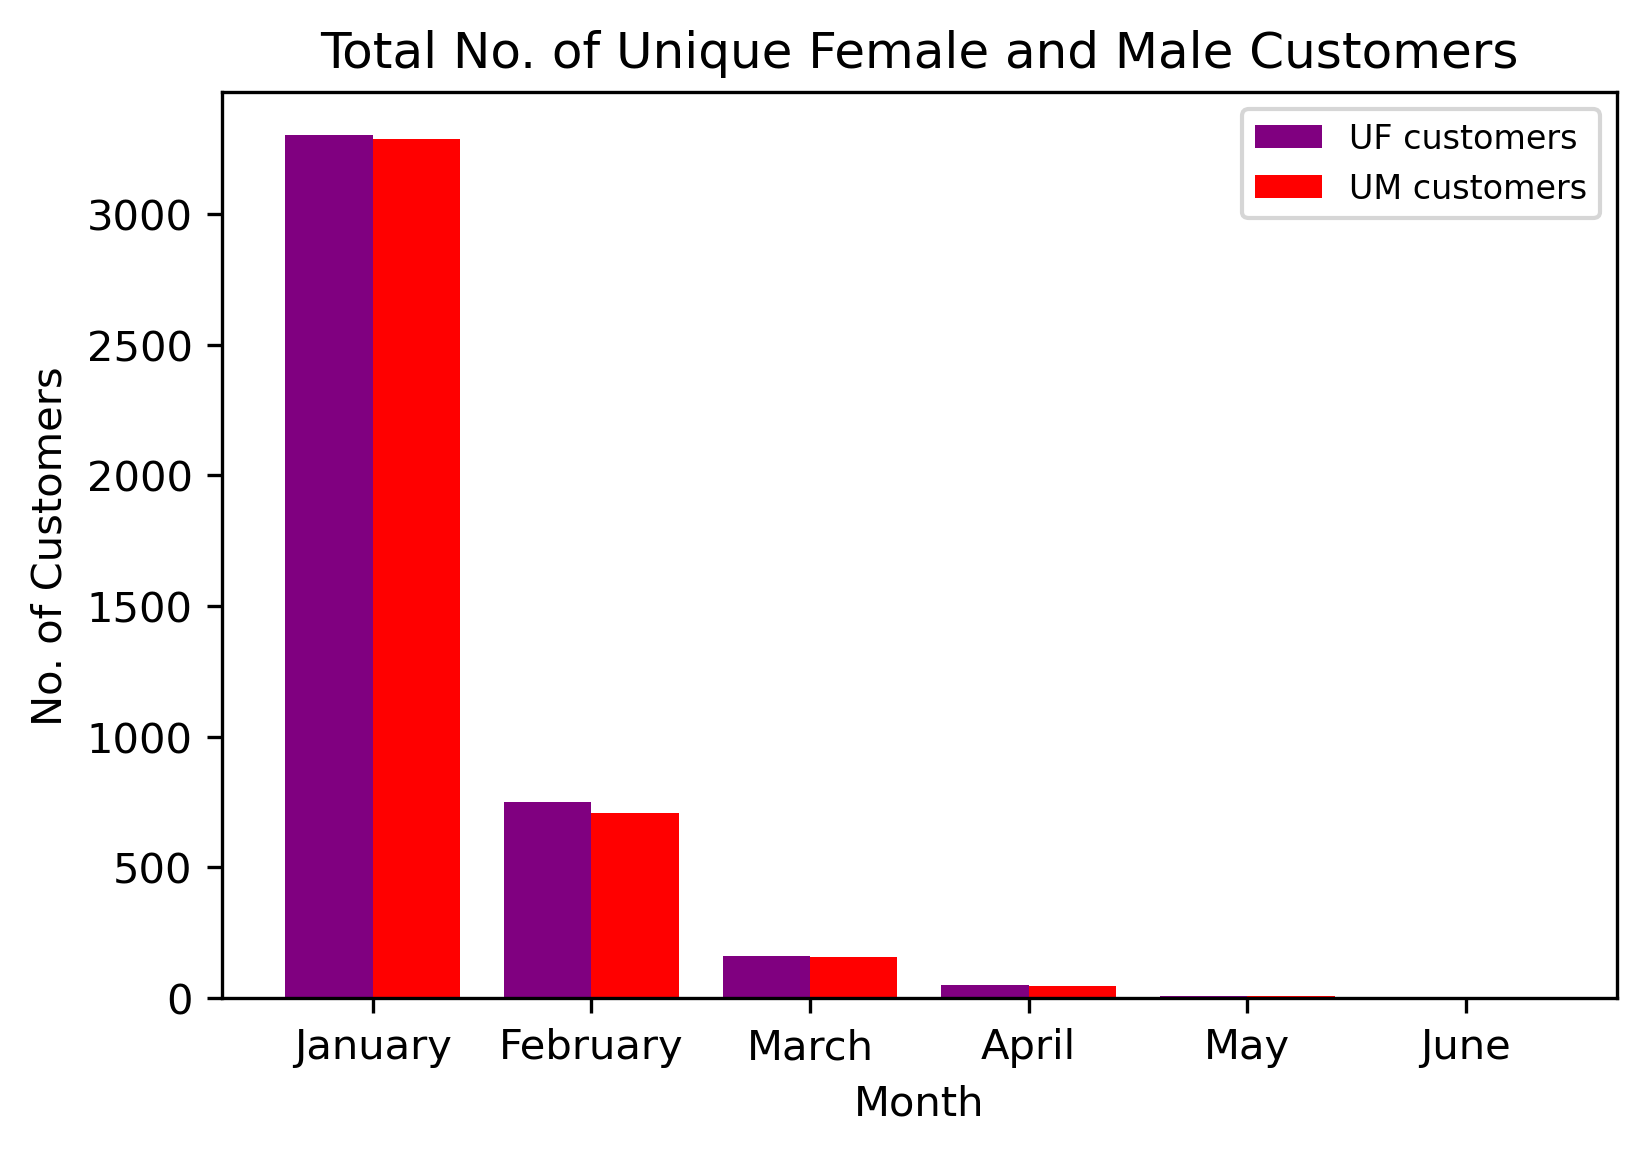

In [246]:
#Total Unique Female/Male customers per month
UF_customers_mon = [3301,752,163,50,10,2]
UM_customers_mon = [3287,707,159,46,10,0]
X = monthslist
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, UF_customers_mon, 0.4, label = 'UF customers', color = 'purple')
plt.bar(X_axis + 0.2, UM_customers_mon, 0.4, label = 'UM customers', color = 'red')
plt.xticks(X_axis,X)
plt.legend(loc=1, prop={'size':8})
plt.title('Total No. of Unique Female and Male Customers')
plt.xlabel('Month')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_UFM_bar', dpi=200)



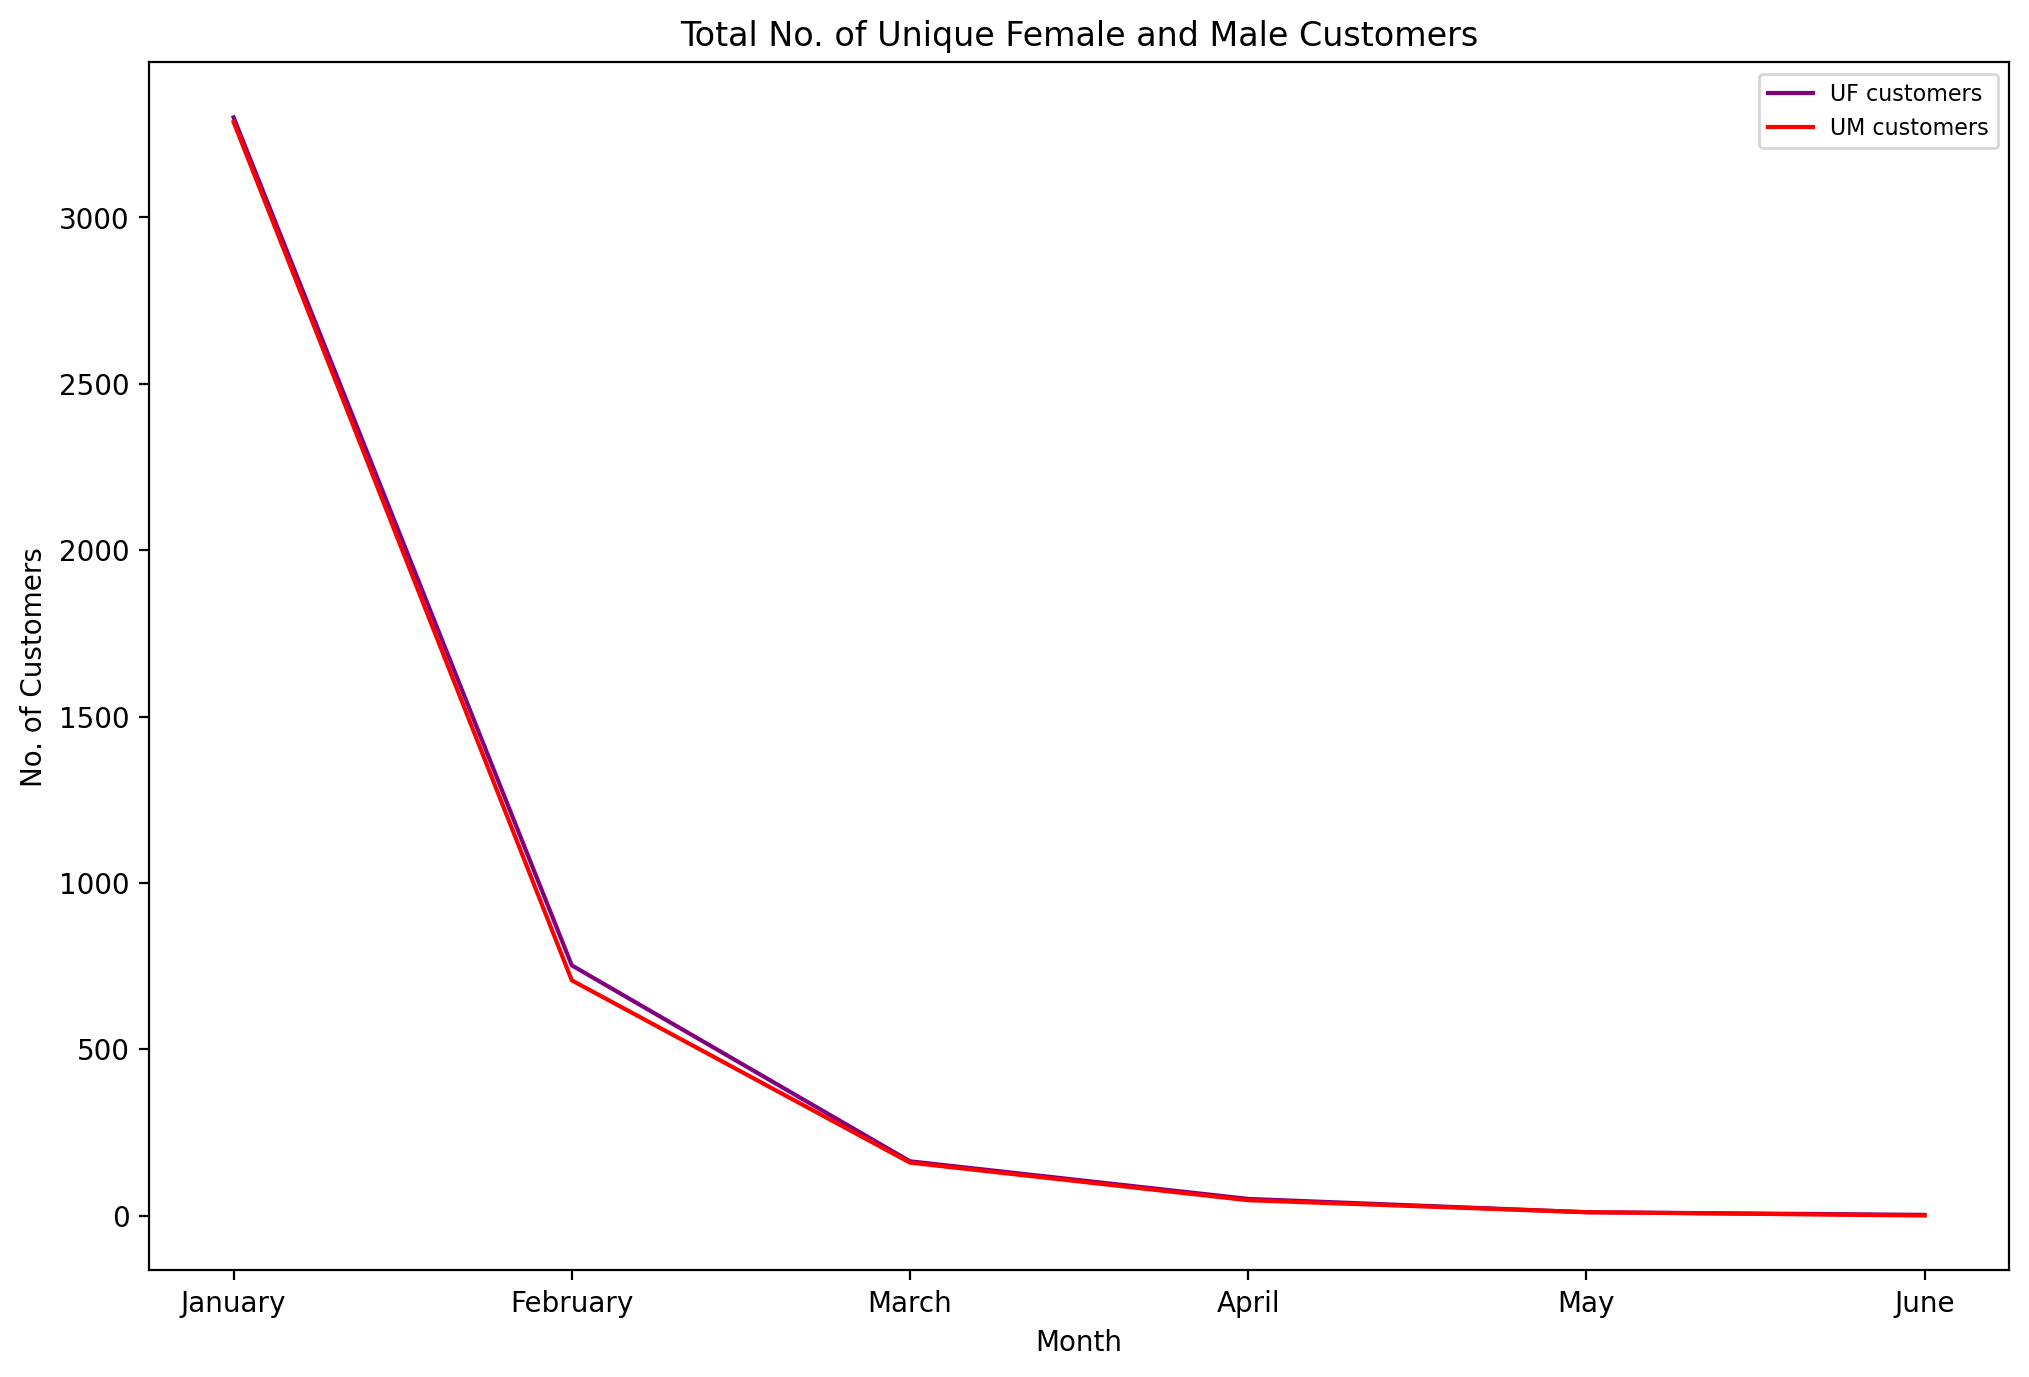

In [247]:
#Total Unique Female/Male customers per month
UF_customers_mon = [3301,752,163,50,10,2]
UM_customers_mon = [3287,707,159,46,10,0]

fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(monthslist,UF_customers_mon, label = 'UF customers',color='purple')
plt.plot(monthslist,UM_customers_mon, label = 'UM customers',color='red')
plt.legend(loc=1, prop={'size':8})

plt.title('Total No. of Unique Female and Male Customers')
plt.xlabel('Month')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_UFM_line', dpi=200)


In [248]:
#Number of Unique Female Customers per Item per Month
print("Unique EEBC F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print("")
print("Unique EEBC F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print("")
print("Unique EEKS F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Unique EEKS F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Unique HKNM F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print("")
print("Unique HKNM F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print("")
print("Unique HKGV F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Unique HKGV F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Unique HKYV F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Unique HKYV F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Unique CCOB F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Orange Beans']==True),'name'].count())
print("")
print("Unique CCOB F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Orange Beans']==True),'name'].count())
print("")
print("Unique CCGW F")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print("")
print("Unique CCGW F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Gummy Worms']==True),'name'].count())

Unique EEBC F

495
104
30
6
3
0

Unique EEBC F Total
638

Unique EEKS F

459
100
22
10
0
0

Unique EEKS F Total
591

Unique HKNM F

457
108
19
11
1
0

Unique HKNM F Total
596

Unique HKGV F

461
111
28
3
0
0

Unique HKGV F Total
603

Unique HKYV F

494
101
23
5
1
0

Unique HKYV F Total
624

Unique CCOB F

487
111
22
9
1
0

Unique CCOB F Total
630

Unique CCGW F

448
117
19
6
4
2

Unique CCGW F Total
596


In [249]:
#Number of Unique Male Customers per Item per Month
print("Unique EEBC M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print("")
print("Unique EEBC M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print("")
print("Unique EEKS M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Unique EEKS M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print("")
print("Unique HKNM M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print("")
print("Unique HKNM M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print("")
print("Unique HKGV M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Unique HKGV M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print("")
print("Unique HKYV M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Unique HKYV M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print("")
print("Unique CCOB M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Orange Beans']==True),'name'].count())
print("")
print("Unique CCOB M Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Orange Beans']==True),'name'].count())
print("")
print("Unique CCGW M")
print("")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='January')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='February')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='March')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='April')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='May')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['transaction_month']=='June')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print("")
print("Unique CCGW F Total")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Gummy Worms']==True),'name'].count())

Unique EEBC M

481
113
17
5
4
0

Unique EEBC M Total
620

Unique EEKS M

447
99
18
5
2
0

Unique EEKS M Total
571

Unique HKNM M

467
96
11
8
1
0

Unique HKNM M Total
583

Unique HKGV M

456
110
31
3
1
0

Unique HKGV M Total
601

Unique HKYV M

487
91
19
9
1
0

Unique HKYV M Total
607

Unique CCOB M

474
101
27
9
0
0

Unique CCOB M Total
611

Unique CCGW M

475
97
36
7
1
0

Unique CCGW F Total
616


In [250]:
#Number of Unique Female/Male customers per month
UF_items_jan = [495,459,457,461,494,487,448]
UF_items_feb = [104,100,108,111,101,111,117]
UF_items_mar = [30,22,19,28,23,22,19]
UF_items_apr = [6,10,11,3,5,9,6]
UF_items_may = [3,0,1,0,1,1,4]
UF_items_jun = [0,0,0,0,0,0,2]
UF_items_tot = [638,591,596,603,624,630,596]

UM_items_jan = [481,447,467,456,487,474,475]
UM_items_feb = [113,99,96,110,91,101,97]
UM_items_mar = [17,18,11,31,19,27,36]
UM_items_apr = [5,5,8,3,9,9,7]
UM_items_may = [4,2,1,1,1,0,1]
UM_items_jun = [0,0,0,0,0,0,0]
UM_items_tot = [620,571,583,601,607,611,616]

UF_items_month_df = pd.DataFrame([UF_items_jan,UF_items_feb,UF_items_mar,UF_items_apr,UF_items_may,UF_items_jun],columns=['EEBC_F','EEKS_F','HKNM_F','HKGV_F','HKYV_F','CCOB_F','CCGW_F'],index=monthslist)
UF_items_month_df  
UF_items_montht_df = pd.DataFrame([UF_items_jan,UF_items_feb,UF_items_mar,UF_items_apr,UF_items_may,UF_items_jun,UF_items_tot],columns=['EEBC_F','EEKS_F','HKNM_F','HKGV_F','HKYV_F','CCOB_F','CCGW_F'],index=monthslistotal)
UF_items_montht_df
UM_items_month_df = pd.DataFrame([UM_items_jan,UM_items_feb,UM_items_mar,UM_items_apr,UM_items_may,UM_items_jun],columns=['EEBC_M','EEKS_M','HKNM_M','HKGV_M','HKYV_M','CCOB_M','CCGW_M'],index=monthslist)
UM_items_month_df
UM_items_montht_df = pd.DataFrame([UM_items_jan,UM_items_feb,UM_items_mar,UM_items_apr,UM_items_may,UM_items_jun,UM_items_tot],columns=['EEBC_M','EEKS_M','HKNM_M','HKGV_M','HKYV_M','CCOB_M','CCGW_M'],index=monthslistotal)
UM_items_montht_df
                

EEBC_M  EEKS_M  HKNM_M  HKGV_M  HKYV_M  CCOB_M  CCGW_M
January      481     447     467     456     487     474     475
February     113      99      96     110      91     101      97
March         17      18      11      31      19      27      36
April          5       5       8       3       9       9       7
May            4       2       1       1       1       0       1
June           0       0       0       0       0       0       0
Total        620     571     583     601     607     611     616

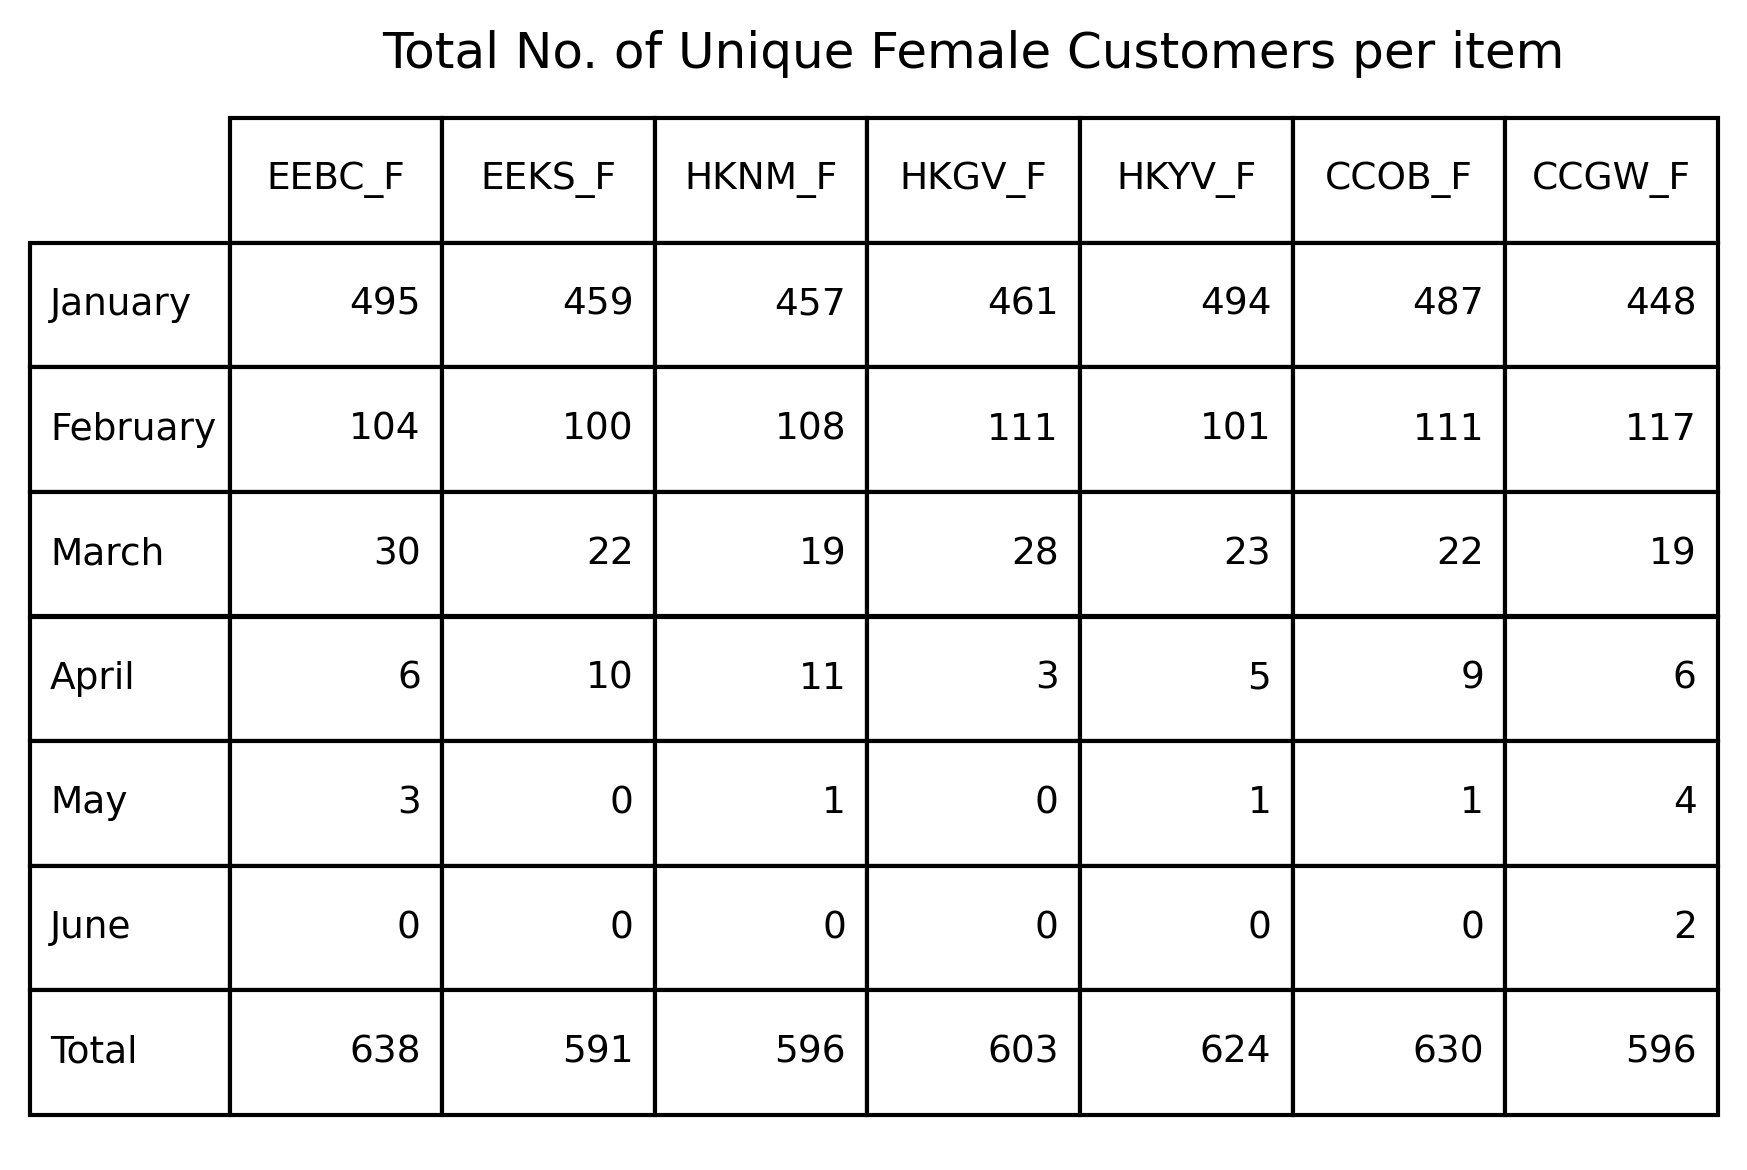

In [251]:
#Table of UF_items_montht_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Unique Female Customers per item')
plt.subplots_adjust(bottom=0.53)
table = ax.table(cellText=UF_items_montht_df.values, colLabels=UF_items_montht_df.columns,rowLabels=UF_items_montht_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('UF_items_montht_df_table', dpi=200)

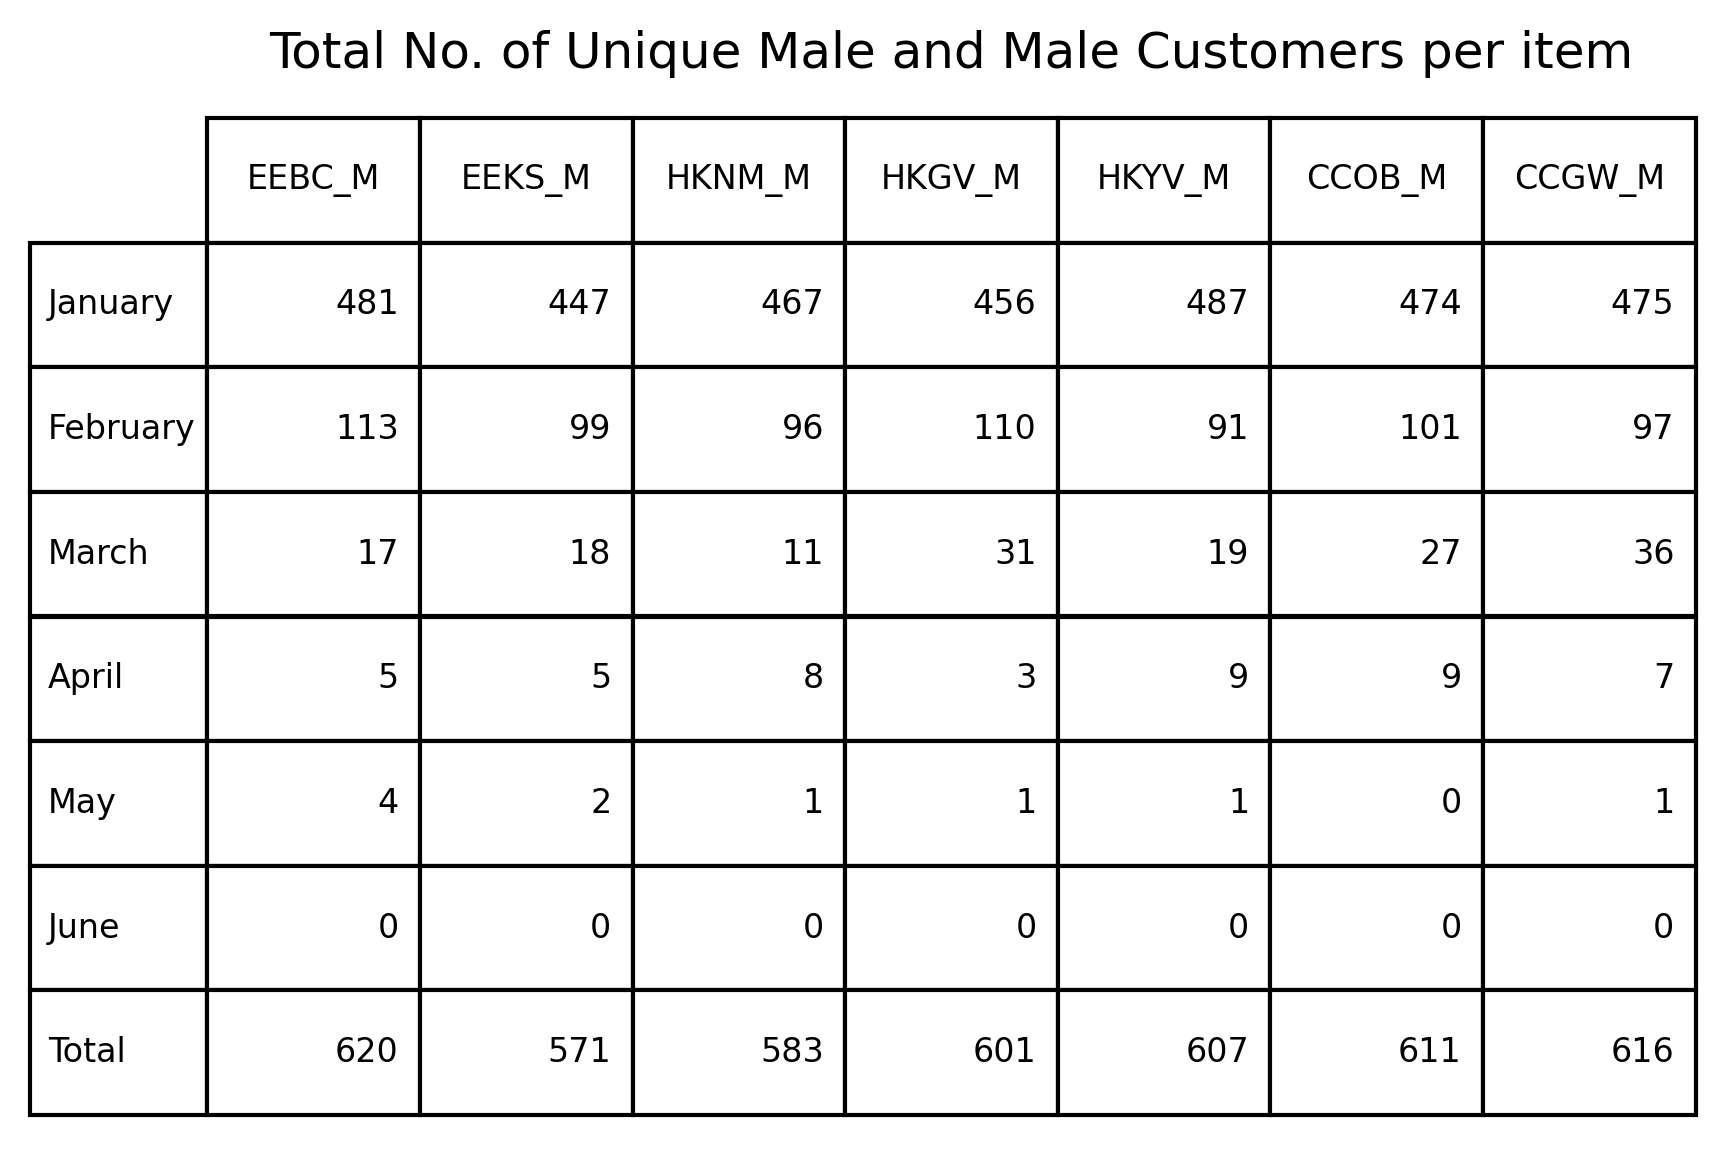

In [252]:
#Table of UM_items_montht_df
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title('Total No. of Unique Male and Male Customers per item')
plt.subplots_adjust(bottom=0.53)
table = ax.table(cellText=UM_items_montht_df.values, colLabels=UM_items_montht_df.columns,rowLabels=UM_items_montht_df.index,loc='center')
fig.tight_layout()
plt.show()
fig.savefig('UM_items_montht_df_table', dpi=200)

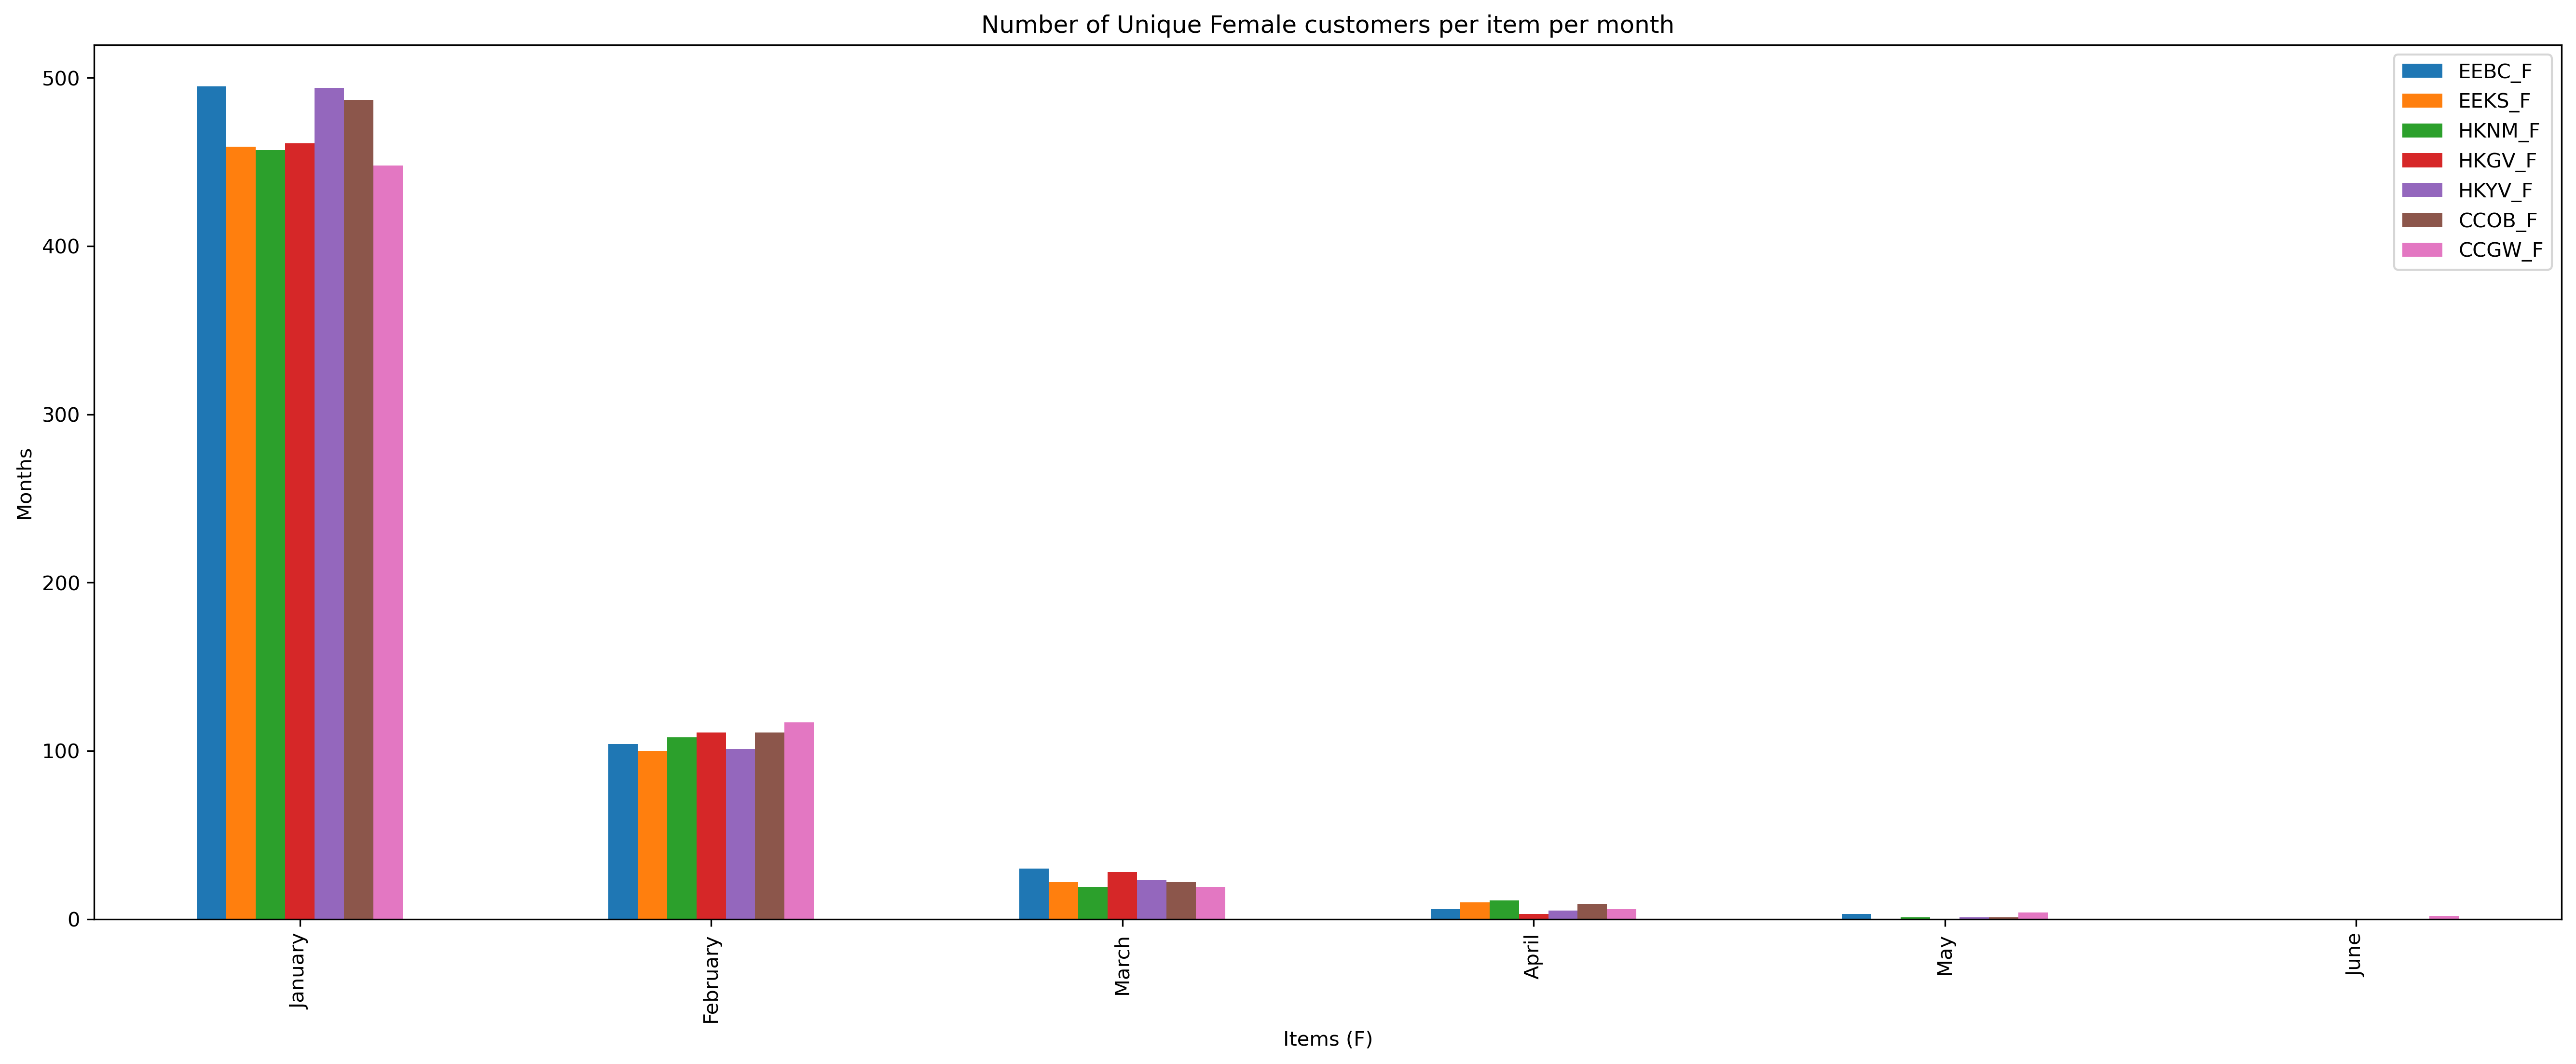

In [253]:
UF_mitems_graph = UF_items_month_df.plot(kind='bar',figsize=(22,8)).legend(loc='best')
plt.ylabel('Months')
plt.xlabel('Items (F)')
plt.title('Number of Unique Female customers per item per month')
UF_mitems_graph.figure.savefig('UF_umitems_bar.png')

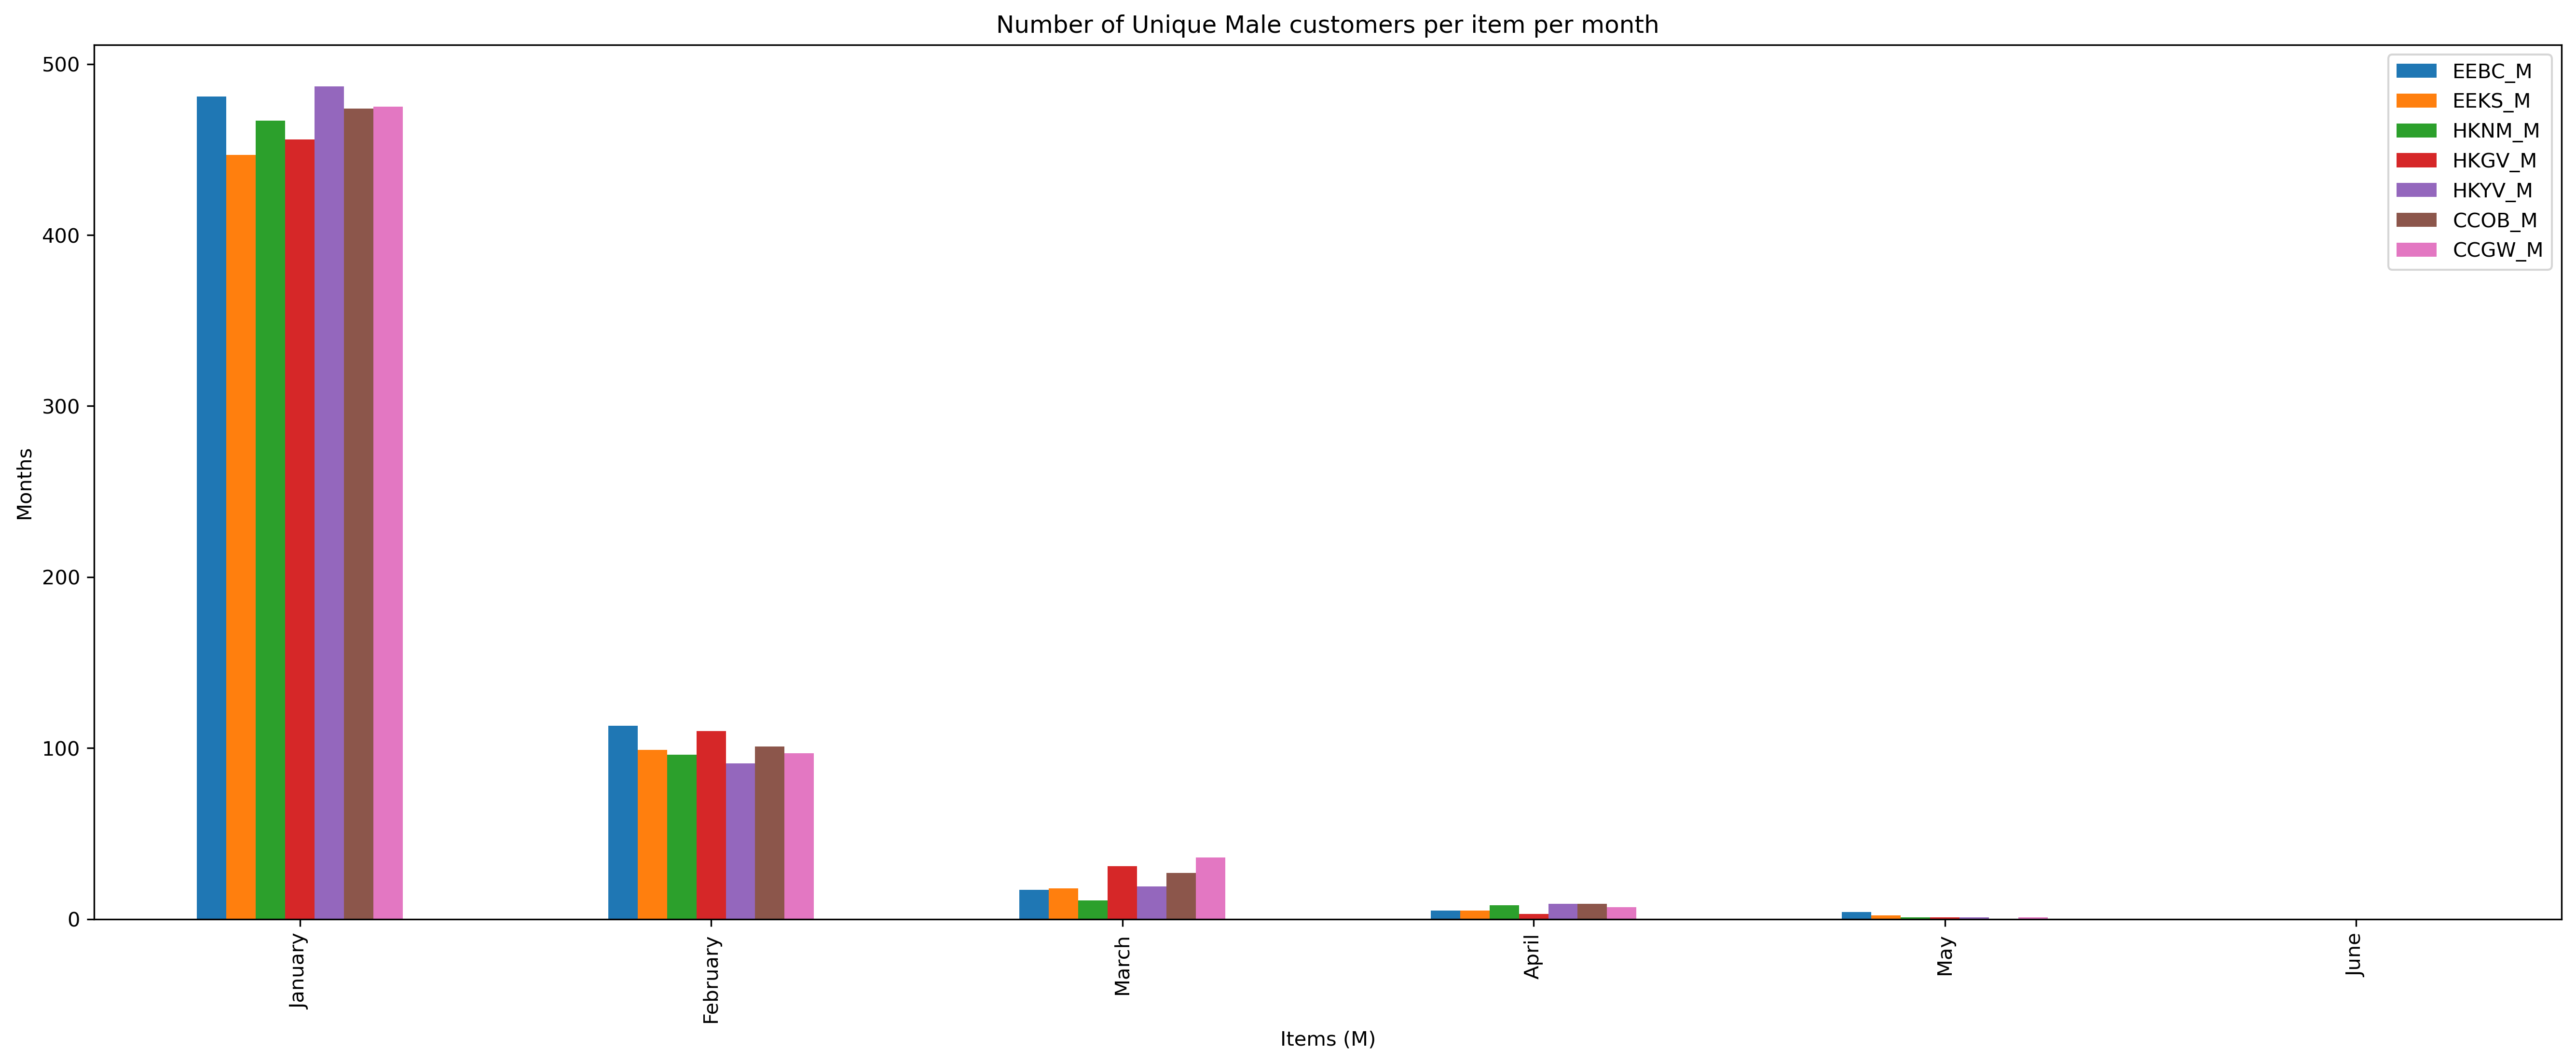

In [254]:
UM_mitems_graph = UM_items_month_df.plot(kind='bar',figsize=(22,8)).legend(loc='best')
plt.ylabel('Months')
plt.xlabel('Items (M)')
plt.title('Number of Unique Male customers per item per month')
UM_mitems_graph.figure.savefig('UM_umitems_bar.png')

In [255]:
#Number of Male and Female Customers per Item
print("Total Unique F per Item")
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='F')&(unique_customers_df['Gummy Worms']==True),'name'].count())
print("")
print("Total Unique M per Item")
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Beef Chicharon']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Kimchi and Seaweed']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Nutrional Milk']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Gummy Vitamins']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Yummy Vegetables']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Orange Beans']==True),'name'].count())
print(unique_customers_df.loc[(unique_customers_df['sex']=='M')&(unique_customers_df['Gummy Worms']==True),'name'].count())

Total Unique F per Item
638
591
596
603
624
630
596

Total Unique M per Item
620
571
583
601
607
611
616


In [256]:
#Number of Unique Male and Female Customers per Item
UF_per_item = [638,591,596,603,624,630,596]
UM_per_item = [620,571,583,601,607,611,616]

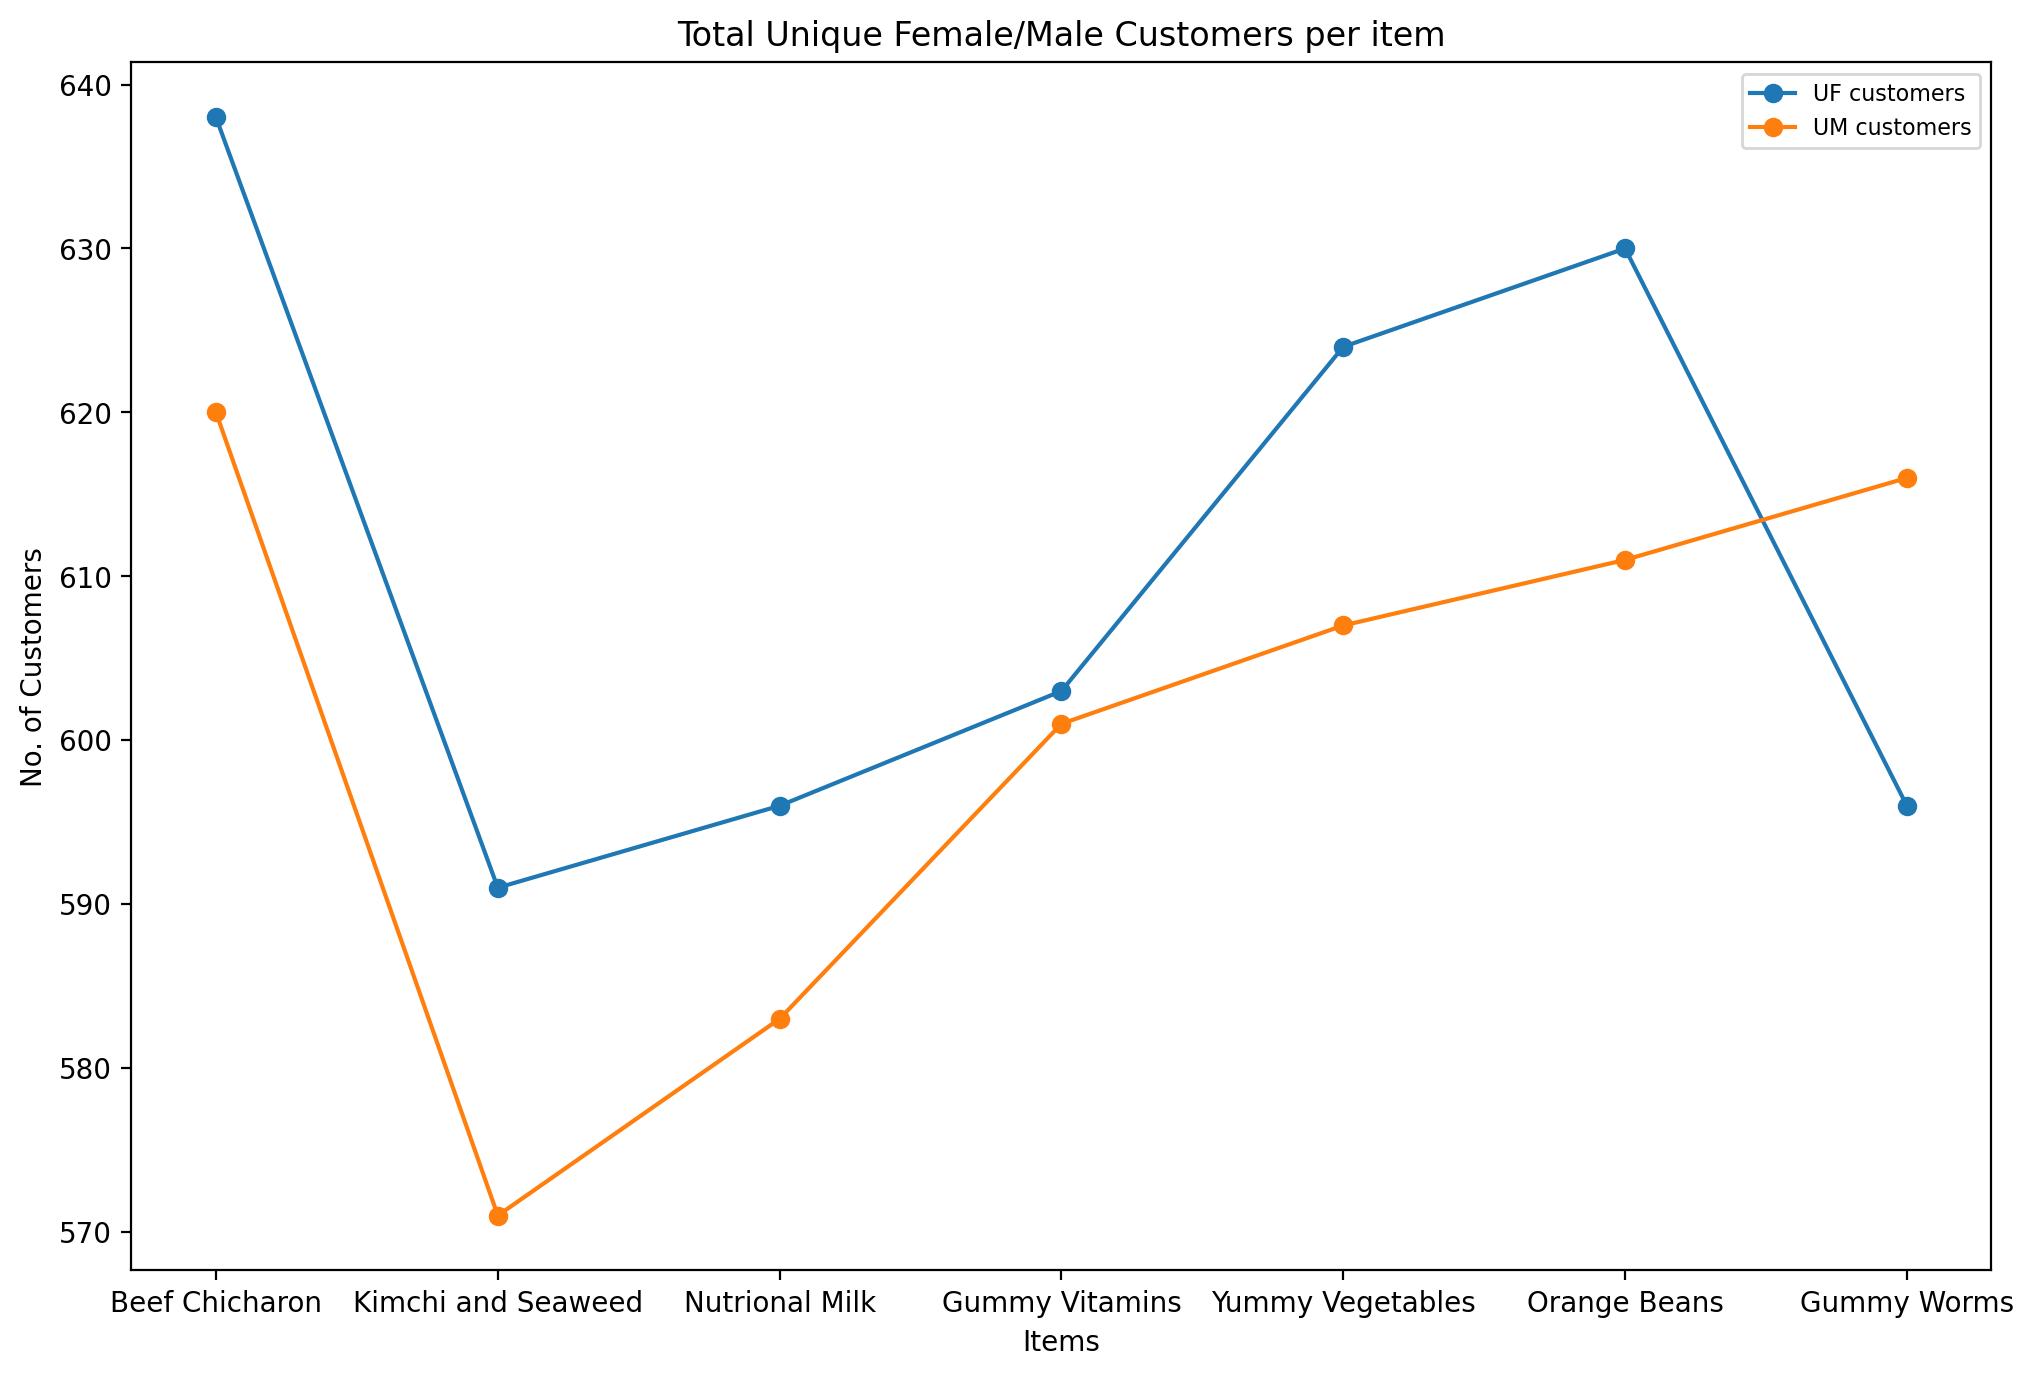

In [257]:
#Total Female/Male customers per item
fig = plt.figure(figsize=(12,8),dpi=200)
plt.plot(itemslist,UF_per_item, label = 'UF customers',marker = 'o')
plt.plot(itemslist,UM_per_item, label = 'UM customers', marker='o')
plt.legend(loc=1, prop={'size':8})

plt.title('Total Unique Female/Male Customers per item')
plt.xlabel('Items')
plt.ylabel('No. of Customers')
plt.show()
fig.savefig('total_UFM_item_line',dpi=200)
